
# <span style="color:rgb(213,80,0)">МЕТОДЫ ОПТИМИЗАЦИИ</span>

### Семинар 9. Линейная регрессия

В терминах машинного обучения, регрессия \- это "supervised learning"


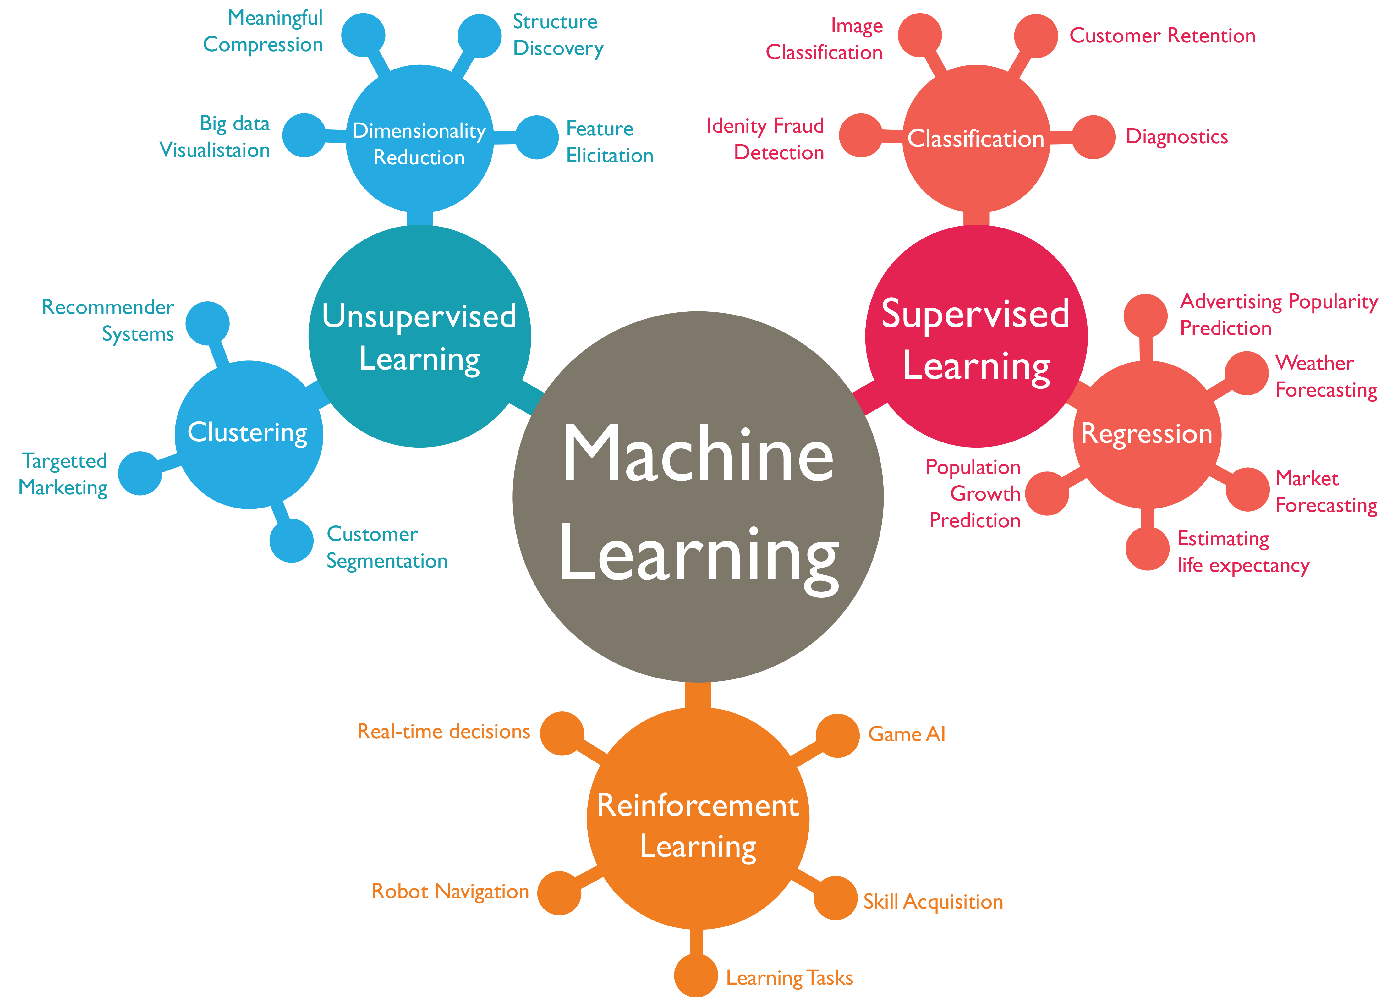


(https://github.com/shanmukh05/Machine\-Learning\-Roadmap


youtube: AI Warehouse \- reinforcement learning)


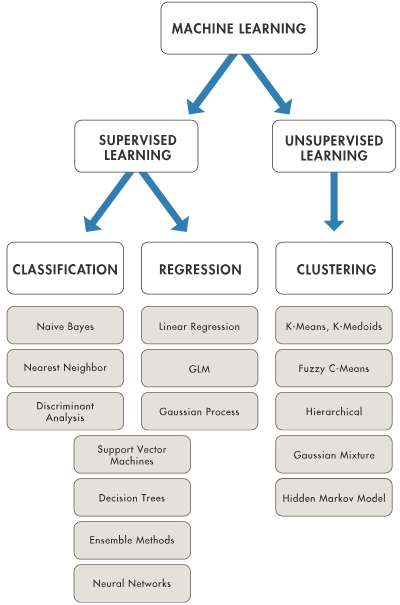


(https://www.mathworks.com/solutions/machine\-learning.html)

#### Задача линейной регрессии в обозначениях статистики

В предыдущем семинаре был вектор $\vec{e}$ \- вектор, который лежит в нуль\-пространстве матрицы $A^T$ , это та часть вектора $\vec{b}$ , которая не может быть описана в рамках модели $A\vec{x} =\vec{b}$ .


 $\vec{e} =\vec{b} -\vec{p}$ , где $\vec{p} =AA^{\dagger} \vec{b}$ \- наиболее близкий (в терминах квадратичного отклонения) к $\vec{b}$ вектор, лежащий в пространстве столбцов матрицы $A$ . Если $\vec{b}$ изначально лежит в пространстве столбцов $C(A)$ (и все столбцы линейнонезависимы), то $AA^{\dagger} \vec{b} =\vec{b}$ , наша модель описывает данные полностью, без ошибки.


Теперь появляется случаяная составляющая, вектор $\vec{e}$ будет иметь случайную природу.


Будем пользоваться принятыми в статистике обозначениями.


Теперь:   $\vec{b} \Longrightarrow \vec{y} ,\vec{a} \Longrightarrow \vec{\beta} ,{\vec{a} }^* \Longrightarrow \vec{b} ,\vec{t} \Longrightarrow \vec{x} ,A\Longrightarrow X$


 $\vec{Y}$ \- зависимая переменная,


 $X$ \- матрица независимых переменных (предикторов), в ней первый столбец \- единичный, он учитывает постоянное смещение, это, так называемая **dummy variable**


 $\vec{\beta}$ \- это истинные значения параметров модели,

<a name="M_AD335F1B"></a>

$$\vec{Y} =X\vec{\beta} +\vec{\epsilon}$$

 $\vec{\epsilon}$ \- случайный вектор ошибки.


Основное предположение, что $\mathbb{E}[\vec{\epsilon} ]=\vec{0}$ , то есть ошибка является несмещенной.


Например, $\vec{Y} =[\vec{I} ,\vec{X} ][\begin{array}{c} \beta_0 \newline \beta_1  \end{array}]+\vec{\epsilon}$ \- для линейной регрессии первого порядка, $\vec{I}$ \- вектор, состоящий из единиц (в отличие от единичной матрицы $I$ )


В [выражении](#M_AD335F1B) для выходное переменной, случайной является только вектор ошибки


Производя регрессионный анализ (обучение регрессионной модели) мы получаем вектор $\vec{b}$


$$\vec{b} =(X^T X)^{-1} X^T \vec{Y} =X^{\dagger} \vec{Y}$$

 $\vec{b}$ \- вектор коэффициентов регрессионной модели, которые отличаются  от истинных коэффициентов $\vec{\beta}$ из\-за наличия погрешности в исходных данных, вектор $\vec{b}$ является оценкой истинного набора параметров нашей модели.


 $\vec{b} =X^{\dagger} \vec{Y} =X^{\dagger} X\vec{\beta} +X^{\dagger} \vec{\epsilon} =\vec{\beta} +X^{\dagger} \vec{\epsilon}$ ( так как $X^{\dagger} X=(X^T X)^{-1} X^T X=I$ )


Так как $\mathbb{E}[\vec{\epsilon} ]=\vec{0}$ , то $\mathbb{E}[\vec{b} ]=\vec{\beta}$ , то есть, проведя, достаточное количество регрессий мы в среднем получим  истинные параметры.


Матрица $H=X(X^T X)^{-1} X^T$ \- это "hat\-matrix",  потому что она надевает шапку на вектор $\vec{Y}$


 $\hat{\vec{Y} } =HY=X(X^T X)^{-1} X^T =X\vec{b}$ , соотвественно $\hat{\vec{Y} }$ \- это значения зависимой переменной, рассчитанные в рамках нашей модели. После обучения, мы можем использовать полученную модель для предсказаний, то есть, мы можем использовать полученные параметры регрессий для расчета вектора $\vec{Y_1 }$ который будет соотвествовать новым значениям предикторов $X_1$


Попробуем это в эксперименте на простом примере линейной регрессии с двумя параметрами (фитинг прямой линией)


In [1]:
clearvars
N=10; % размер выборки
tests_number = 76; % количество тестов
beta = [2; 5]; % истинные значения параметров
X1 = linspace(-1,1,N)';
X = [ones(N,1),X1]; % матрица предикторов
distrib = 'Normal'; % выбираем тип генератора случаных чисел
delta = 0.973; % параметр дисперсии ошибки
b_mat = zeros(tests_number,2); % матрица, в которой мы будем сохранять результаты тестов
Yo = X*beta;
Y_points = repmat(Yo,[1 tests_number]);
for ii=1:tests_number
    pd = make_dist(distrib,mu=0,sig=delta^2); %генерит генератор случайных чисел
    Y = Yo + delta*pd(N); % генерим данные как истинное значение модели + случайная ошибка
    %std(Y) % стандартное отклонение примерно равно заданной амлитуде ошибки
    b_mat(ii,:) = transpose(X\Y);
    Y_points(:,ii) = Y;
end
% табличка для отображения результатов
tb = table(beta(:),mean(b_mat)',std(b_mat)', ... вторая колонка таблицы - среднее значения коэффициентов по всем испытаниям
    'VariableNames', ...
    ["Истинные значения","Средние ", ...
    "Стандартное отклонение"], ...
    'RowNames', ...
    ["b_0" "b_1"])

In [2]:

%%% графики
disp("Точки - данные по котором производилась регрессия, каждый цвет - свой тест, прямые - результат фитинга")

Точки - данные по котором производилась регрессия, каждый цвет - свой тест, прямые - результат фитинга


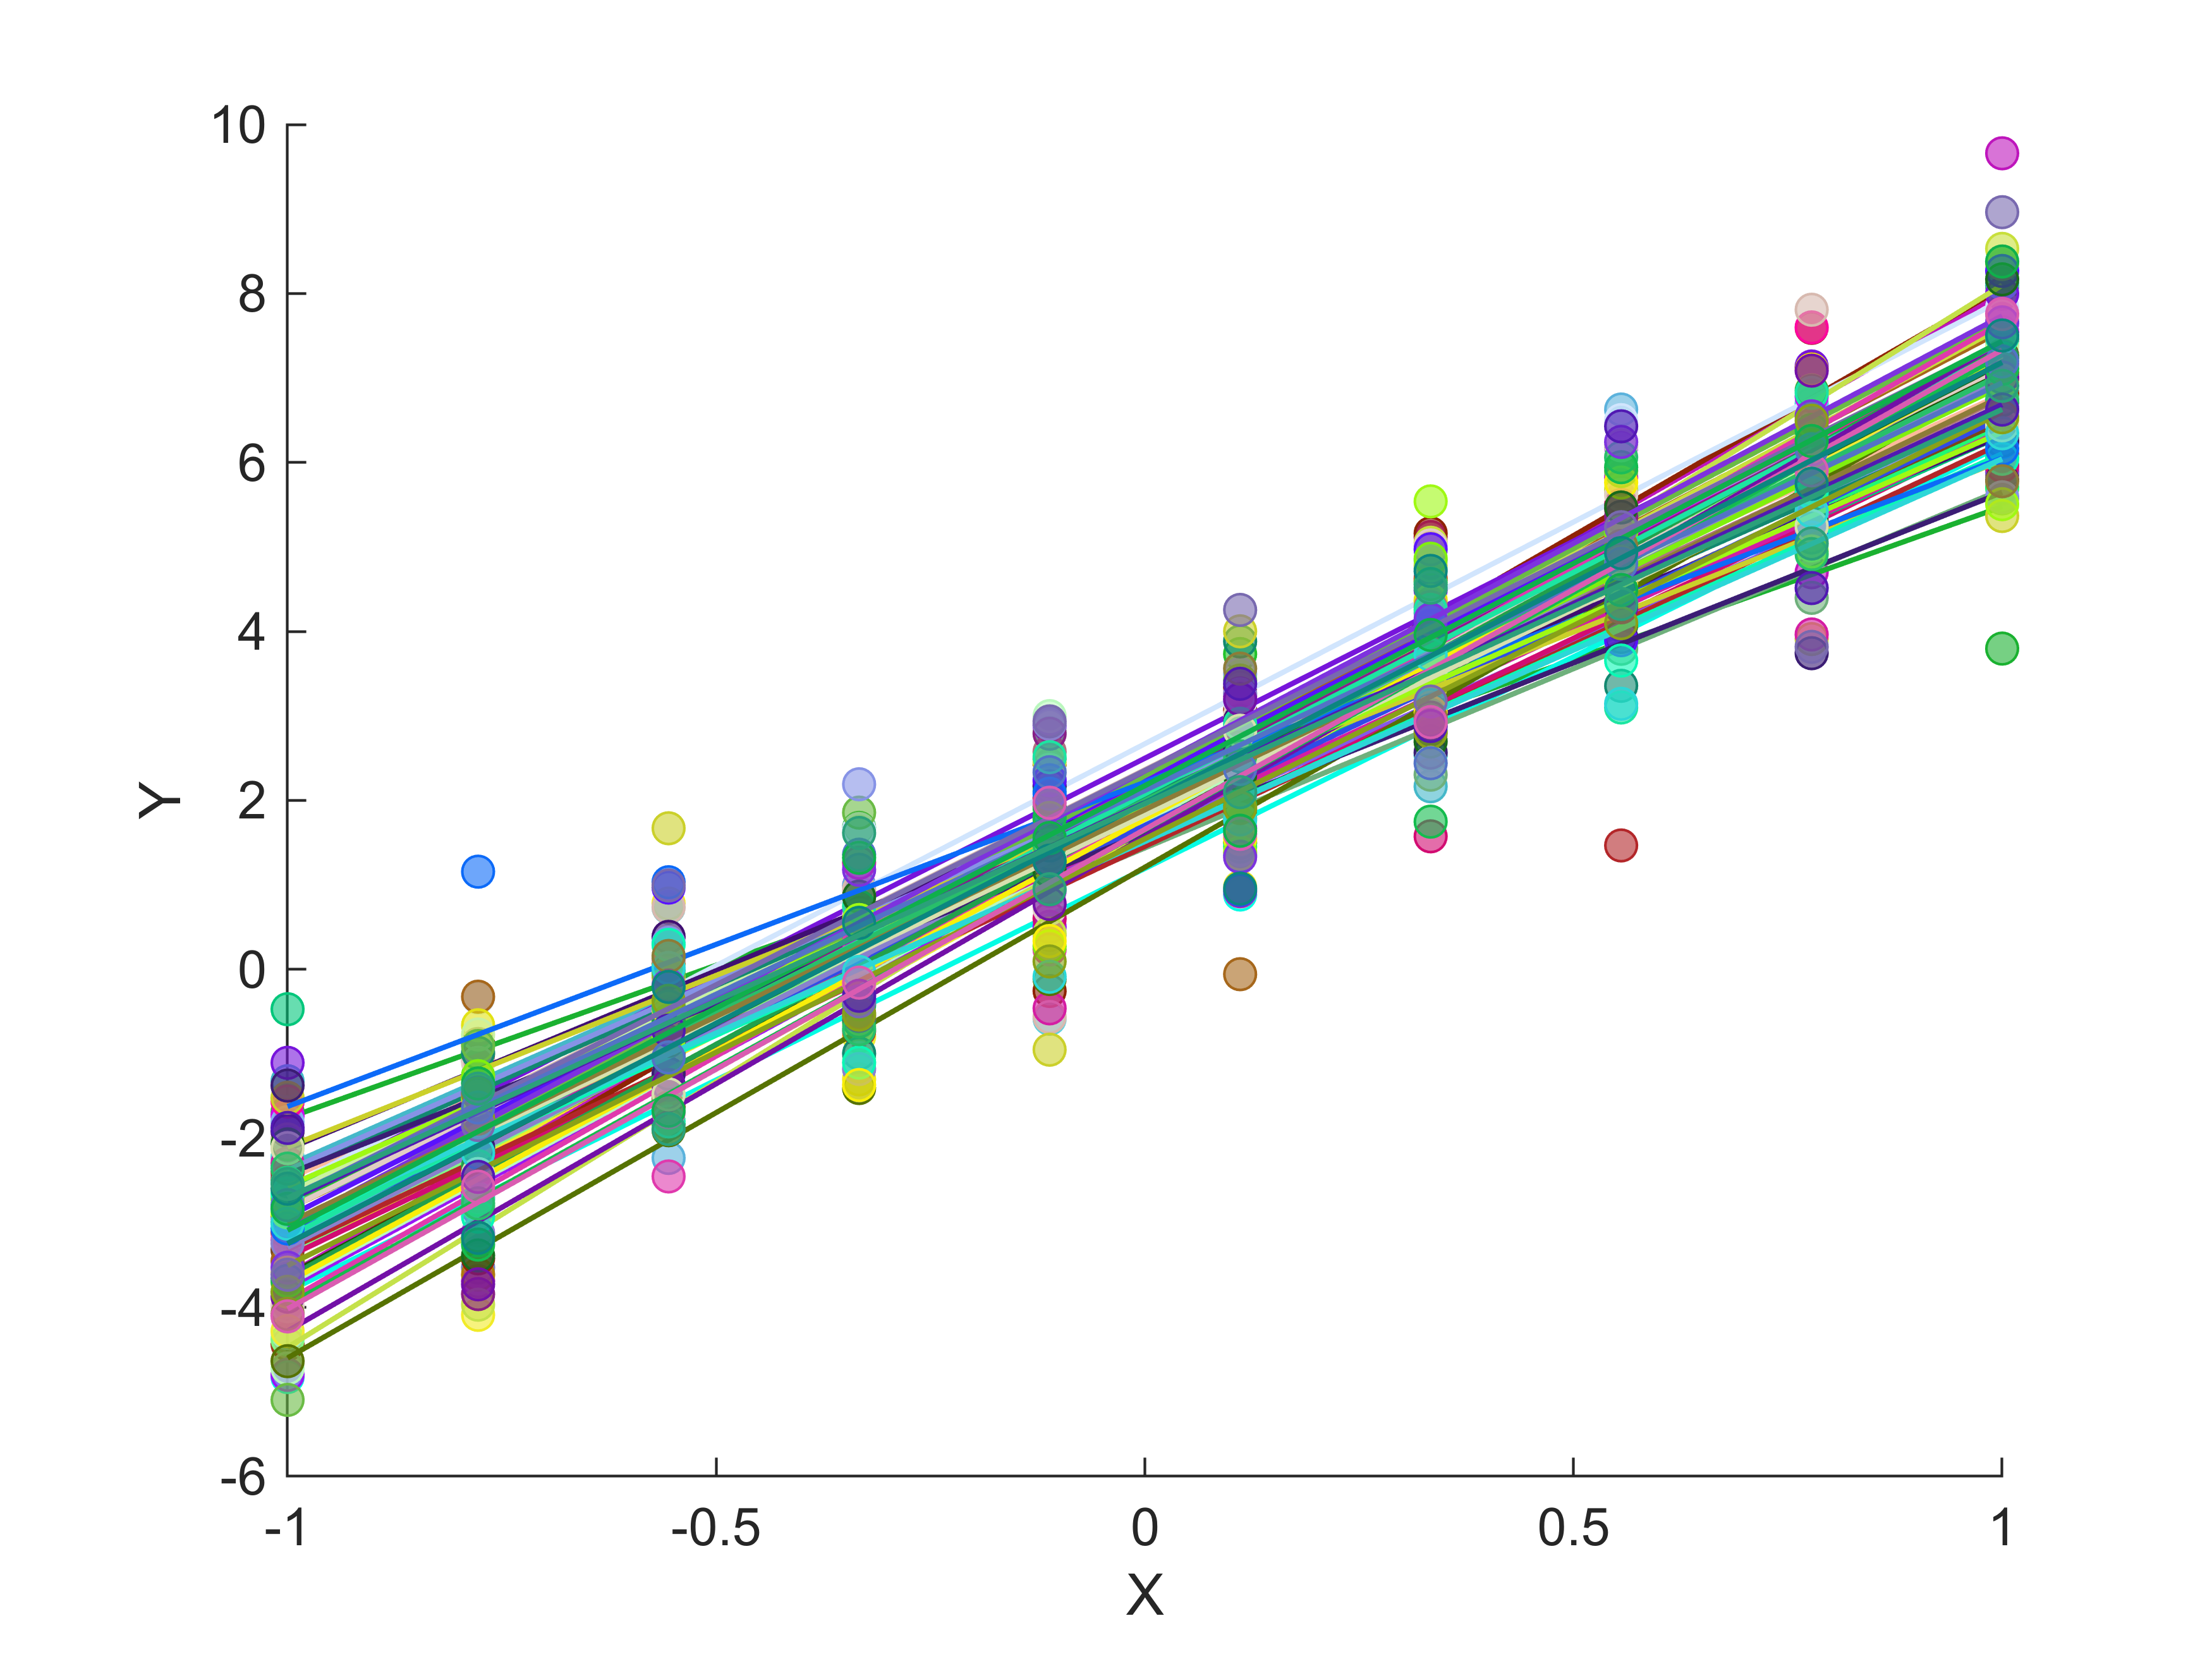

In [3]:
fitted_distr_array = arrayfun(@(jj)fitdist(b_mat(:,jj),"Normal"),1:2);
ax = get_next_ax();
iteration_step = 1;% строим каждый
inds = 1:iteration_step:tests_number;% будем шагать по номерам тестов
Cmat = rand([numel(inds),3]);% матрица цветов
X1 = X(:,2);
hold(ax,"on")
 for ii=inds
    Y = Y_points(:,ii); % генерим данные как истинное значение модели + случайная ошибка
    %std(Y) % стандартное отклонение примерно равно заданной амлитуде ошибки
    p1 = scatter(ax,X1,Y);
    p1.MarkerEdgeColor = Cmat(1+(ii-1)/iteration_step,:);
    p1.MarkerFaceColor = Cmat(1+(ii-1)/iteration_step,:);
    p1.MarkerFaceAlpha = 0.6;
    Ycalc = X*b_mat(ii,:)';
    p1 = plot(ax,X1,Ycalc,"LineWidth",1);
    p1.Color = Cmat(1+(ii-1)/iteration_step,:);
 end
 xlabel("X")
 ylabel("Y")
 hold(ax,"off")


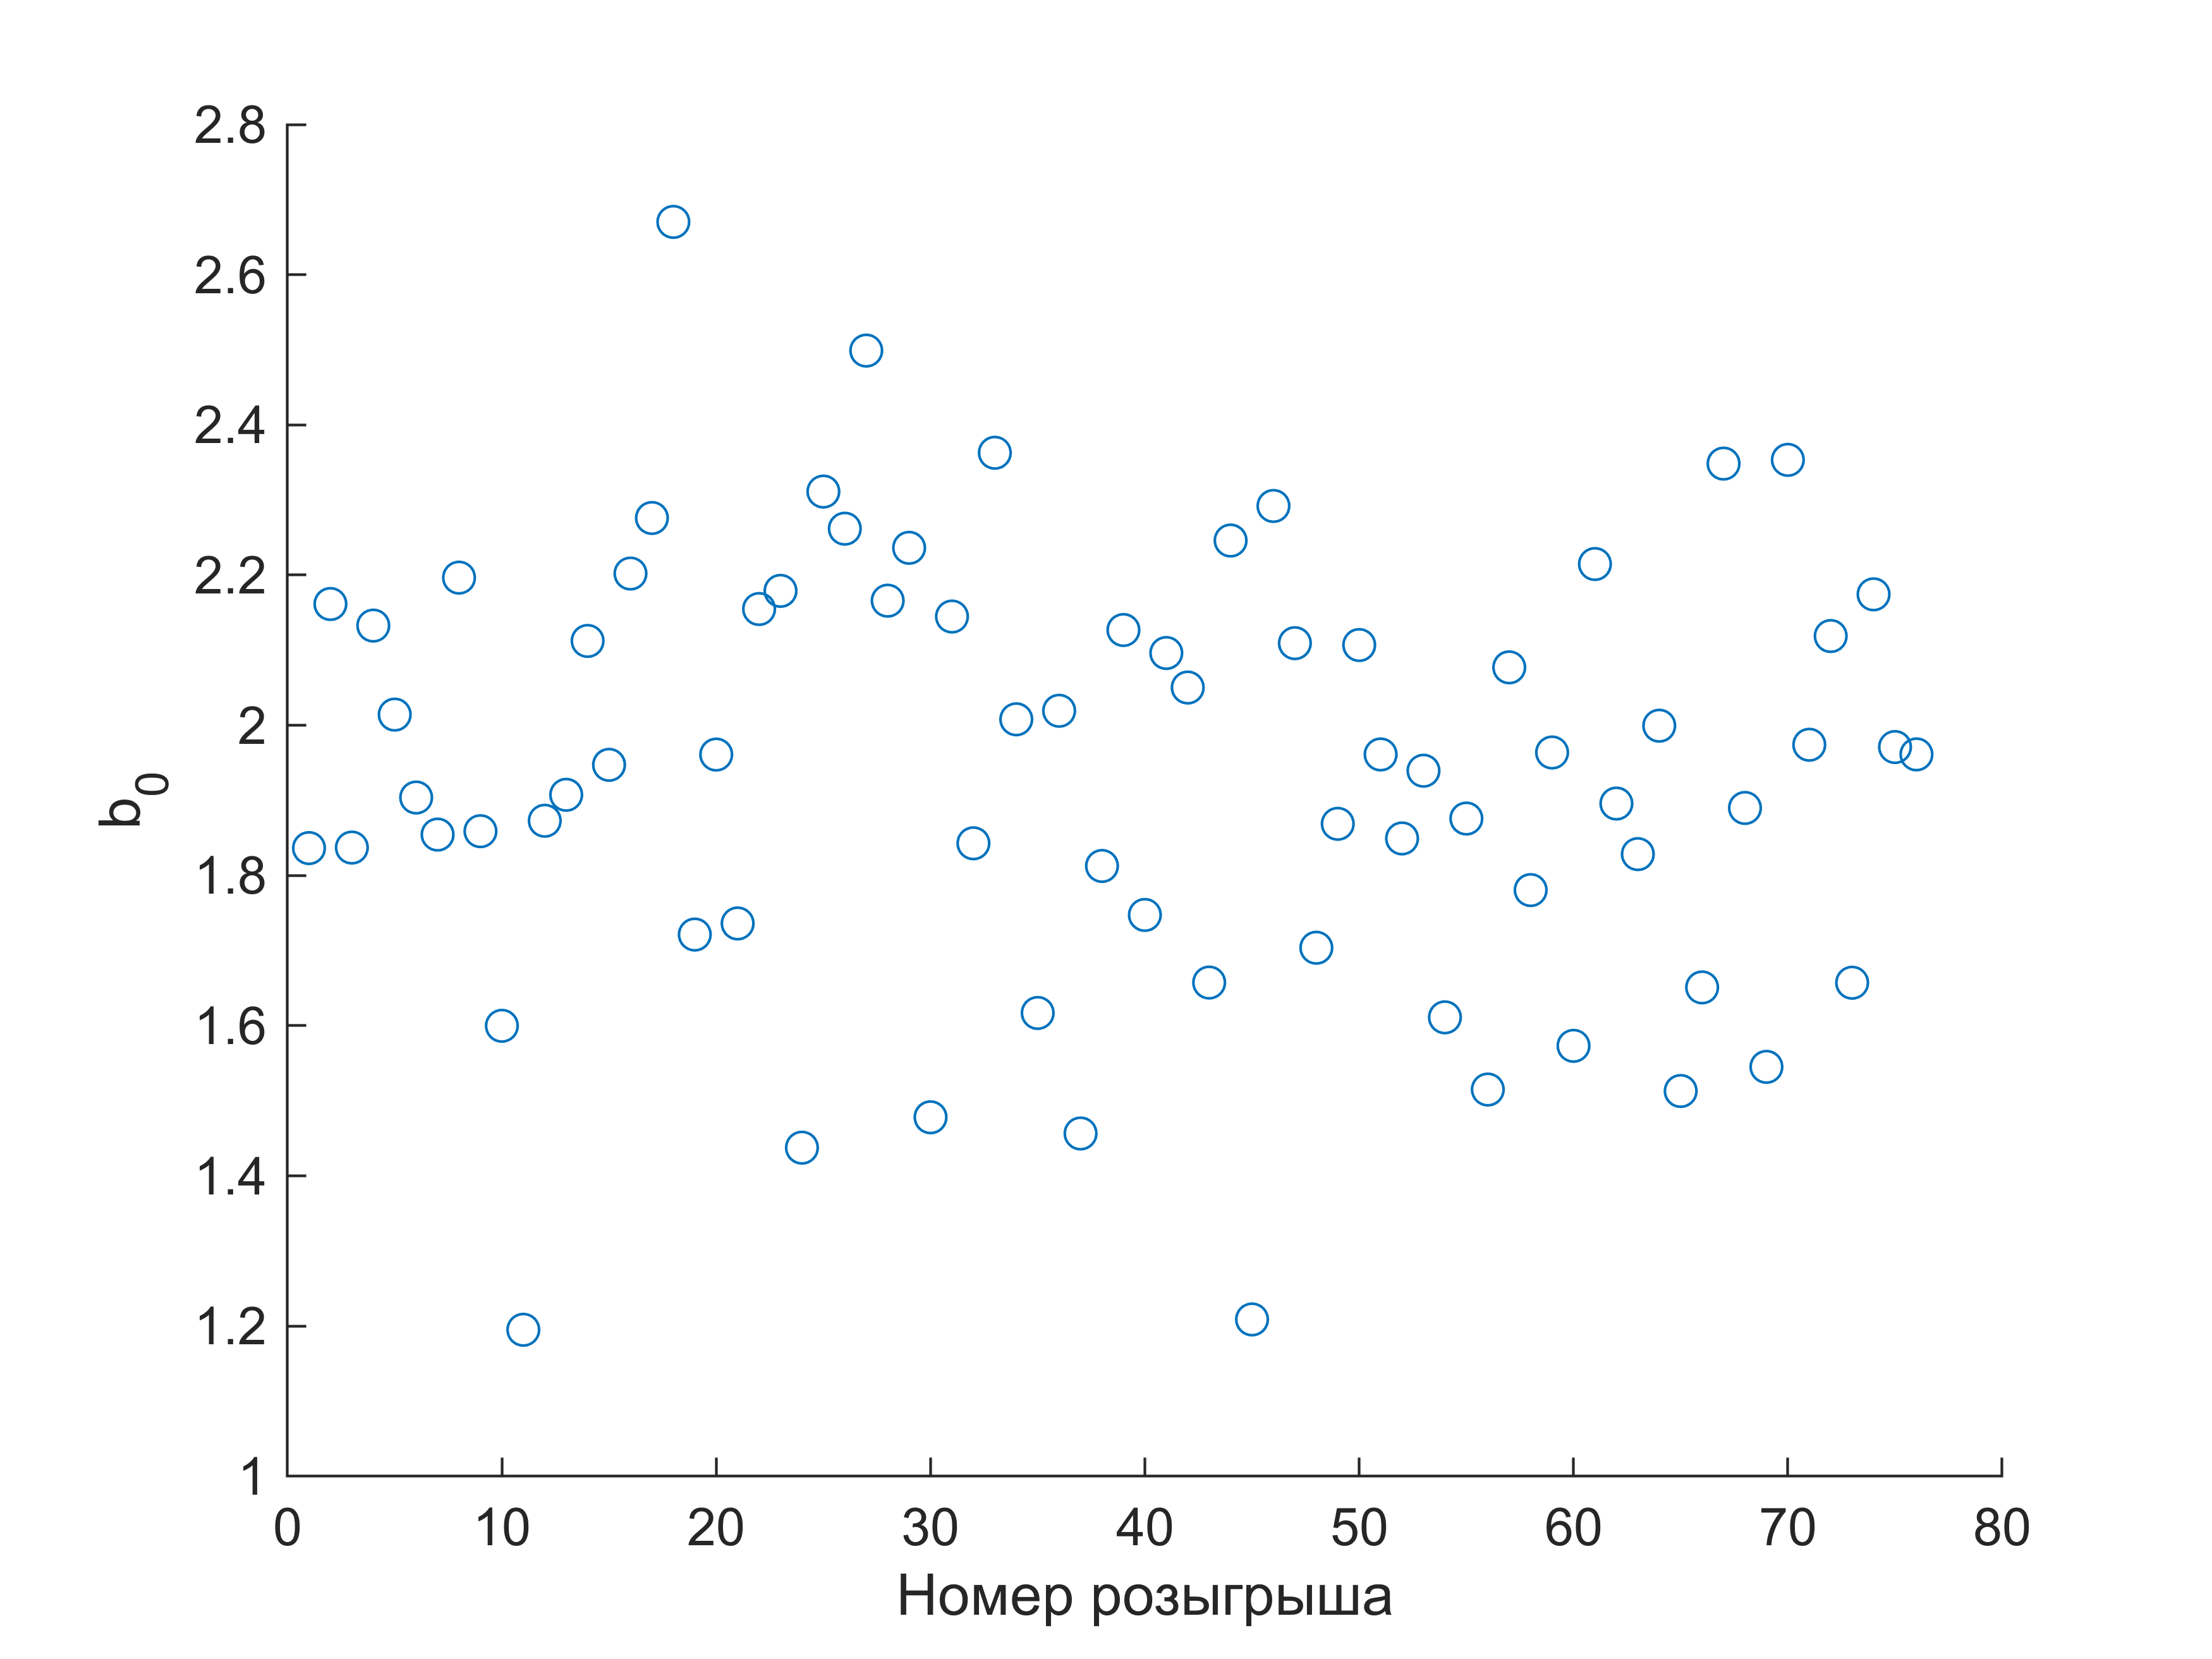

In [4]:

% выбираем параметр, для которого отображается распределение
% фитинг

selection = 1;
scatter(1:tests_number,b_mat(:,selection))
b_str = "b_"+ string(selection-1);
ylabel(b_str);xlabel("Номер розыгрыша")


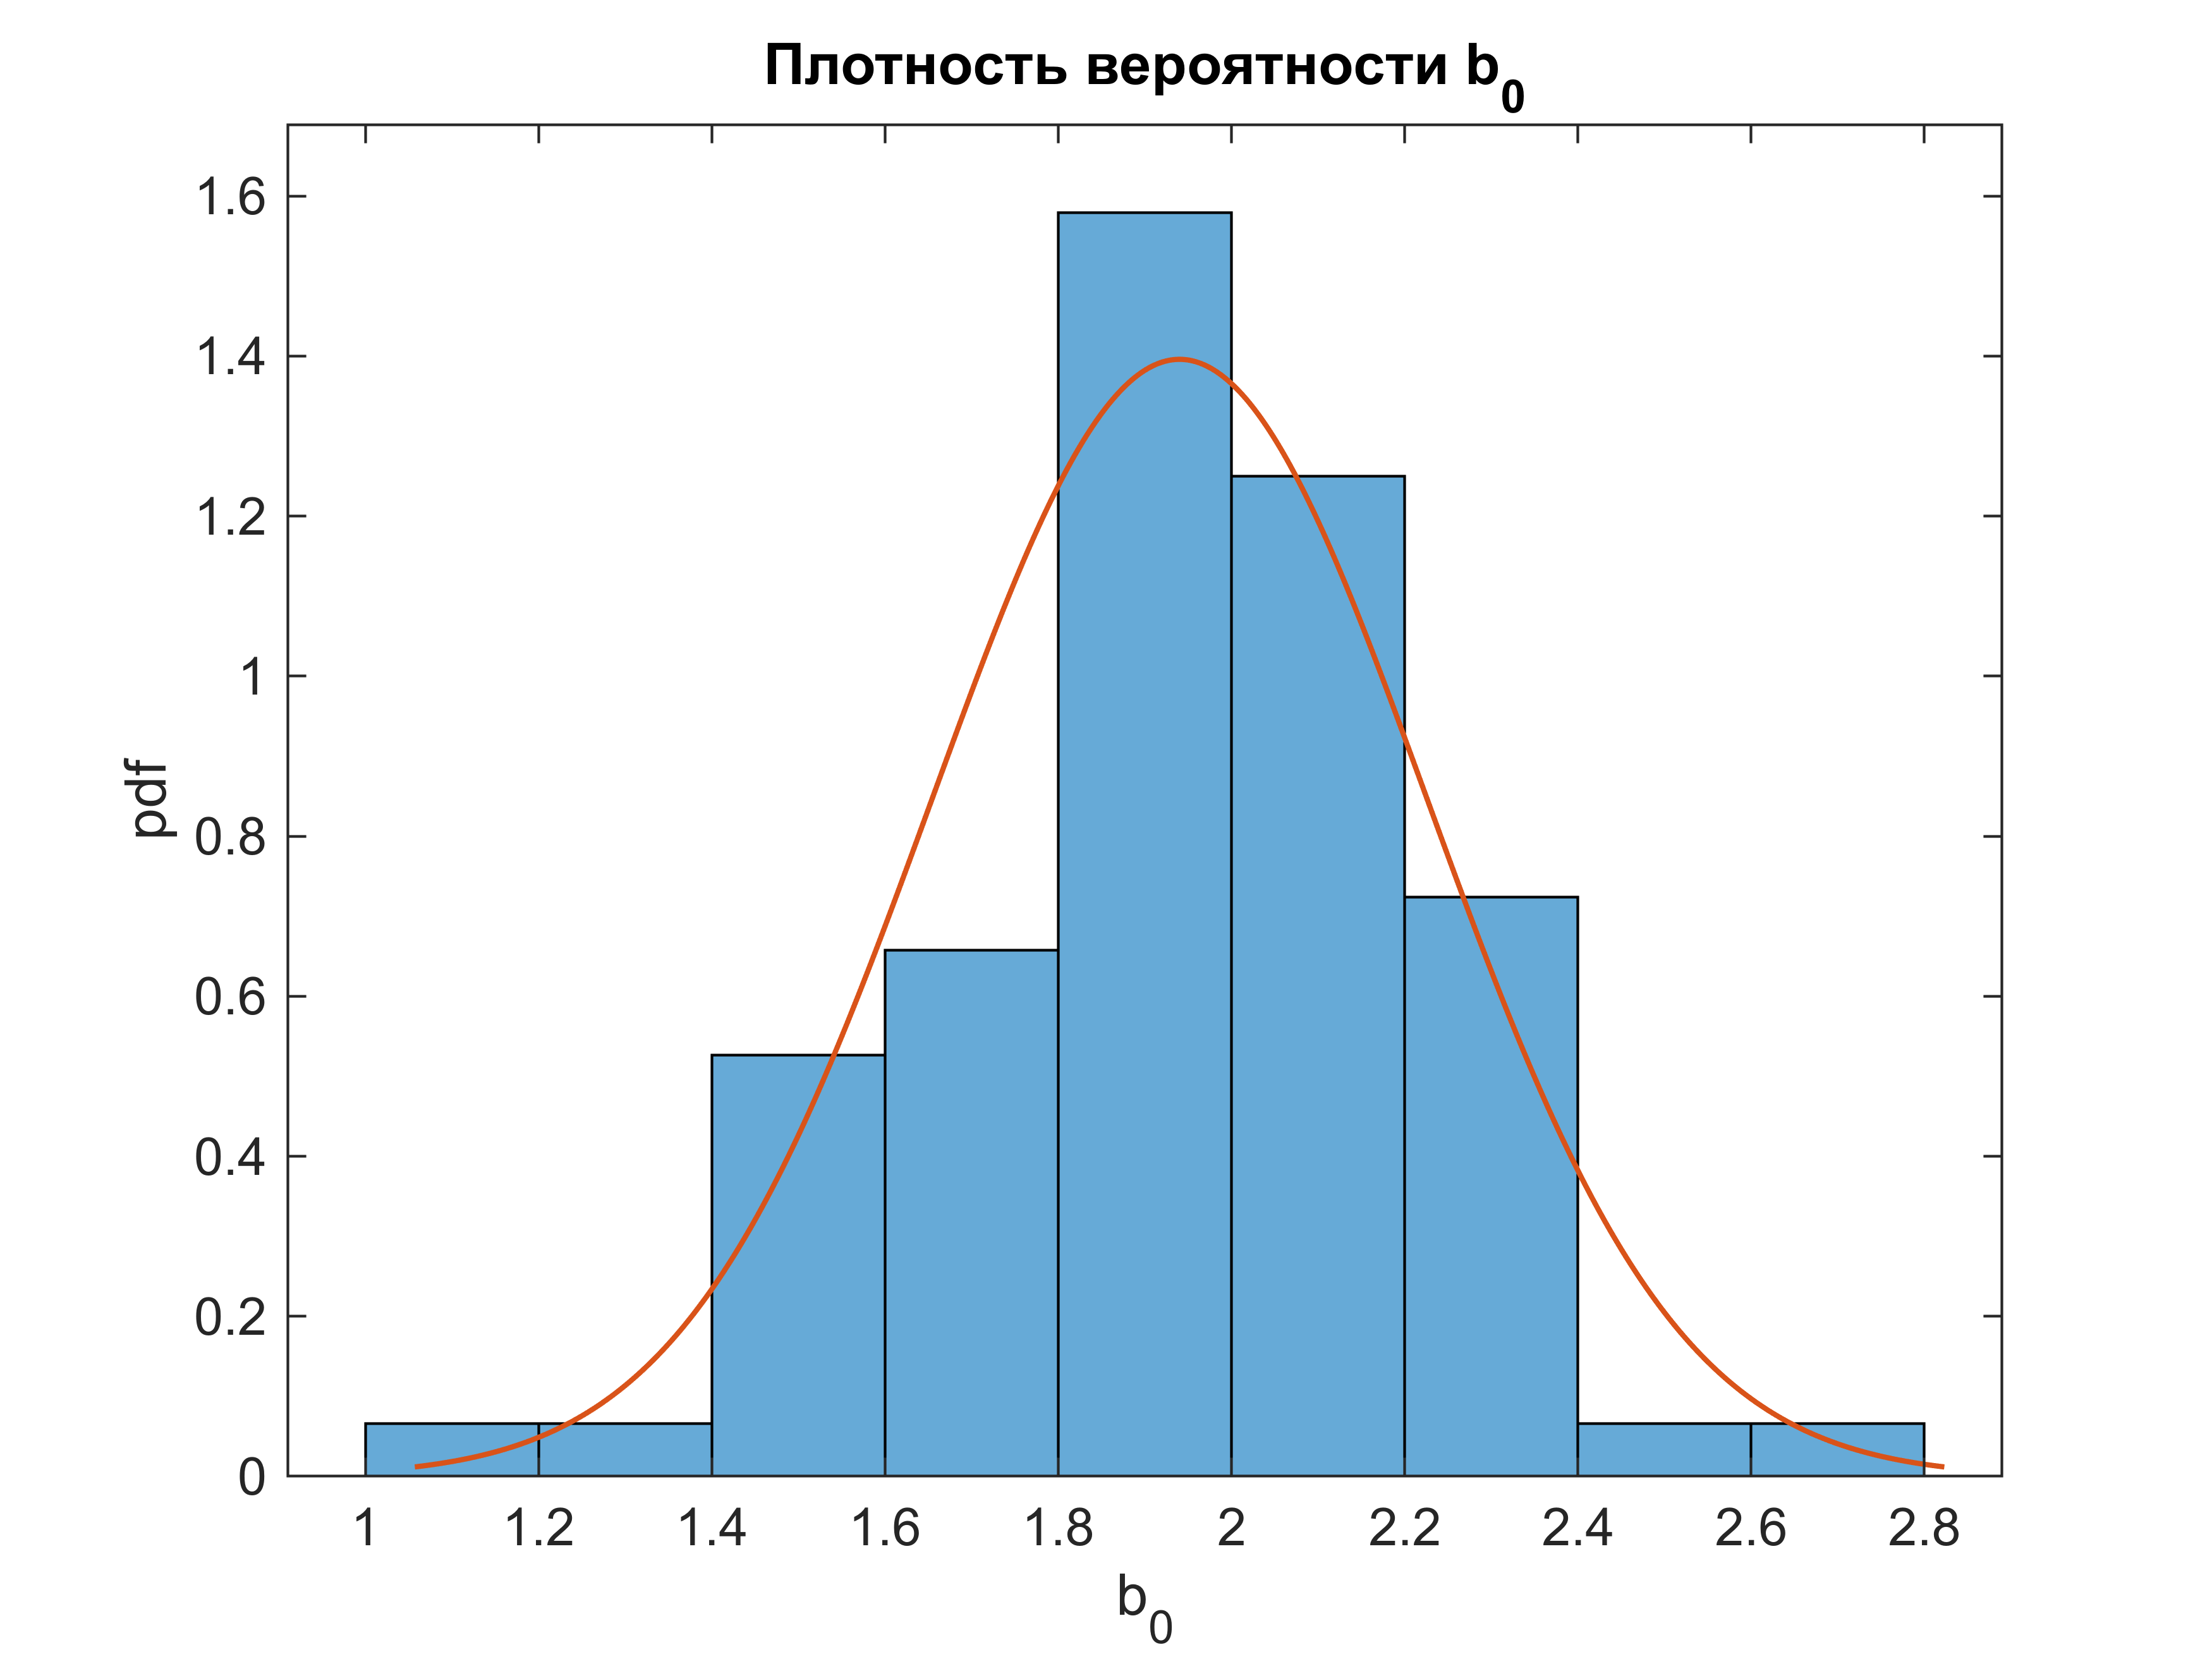

In [5]:

ax = get_next_ax();
fitted_distr = fitted_distr_array(selection); % фитим распределения методом из statistical toolbox
plot(ax,fitted_distr)
 title(ax,"Плотность вероятности "+ b_str)
 xlabel(ax,b_str);
 ylabel(ax,"pdf");


Тут важный момент, что для ошибки мы сделали только одно предположение, что она несмещенная, мы не полагали конкретной формы распределения.


Среднее по тестам значение нашей оценки параметров модели равно истинному значению


In [6]:
[sampling_volume,tests_number,beta_mat] = sampling_surf_plot(beta,101,201,0.2);


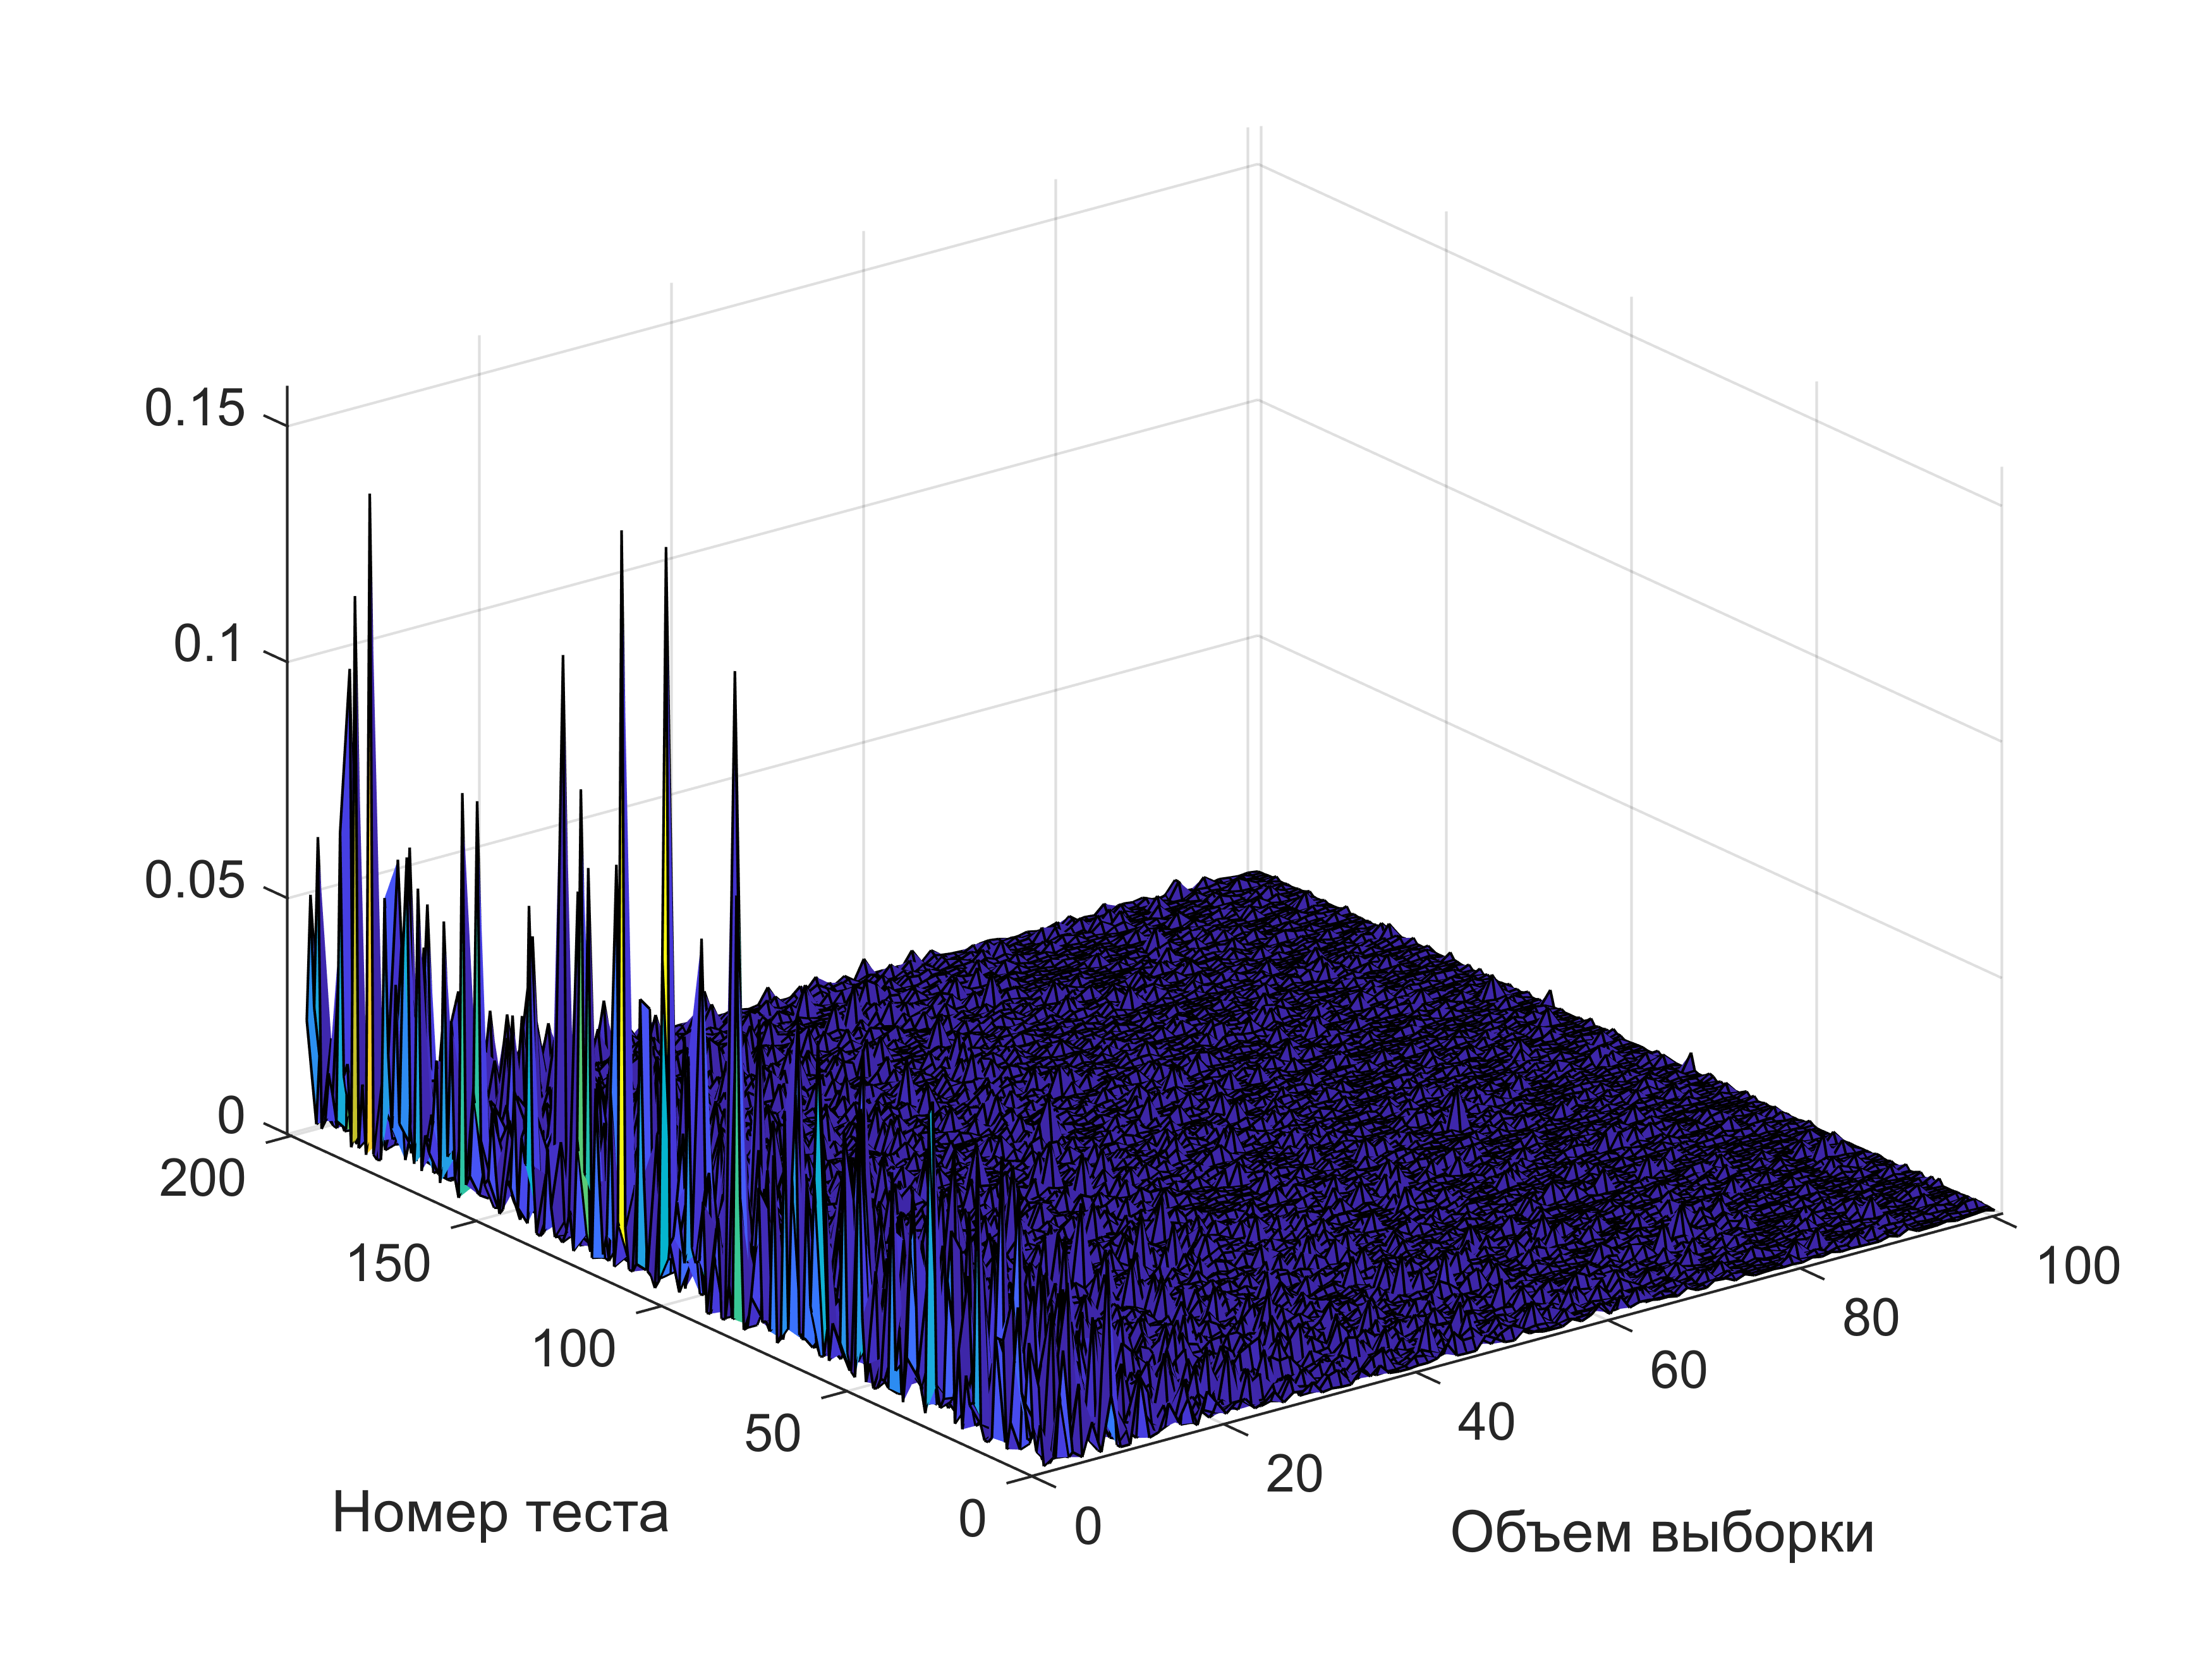

In [7]:
% изучим влияние объема выборки на вариацию параметров
b_mat_selected = beta_mat(:,:,selection);
selection_var= (b_mat_selected - beta(selection)).^2;
bmin = min(b_mat_selected,[],'all');
bmax = max(b_mat_selected,[],'all');
ax = get_next_ax();
[Xsurf,Ysurf]= meshgrid(sampling_volume(:),tests_number);
surf(ax,Xsurf,Ysurf,selection_var');%,"LevelList",linspace(bmin,bmax,5))
xlabel("Объем выборки")
ylabel("Номер теста")

In [8]:
% строим зависимость вариации параметров модели от амплитуды ошибки
selection = 2;
b_str = "b_"+ string(selection);
ax = get_next_ax();
delta = [0.1,0.2,0.4,1]

delta = 1x4    
    0.1000    0.2000    0.4000    1.0000


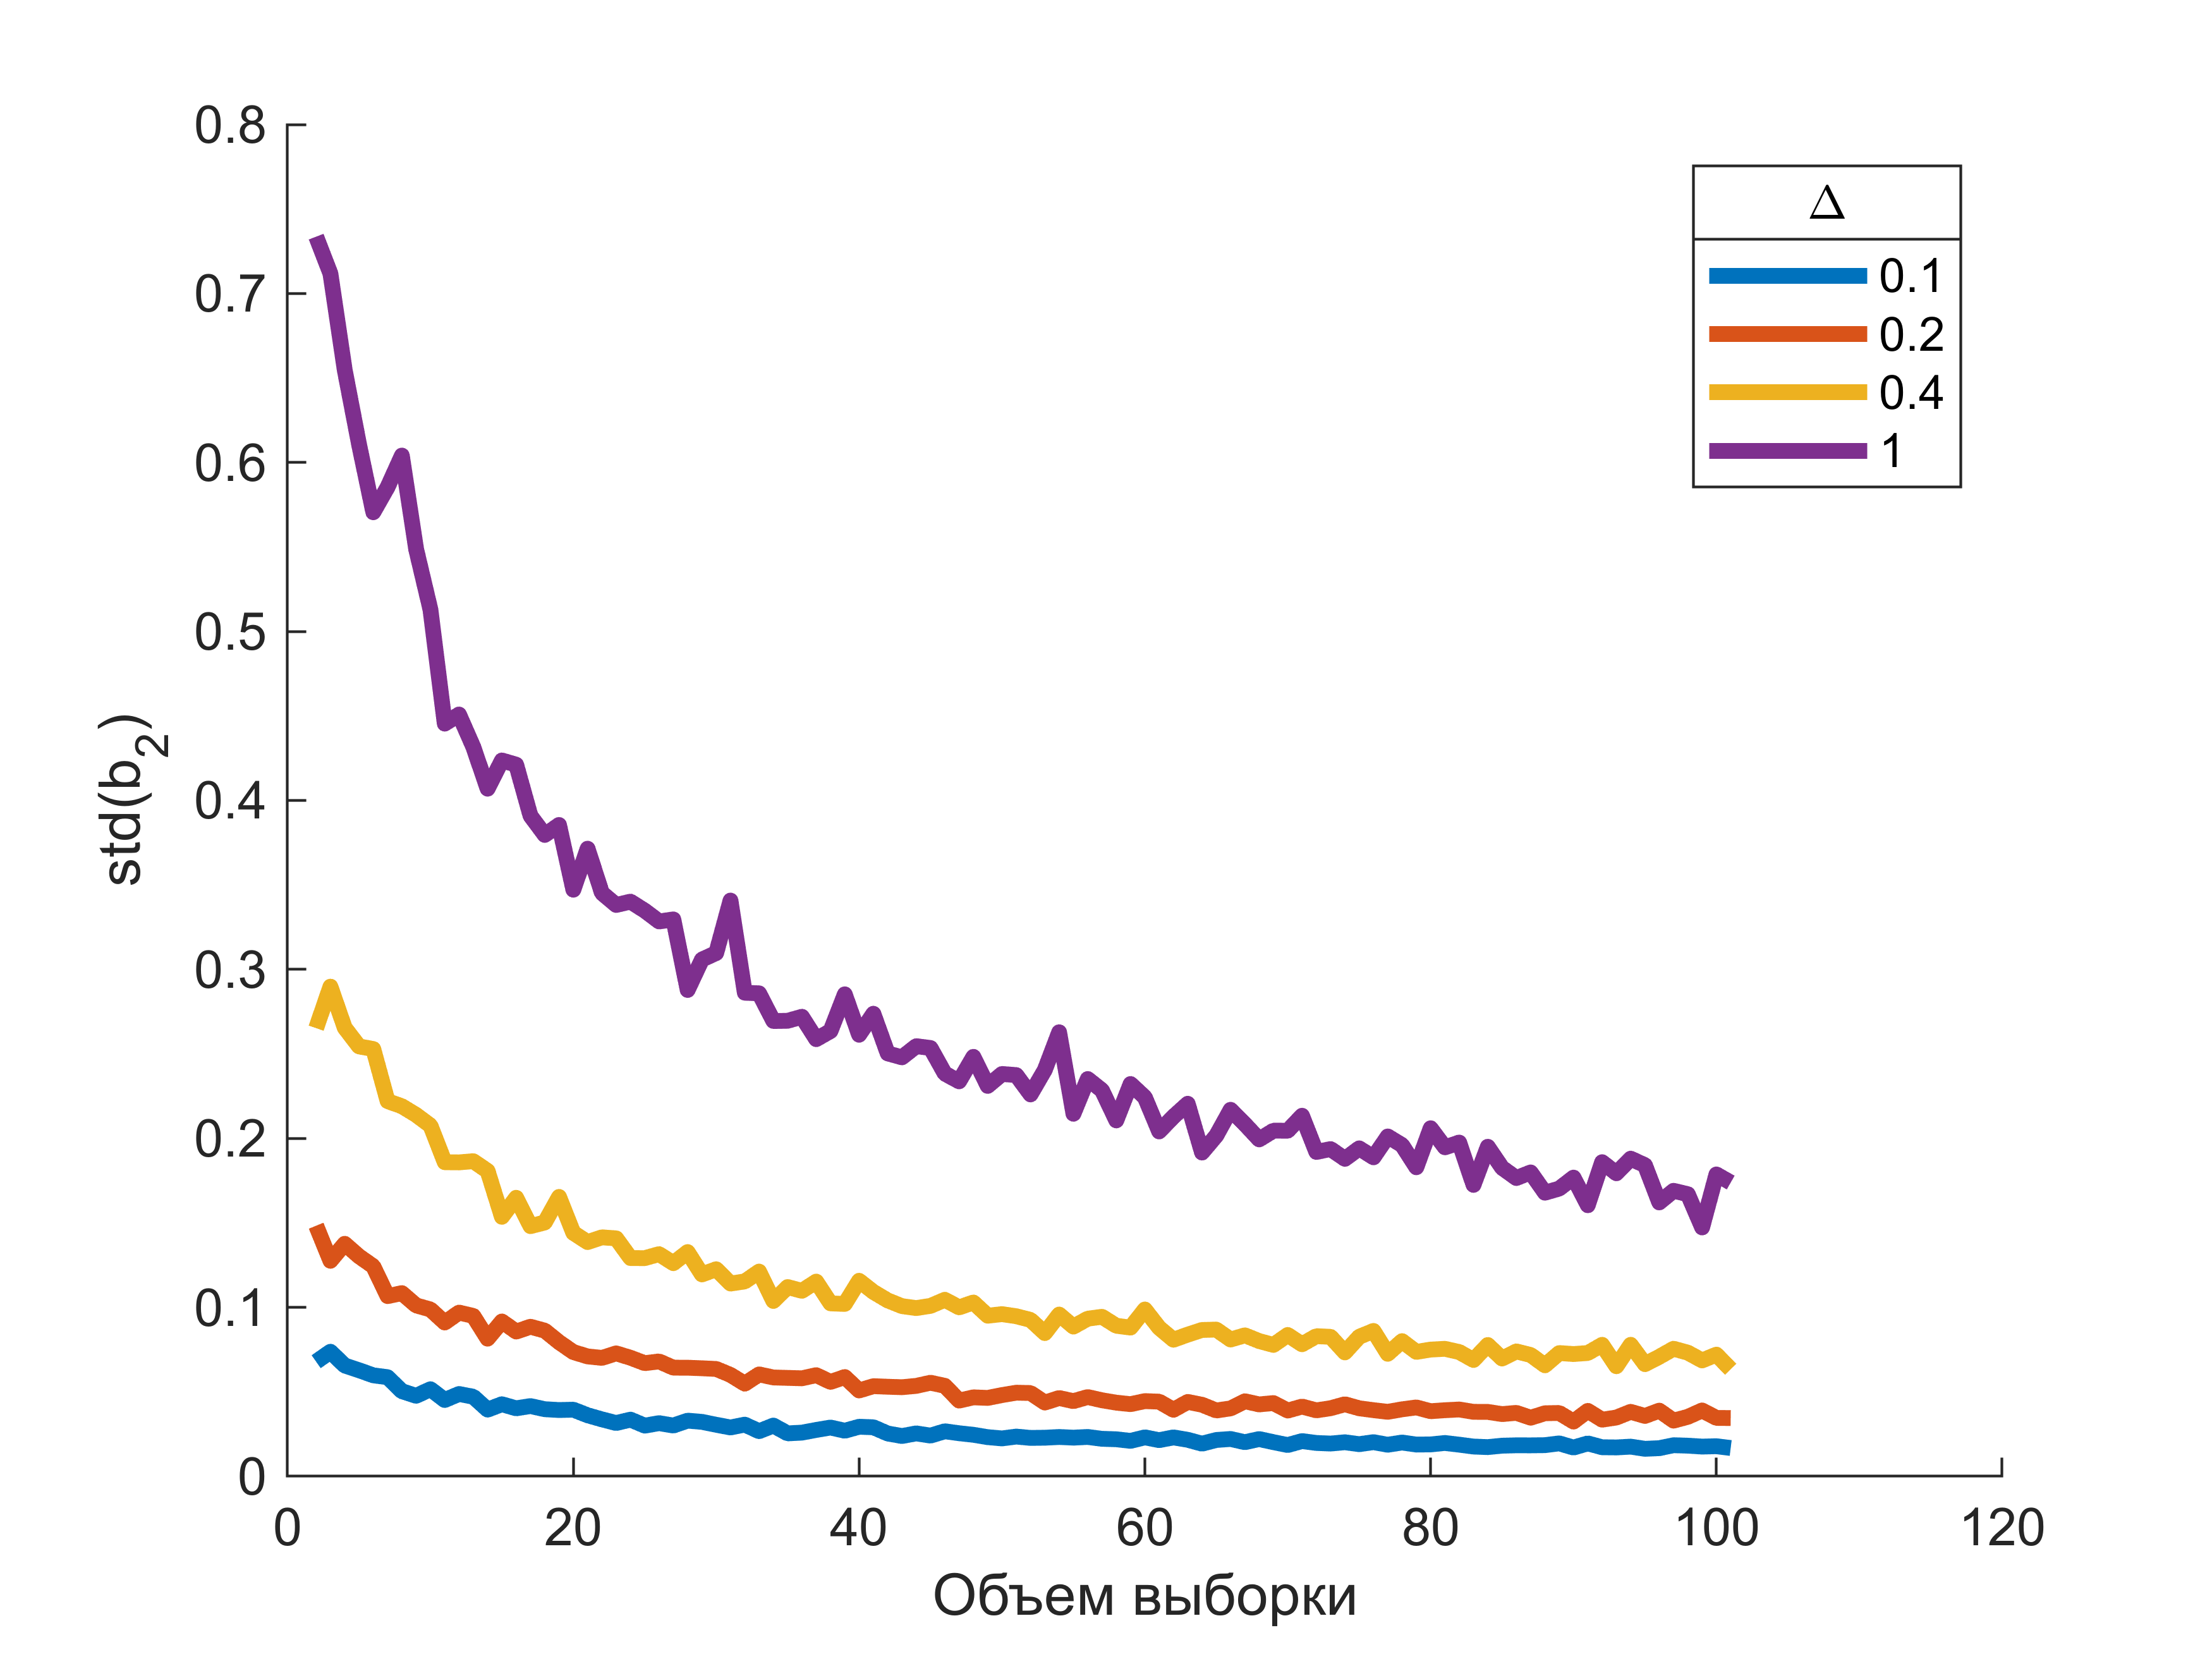

In [9]:
b_std = cell(numel(delta),1);

hold(ax,"on")
for ii = 1:numel(delta)
    [~,~,beta_mat] = sampling_surf_plot(beta,101,201,delta(ii));
    b_mat_selected = beta_mat(:,:,selection);
    b_std{ii}=std(b_mat_selected,0,2);
    plot(ax,sampling_volume,b_std{ii},"LineWidth",3);
end
hold(ax,"off")
lgd = legend(ax,string(delta(:)),"Location",'northeast');
lgd.Title.String = "\Delta ";
xlabel(ax,"Объем выборки");
ylabel(ax,"std("+b_str+")");


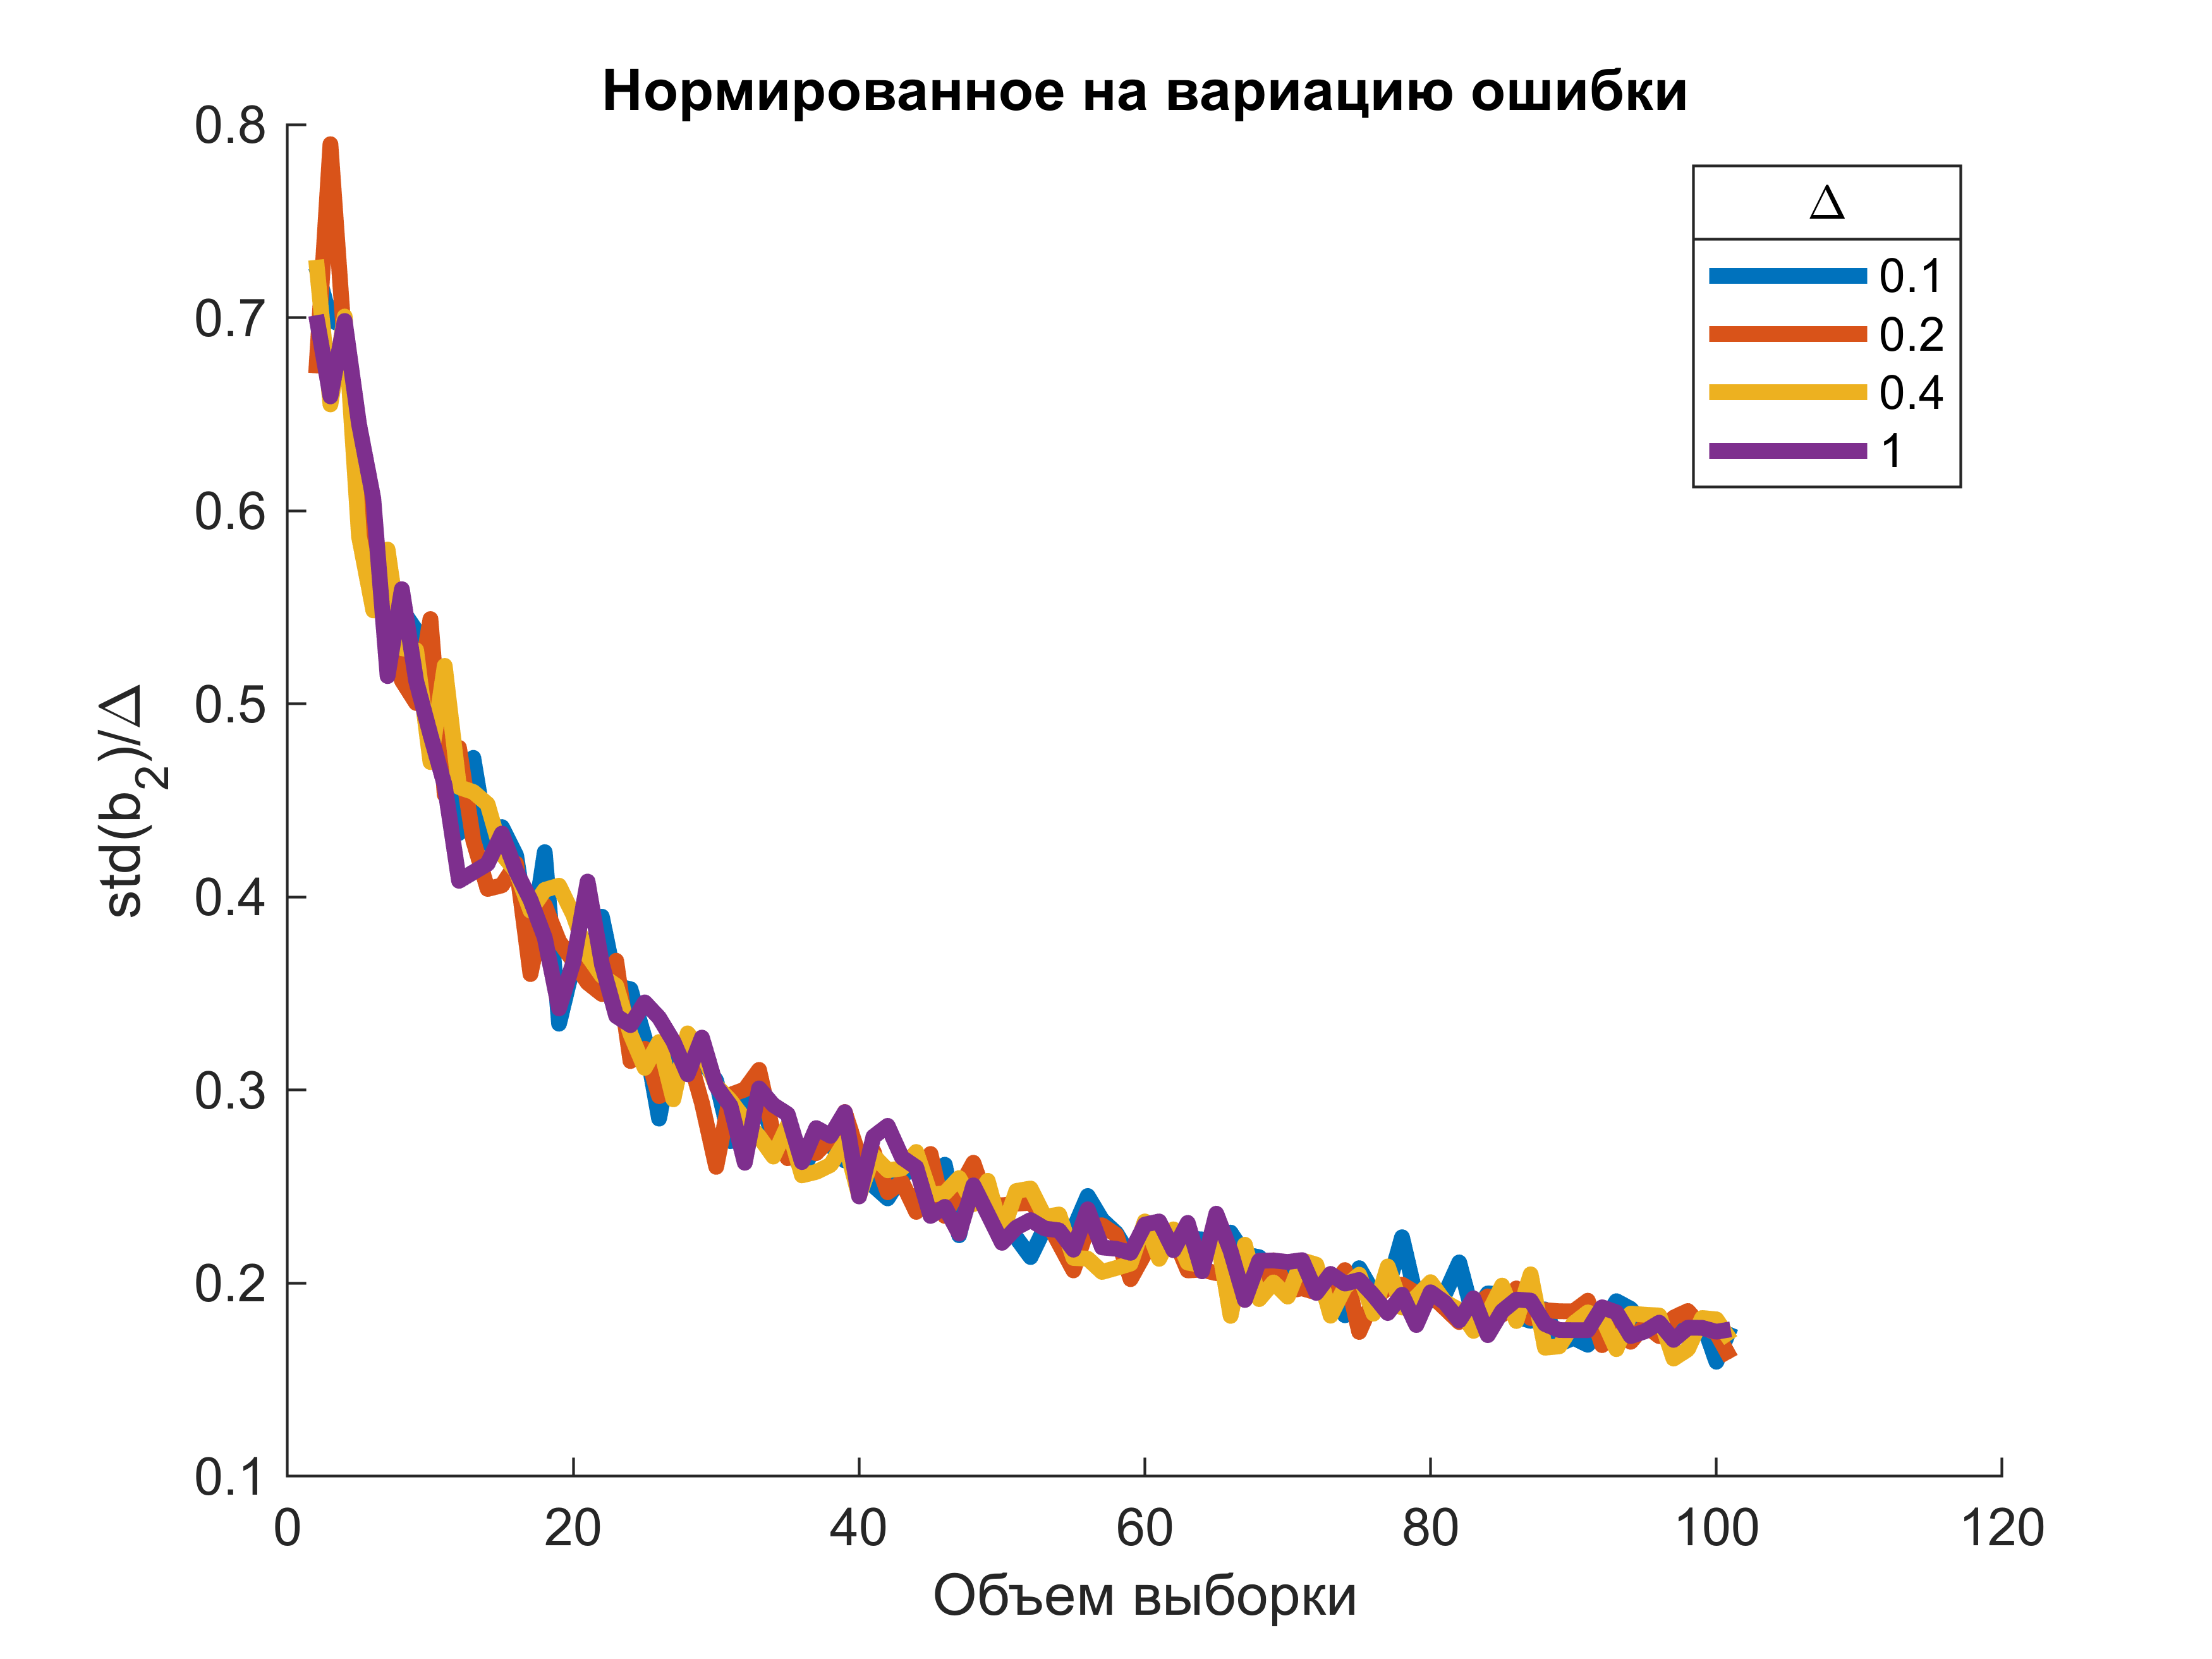

In [10]:

ax = get_next_ax();
hold(ax,"on")
for ii = 1:numel(delta)
    [~,~,beta_mat] = sampling_surf_plot(beta,101,201,delta(ii));
    b_mat_selected = beta_mat(:,:,selection);
    b_std{ii}=std(b_mat_selected,0,2);
    plot(ax,sampling_volume,b_std{ii}/delta(ii),"LineWidth",3);
end
title("Нормированное на вариацию ошибки")
hold(ax,"off");
lgd = legend(ax,string(delta(:)),"Location",'northeast');
lgd.Title.String = "\Delta ";
xlabel(ax,"Объем выборки");
ylabel(ax,"std("+b_str+")/\Delta");


Основной экспериментальный вывод, вариация коэффициентов регрессии прямо пропорциональна амлитуде ошибки исходных данных


**Обозначения статистических параметров**


Случайные величины, которые мы изучаем путем их розыгрыша (сэмплирования, выборки) характеризуются векторами этих сэмплов


Пусть, вектора $\vec{X}$ и $\vec{Y}$ \- вектора сэмплов случайно величины, N \- количество измерений.


 $\overline{X} ={\vec{I} }^T \vec{X} /N$ , $\overline{Y} ={\vec{I} }^T \vec{Y} /N$ \- среднее значение выборки, $\vec{I}$ \- вединичный вектор (состоящий из единиц)


Квадратичные отклонения:

<a name="M_A7E494A1"></a>

$$S_{XY} =[\vec{X} -\overline{X} \vec{I} ]^T [\vec{Y} -\overline{Y} \vec{I} ]={\vec{X} }^T \vec{Y} -N\overline{X} \overline{Y}$$
<a name="M_8A50E831"></a>

$$S_{XX} =[\vec{X} -\overline{X} \vec{I} ]^T [\vec{X} -\overline{X} \vec{I} ]={\vec{X} }^T \vec{X} -N{\overline{X} }^2$$

Это по сути скалярное произведение, только каждый из векторов смещен оносительно своего среднего


Черточка сверху\- среднее значение, стрелочка сверху \- вектор.


 $Var(\vec{X} )=S_{XX} /(N-1)$ \- вариация,


Если сложить данные в матрицу $M=[\vec{X} ,\vec{Y} ]$ , то ковариация этой матрицы (это ковариация двух случайных скалярных величин, которые даются в виде вектор\-столбцов их семплов, это не случайные вектора!) будет :


$$Cov(M)=[\vec{X} ,\vec{Y} ][\begin{array}{c} {\vec{X} }^T \newline {\vec{Y} }^T  \end{array}]=[\begin{array}{cc} S_{XX}  & S_{XY} \newline S_{_{YX} }  & S_{YY}  \end{array}]/(N-1)$$

Таким образом, в матрице ковариации выборок двух случайных переменных на диагонали стоят вариации каждой из переменных, а вне диагонали ковариации.


In [11]:
clearvars
N=3;
X=randn(N,1);Y=randn(N,1);
cov([X,Y])

ans = 2x2    
    0.2300   -0.1083
   -0.1083    0.0651

In [12]:
cov(X,Y)

ans = 2x2    
    0.2300   -0.1083
   -0.1083    0.0651

In [13]:
X=X-mean(X);Y=Y-mean(Y);
[X'*X,Y'*X;
    X'*Y,Y'*Y]/(N-1)

ans = 2x2    
    0.2300   -0.1083
   -0.1083    0.0651


Если случаные переменные некоррелированы, то их ковариация должна быть близка к нулю. Если коррелированы, то нет. Проведем простой эксперимент с бросанием монетки.


У нас есть две монетки. Пусть орел  \- это 1 , а решка 0.


In [14]:
disp("Монетки независимы, ковариация равна нулю:")

Монетки независимы, ковариация равна нулю:

In [15]:
clearvars
x1 = rand(1000,1)>0.5;
x2 = rand(1000,1)>0.5;
Sxy=(x1'*x2)/(999)

Sxy = 0.2202

In [16]:
%Sxy=(x1-mean(x1))'*(x2-mean(x2))/(999)

In [17]:
clearvars
disp("Монетки склеены разноименными краями, ковариация не равна нулю:" )

Монетки склеены разноименными краями, ковариация не равна нулю:

In [18]:
x1 = rand(1000,1)>0.5;
x2 = ~x1;
%Sxy=(x1-mean(x1))'*(x2-mean(x2))/(999)
Sxy=(x1'*x2)/(999)

Sxy = 0


Как так\-то?


**Регрессионная модель  нулевого порядка**


 $X_{zero~order} =[\vec{I} ]$ \- матрица предикторов состоит только из одного единичного столбца


$$\vec{b} =b_0 =(X^T X)^{-1} X^T \vec{Y} =({\vec{I} }^T \vec{I} )^{-1} {\vec{I} }^T \vec{Y} =\frac{\sum_{i=1}^N y_i }{\sum_{i=1}^N 1}=\frac{\sum_{i=1}^N y_i }{N}=\overline{Y}$$

Таким образом,  регреcсия нулевого порядка описывает зависимость $Y$ от $X$ как среднее от имеющихся результатов наблюдения Y.


**Первый порядок (прямая линия)**


Матрица модели состоит всего из двух столбцов: $X_{first~order} =[\vec{I} ,\vec{X} ]$ , соотвественно, $X_{first~order}^T =[\begin{array}{c} {\vec{I} }^T \newline {\vec{X} }^T  \end{array}]$ (напомню, что стрелочка в $\vec{a}$ , обозначает всегда вектор\-столбец)


Обратим внимание, что ${\vec{I} }^T \vec{X} =N\overline{X}$ ,где черточка сверху $\overline{X}$ обозначает среднее арифметическое значение столбца.


$$\vec{b} =[\begin{array}{c} b_0 \newline b_1  \end{array}]=X_{first~order}^{\dagger} \vec{Y} =([\begin{array}{c} {\vec{I} }^T \newline {\vec{X} }^T  \end{array}][\vec{I} ,\vec{X} ])^{-1} [\begin{array}{c} {\vec{I} }^T \newline {\vec{X} }^T  \end{array}]\vec{Y} =([\begin{array}{cc} N~ & {\vec{I} }^T \vec{X} ~\newline {\vec{X} }^T \vec{I}  & {\vec{X} }^T \vec{X}  \end{array}])^{-1} [\begin{array}{c} {\vec{I} }^T \newline {\vec{X} }^T  \end{array}]\vec{Y}$$

Учитывая, что ([см](#M_8A50E831)) ${\vec{X} }^T \vec{X} =S_{XX} +N{\overline{X} }^2$ , а ([см](#M_A7E494A1)) ${\vec{X} }^T \vec{Y} =S_{XY} +N\overline{X} \overline{Y}$ :


$$\vec{b} =[\begin{array}{cc} N~ & N\overline{X} ~\newline N\overline{X}  & S_{XX} +N{\overline{X} }^2  \end{array}]^{-1} [\begin{array}{c} N\overline{Y} \newline S_{XY} +N\overline{X} \overline{Y}  \end{array}]$$

| Обратную матрицу довольно легко инвертировать, формула для инвертирования матрицы 2х2

<a name="M_243F5DE9"></a>

 $A^{-1} =[\begin{array}{cc} a_{11}  & a_{12} \newline a_{21}  & a_{22}  \end{array}]^{-1} =\frac{1}{det(A)}[\begin{array}{cc} a_{22}  & -a_{12} \newline -a_{21}  & a_{11}  \end{array}]$ , где определитель $det(A)=a_{11} a_{22} -a_{21} a_{12}$


In [19]:
A=sym("a",[2 2]);
inv(A)

In [20]:
det(A)

In [21]:
inv(A)*det(A)


$$det(X_{first~order}^T X_{first~order} )=N{\vec{X} }^T \vec{X} -({\vec{I} }^T \vec{X} )^2 =N{\vec{X} }^T \vec{X} -(N\overline{X} )^2 =NS_{XX}$$

Тогда, с учетом формулы выше  ([см](#M_243F5DE9)) окончательно получим выражение для коэффициентов аппроксимации:


$$[\begin{array}{c} b_0 \newline b_1  \end{array}]=\frac{1}{N}S_{XX}^{-1} [\begin{array}{cc} S_{XX} +N{\overline{X} }^2 ~ & -N\overline{X} ~\newline -N\overline{X}  & N \end{array}][\begin{array}{c} N\overline{Y} \newline S_{XY} +N\overline{X} \overline{Y}  \end{array}]$$

Отсюда получаем очень простые выражения для коэффициентов аппроксимации:

<a name="M_CB7732DF"></a>

$$b_1 =\frac{1}{N}S_{XX}^{-1} [-N^2 \overline{X} \overline{Y} +NS_{XY} +N^2 \overline{X} \overline{Y} ]=S_{XX}^{-1} S_{XY}$$

$$b_0 =S_{XX}^{-1} [NS_{XX} \overline{Y} +N^2 {\overline{X} }^2 \overline{Y} -NS_{XY} \overline{X} -N^2 {\overline{X} }^2 \overline{Y} ]=\overline{Y} -S_{XX}^{-1} S_{XY} \overline{X} =\overline{Y} -b_1 \overline{X}$$

In [22]:
% проверка правильности выражений для расчета через ковариции и через
% псевдообратную матрицу
clearvars
N = 10

N = 10

In [23]:
X = linspace(-1,1,N)';
Y = 0.0 + 0.43*X + 0.01*randn(10,1);
% через встроенную функцию:
Kxy = cov(X,Y) % матрица ковариации двух случайных переменных, представленных векторами их семплов одинаковго размера

Kxy = 2x2    
    0.4527    0.1965
    0.1965    0.0855

In [24]:
% матричное выражение
[X,Y]'*[X,Y]/(N-1) % матрица ковариации двух случаных переменных X и Y

ans = 2x2    
    0.4527    0.1965
    0.1965    0.0855

In [25]:
b1 = Kxy(1,2)/Kxy(1,1);
b0=mean(Y)-b1*mean(X);
b_vect_cov = [b0;b1] % через матрицу ковариации

b_vect_cov = 2x1    
   -0.0016
    0.4342

In [26]:
% расчет через псевдообратную матрицу
I = ones(size(X));
b_vect_pseudoInverse = [I,X]\Y

b_vect_pseudoInverse = 2x1    
   -0.0016
    0.4342


$$\vec{\hat{Y} } =[\vec{I} ,\vec{X} ][\begin{array}{c} b_0 \newline b_1  \end{array}]=\vec{I} \overline{Y} -b_1 \vec{I} \overline{X} +b_1 \vec{X}$$

$$\vec{\hat{Y} } -\vec{I} \overline{Y} =b_1 [\vec{X} -\vec{I} \overline{X} ]=S_{XX}^{-1} S_{XY} [\vec{X} -\vec{I} \overline{X} ]$$

Формула расчета параметров модели через вариацию\-ковариацию для линейной регрессии справедлива и для общего случая (когда у нас имеются несколько предикторов). Задача тогда формулируется как:


$$\vec{Y} =[\vec{I} ,\vec{X_1 } ,\ldots,\vec{X_P } ][\begin{array}{c} b_0 \newline \vec{b_1 }  \end{array}]=[\vec{I} ,X][\begin{array}{c} b_0 \newline \vec{b_1 }  \end{array}]$$

Вектор параметров модели также дается [выражением](#M_CB7732DF):


$$\vec{b_1 } =S_{XX}^{-1} {\vec{S} }_{XY}$$

$$b_0 =\overline{Y} -{\vec{\overline{X} } }^T \vec{b_1 }$$

Однако, теперь:


$$S_{XX} =(X-\vec{I} {\vec{\overline{X} } }^T )^T (X-\vec{I} {\vec{\overline{X} } }^T )=X^T X-N\vec{\overline{X} } {\vec{\overline{X} } }^T =(N-1)Cov(X)$$

$${\vec{S} }_{XY} =X^T \vec{Y} -N\vec{\overline{X} } \overline{Y}$$

 $\vec{\overline{X} }$ \- вектор\-столбец средних значений предикторов. Подробный вывод см. [отдельно](#H_F18401D0).


In [27]:
clearvars
N=10

N = 10

In [28]:
X1 = randn(N,1);
X2= randn(N,1);
I = ones(size(X1));
Y = 0.5 + 0.43*X1 + 0.61*X2+ 0.2*randn(N,1);
meanY=mean(Y)

meanY = 0.1782

In [29]:
X = [X1,X2];
meanX = I*mean(X)

meanX = 10x2    
   -0.6349   -0.0250
   -0.6349   -0.0250
   -0.6349   -0.0250
   -0.6349   -0.0250
   -0.6349   -0.0250
   -0.6349   -0.0250
   -0.6349   -0.0250
   -0.6349   -0.0250
   -0.6349   -0.0250
   -0.6349   -0.0250

In [30]:

Sxy = (X-meanX)'*(Y-meanY)

Sxy = 2x1    
    7.4212
    3.3963

In [31]:

Sxx = (X-meanX)'*(X-meanX)

Sxx = 2x2    
   20.4687   -1.6897
   -1.6897    6.7716

In [32]:

cov(X)*(N-1)

ans = 2x2    
   20.4687   -1.6897
   -1.6897    6.7716

In [33]:
b1 = Sxx\Sxy;
b0=mean(Y)-mean(X)*b1

b0 = 0.4553

In [34]:

b_vect_cov = [b0;b1]

b_vect_cov = 3x1    
    0.4553
    0.4125
    0.6045

In [35]:
b_vect_pseudoInverse= [I,X]\Y

b_vect_pseudoInverse = 3x1    
    0.4553
    0.4125
    0.6045


Альтернативный вариант  \- через матрицу ковариации всех переменных:


$$Cov([X,\vec{Y} ])=\frac{1}{N-1}[\begin{array}{cc} (N-1)Cov(X) & ~{\vec{S} }_{XY} \newline {\vec{S} }_{XY}^T  & S_{YY}  \end{array}]$$

In [36]:
clearvars
N=100

N = 100

In [37]:
X1 = randn(N,1);X2= randn(N,1);Y = 0.5 + 0.43*X1 + 0.61*X2+ 0.2*randn(N,1); % генерим исходные данные
X = [X1,X2];
M = [X,Y]; % складываем все в одну табличку (матрицу свойств)
CovM = cov(M) % считаем ее ковариацию

CovM = 3x3    
    0.7897    0.0384    0.3615
    0.0384    0.7826    0.4887
    0.3615    0.4887    0.4898

In [38]:
b1_vec = CovM(1:2,1:2)\CovM(1:2,end) % находим коэффициенты предикторов

b1_vec = 2x1    
    0.4283
    0.6034

In [39]:
b0=mean(Y) - mean(X)*b1_vec % нашли dummy variable

b0 = 0.5112

In [40]:
% для сравнения тоже самое по формулам линейной алгебры:


#### Матрица ковариации параметров модели

Теперь вернемся к линейной регресси


$$\vec{b} =X^{\dagger} \vec{Y} =X^{\dagger} X\vec{\beta} +X^{\dagger} \vec{\epsilon} =\vec{\beta} +X^{\dagger} \vec{\epsilon}$$

 $\mathbb{E}[\vec{b} ]=\vec{\beta}$ , так как $X^{\dagger} X=(X^T X)^{-1} X^T X=I$ , а $\mathbb{E}[\vec{\epsilon} ]=\vec{0}$


$$Cov(\vec{b} )=(\vec{\beta} -\vec{b} )(\vec{\beta} -\vec{b} )^T =((X^{\dagger} X-I)\vec{b} +X^{\dagger} \vec{\epsilon} )((X^{\dagger} X-I)\vec{b} +X^{\dagger} \vec{\epsilon} )^T =X^{\dagger} \vec{\epsilon} {\vec{\epsilon} }^T (X^{\dagger} )^T$$

$$X^{\dagger} Cov(\vec{\delta} )X^{{\dagger}^T }$$

Теперь воспользуемся тем, что вектор ошибки случайный и каждая точка независима от другой, и все они получены из нормального распределения  $\delta \sim \sigma^2 N(0,1)$  \- означает, что $\delta$ получен из нормального распределения со средним значением равным нулю. Тогда ковариации будет диагональной: $Cov(\vec{\delta} )=[\begin{array}{ccc} \sigma^2  & ... & 0\newline 0 & \ddots  & 0\newline 0 & \ldots & \sigma^2  \end{array}]$


$$X^{\dagger} Cov(\vec{\delta} )X^{{\dagger}^T } =X^{\dagger} X^{{\dagger}^T } \sigma^2 =(X^T X)^{-1} \sigma^2$$

Последниц переъод следует из:


$$X^{\dagger} X^{{\dagger}^T } =(X^T X)^{-1} X^T [(X^T X)^{-1} X^T ]^T =(X^T X)^{-1} X^T X[(X^T X)^{-1} ]^T =[(X^T X)^{-1} ]^T =(X^T X)^{-1}$$

Таким образом, окончательно получим выражение для матрицы ковариации параметров линейной регрессии:


$$Cov(\vec{\beta )} =(X^T X)^{-1} \sigma^2$$

В этой формуле мы использовали то, что ошибка распределена нормально и для каждой точки дисперсия этого распределения одинакова.


Матрица ковариации вектора параметров линейной регрессии


$$Cov({\vec{Y} }_{interp} )=X_{interp} Cov(\vec{\beta} )X_{interp}^T$$
#### Небольшой численный эксперимент на предмет того, что такое доверительная вероятность.

In [41]:
% проведем численный эксперимент на выполнение статистики
clearvars
M = 1000;% количество тестов
N = 100;% количество точек в выборке
beta2 = zeros(M,2);
P=2;% количество параметров регрессионной модели
for jj = 1:M
    x = randn(N,1);
    y = 1 + 2*x + randn(N,1);
    X = [ones(N,1),x];
    beta = X\y;
    e= X*beta - y;
    sigma = e'*e/(N-P);% считаем вариацию ошибки
    Cov_beta = (X'*X)\eye(P)*sigma;% считаем матрицу ковариации
    Var_beta = diag(Cov_beta);% считаем вариацию (диагональные элементы матрицы ковраиации)
    beta2(jj,:)=beta(2) + sqrt(Var_beta(2))*[1 -1];
end
sum((2<=beta2(:,1)) & (2>=beta2(:,2)))/M

ans = 0.6870

In [42]:
d = fitdist(beta2(:,2),"Normal")

d = 
  NormalDistribution
  Normal distribution
       mu =   1.89824   [1.89206, 1.90442]
    sigma = 0.0995464   [0.0953667, 0.104112]


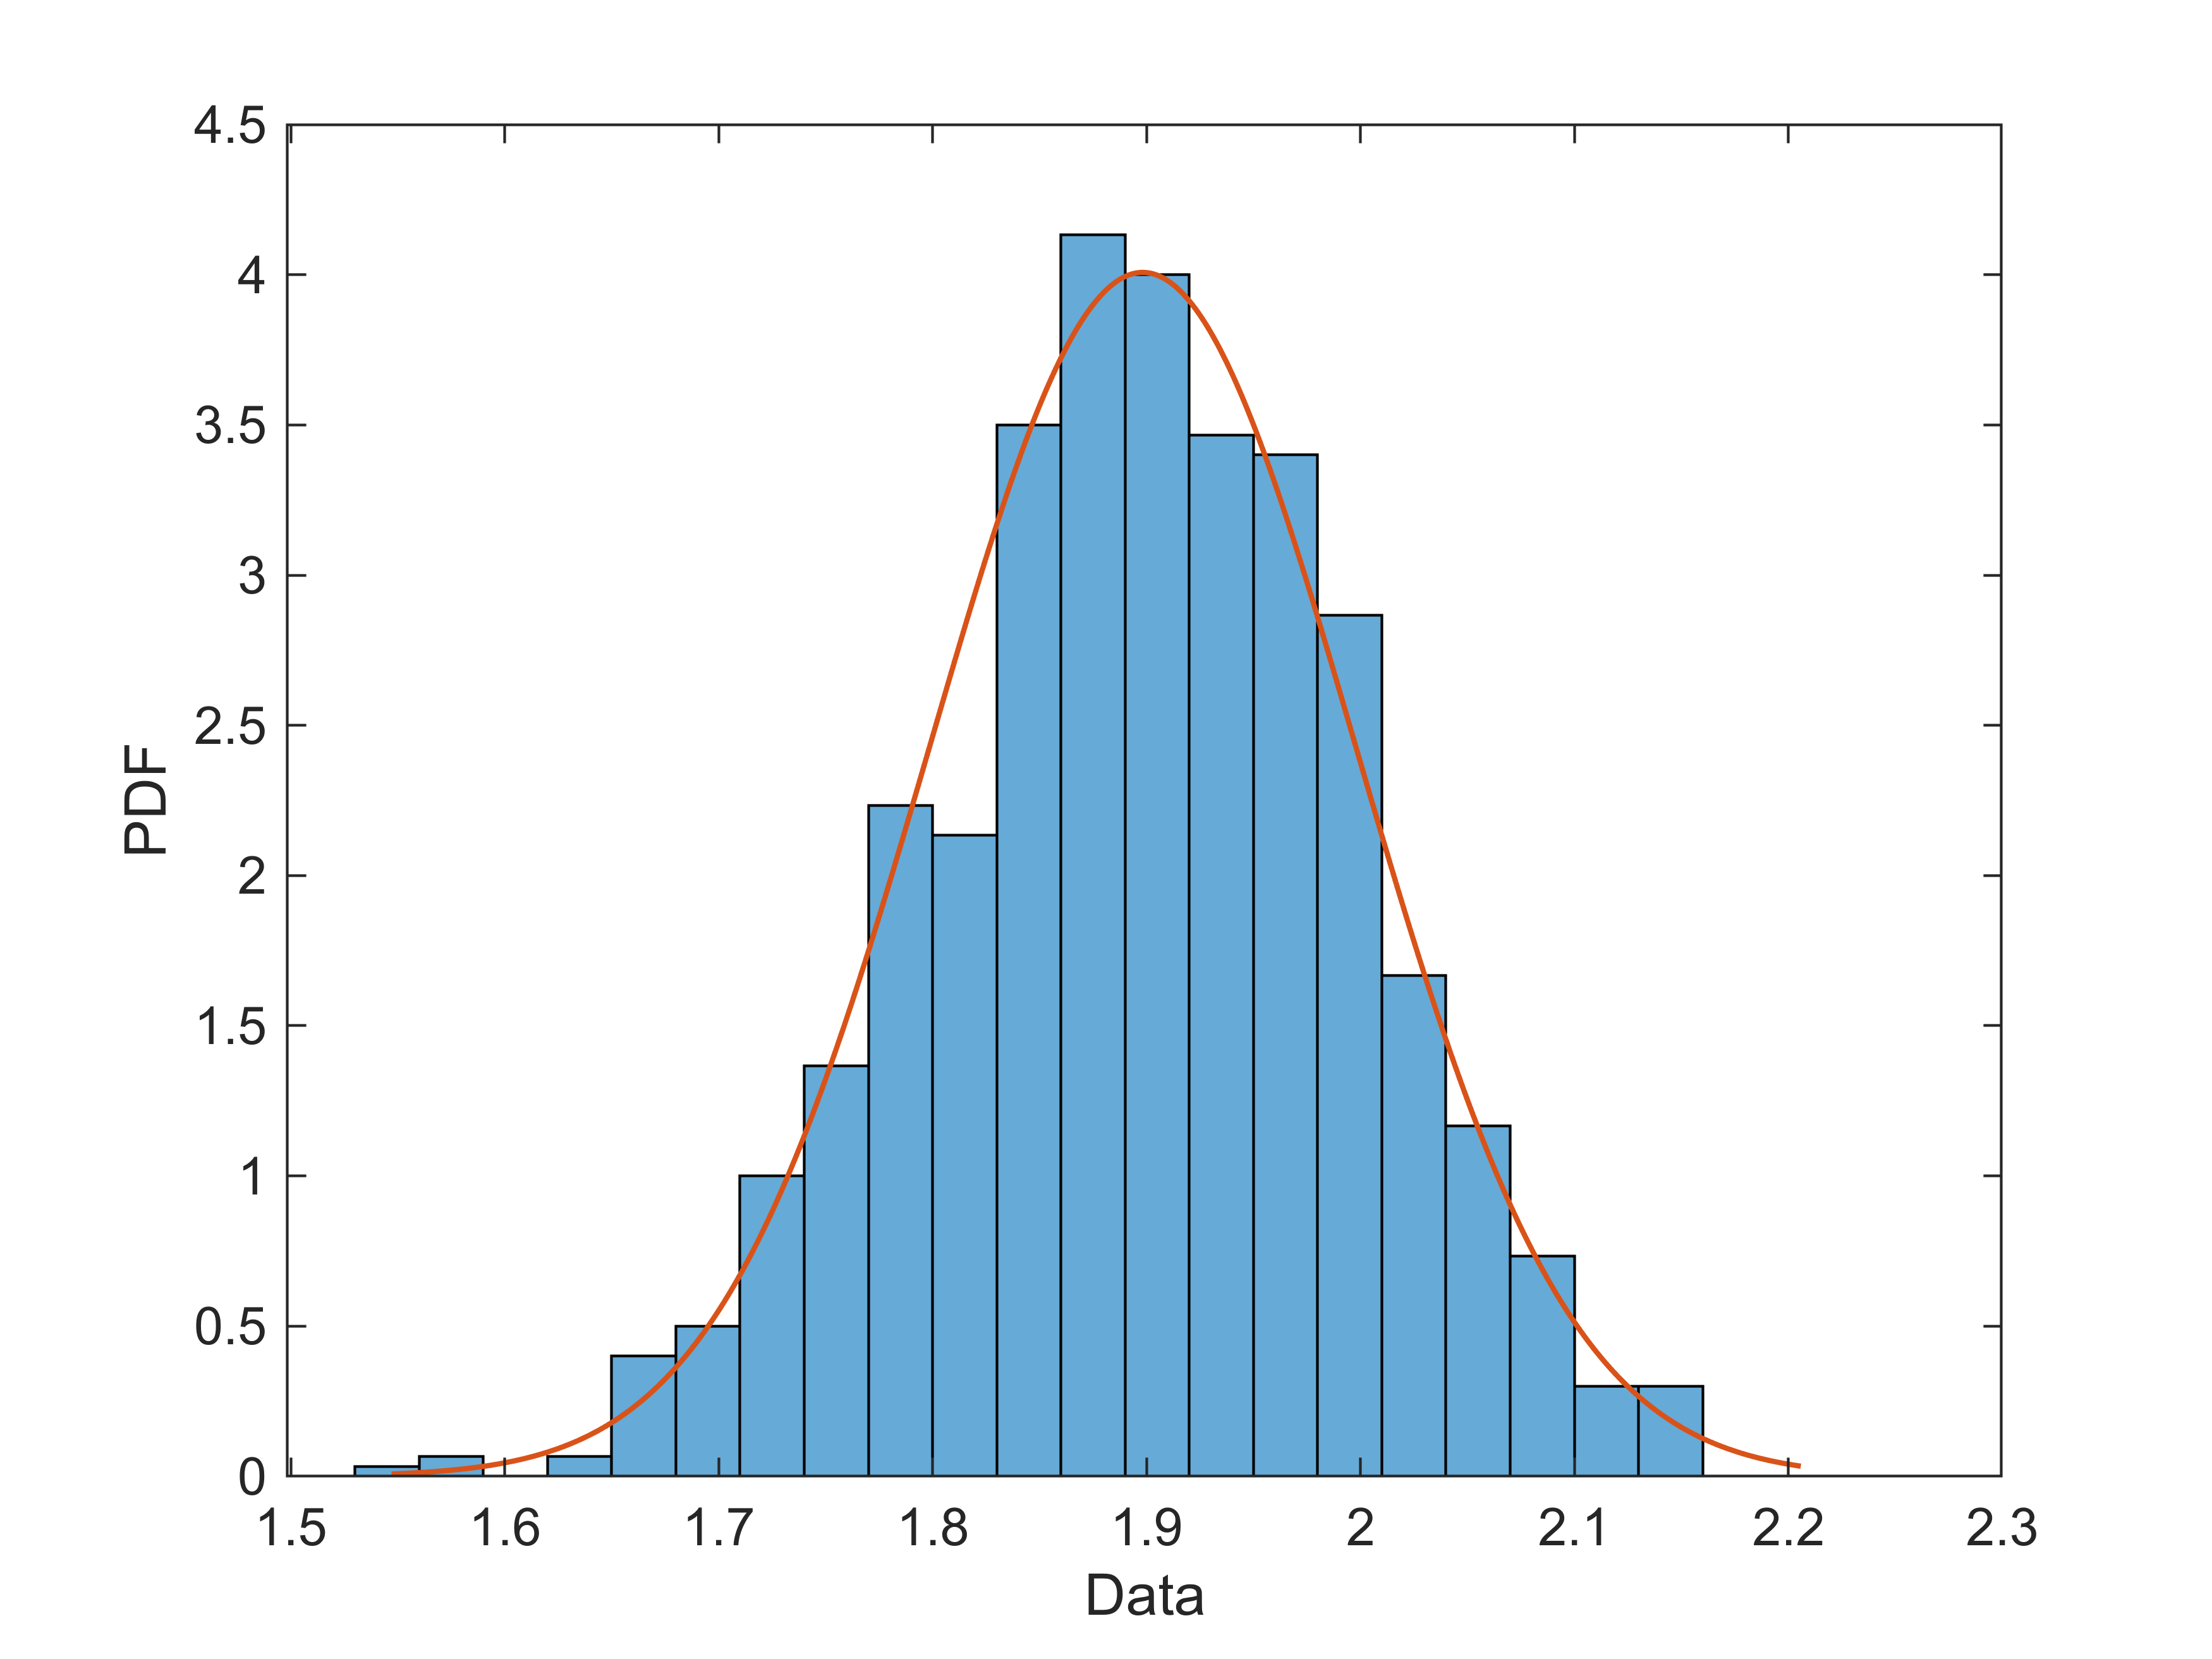

In [43]:
plot(d)

### Проблема мультиколлинеарности и перебоучения, уменьшение размерности при помощи метода анализа главных компонент

Для примера рассмотрим последовательность работы PCA + линейная регрессия


Общая стратегия применения метода анализа главных компонент

-  Разбиваем исходные данные на обучающую выборку и выборку для тестирования обученной модели
-  Проводим анализ "лишних" данных и выкидываем их при помощи метода анализа главных компонент
-  Обучаем регрессионную модель на обучающей выборке
-  Преобразуем данные для тестирования в базис ортогональной системы координат главных компонент
-  Рассчитываем прогноз при помощи обученной модели
#### Пример линейной регрессии с методом анализа главных компонент (LinReg + PCA)

Первый этап \- загрузка и обработка данных.


В настоящее время для работы с данными большого объема большое распространение получил HDF5 (**Hierarchical Data Format**). Изначально разрботан для суперкомпьютерных вычислений, в настоящее время поддерживается некоммерческой организацией HDF Group.


Это бинарный формат , который позволяет хранить данные в структурированном виде. Можно сказать, что это одна из попыток стандартизировать работу с большими данными в различных системах научных расчетов (matlab,julia,python,R), так и в языках общего назначения.


Содержит иерархию из двух основных типов объектов:

-  Datasets — наборы данных, многомерные массивы объектов одного типа
-  Groups — группы, являются контейнерами для наборов данных и других групп (по сути это папки)

Содержимое файлов HDF5 организовано подобно  файловой системе, для доступа к данным применяются пути, сходные с POSIX\-синтаксисом, например, */path/to/resource*. Метаданные хранятся в виде набора именованных атрибутов объектов. Данные могут хранится в сжатом виде.


Внутрениий формат данных матлаба \- mat\-файлы, начиная с версии 7.3 основаны на формате HDF5.


Воспользуемся встроенной в лискрипт утилитой для загрузки файла. В качестве примера будем пользоваться некоторыми метеорологическими данными из открытого источника ([Bottle Database – CalCOFI](https://calcofi.org/data/oceanographic-data/bottle-database/)). Они были загружены в формате csv и потом пересохранены в формат hdf5.


In [44]:
play_with_hdf5 = false; % эту галочку надо установить, если хочется поиграться с "сырыми" данныим
% по умолчанию загружаются уже "просеянные" данные, сохраненные в мат-файле
if play_with_hdf5

In [45]:
% Create a structure to store imported HDF5 data
data = struct();

filename2 = "E:\projects\datasets\bases\bottle\bottle.h5";

data.Datasets(1).Name = "Btl_Cnt";
data.Datasets(1).Value = h5read(filename2, "/Btl_Cnt");

data.Datasets(2).Name = "Depthm";
data.Datasets(2).Value = h5read(filename2, "/Depthm");

data.Datasets(3).Name = "NO2uM";
data.Datasets(3).Value = h5read(filename2, "/NO2uM");

data.Datasets(4).Name = "O2ml_L";
data.Datasets(4).Value = h5read(filename2, "/O2ml_L");

data.Datasets(5).Name = "R_Depth";
data.Datasets(5).Value = h5read(filename2, "/R_Depth");

data.Datasets(6).Name = "R_PHAEO";
data.Datasets(6).Value = h5read(filename2, "/R_PHAEO");

data.Datasets(7).Name = "R_SALINITY";
data.Datasets(7).Value = h5read(filename2, "/R_SALINITY");

data.Datasets(8).Name = "STheta";
data.Datasets(8).Value = h5read(filename2, "/STheta");

data.Datasets(9).Name = "Salnty";
data.Datasets(9).Value = h5read(filename2, "/Salnty");

data.Datasets(10).Name = "T_degC";
data.Datasets(10).Value = h5read(filename2, "/T_degC");

clear filename2

% Display results
data


Формируем таблицу данных


In [46]:
all_data = data.Datasets
all_data_names = arrayfun(@(x)x.Name,all_data);
all_data_cell= arrayfun(@(x)(x.Value),all_data,"UniformOutput",false);
all_data_mat = cat(2,all_data_cell{:});
flag = any(isnan(all_data_mat),2)|any(all_data_mat==-1,2);% находим строки таблицы, содержащие NaN'ы
data_mat = all_data_mat(~flag,:);% удаляем эти строки
else
    data = load(fullfile(get_folder(),"bottle.mat"));
    data_mat = data.data_mat;
    all_data_names = data.all_data_names;
end
data_table = array2table(data_mat,VariableNames=all_data_names)


Можно посмотреть на данные в файле



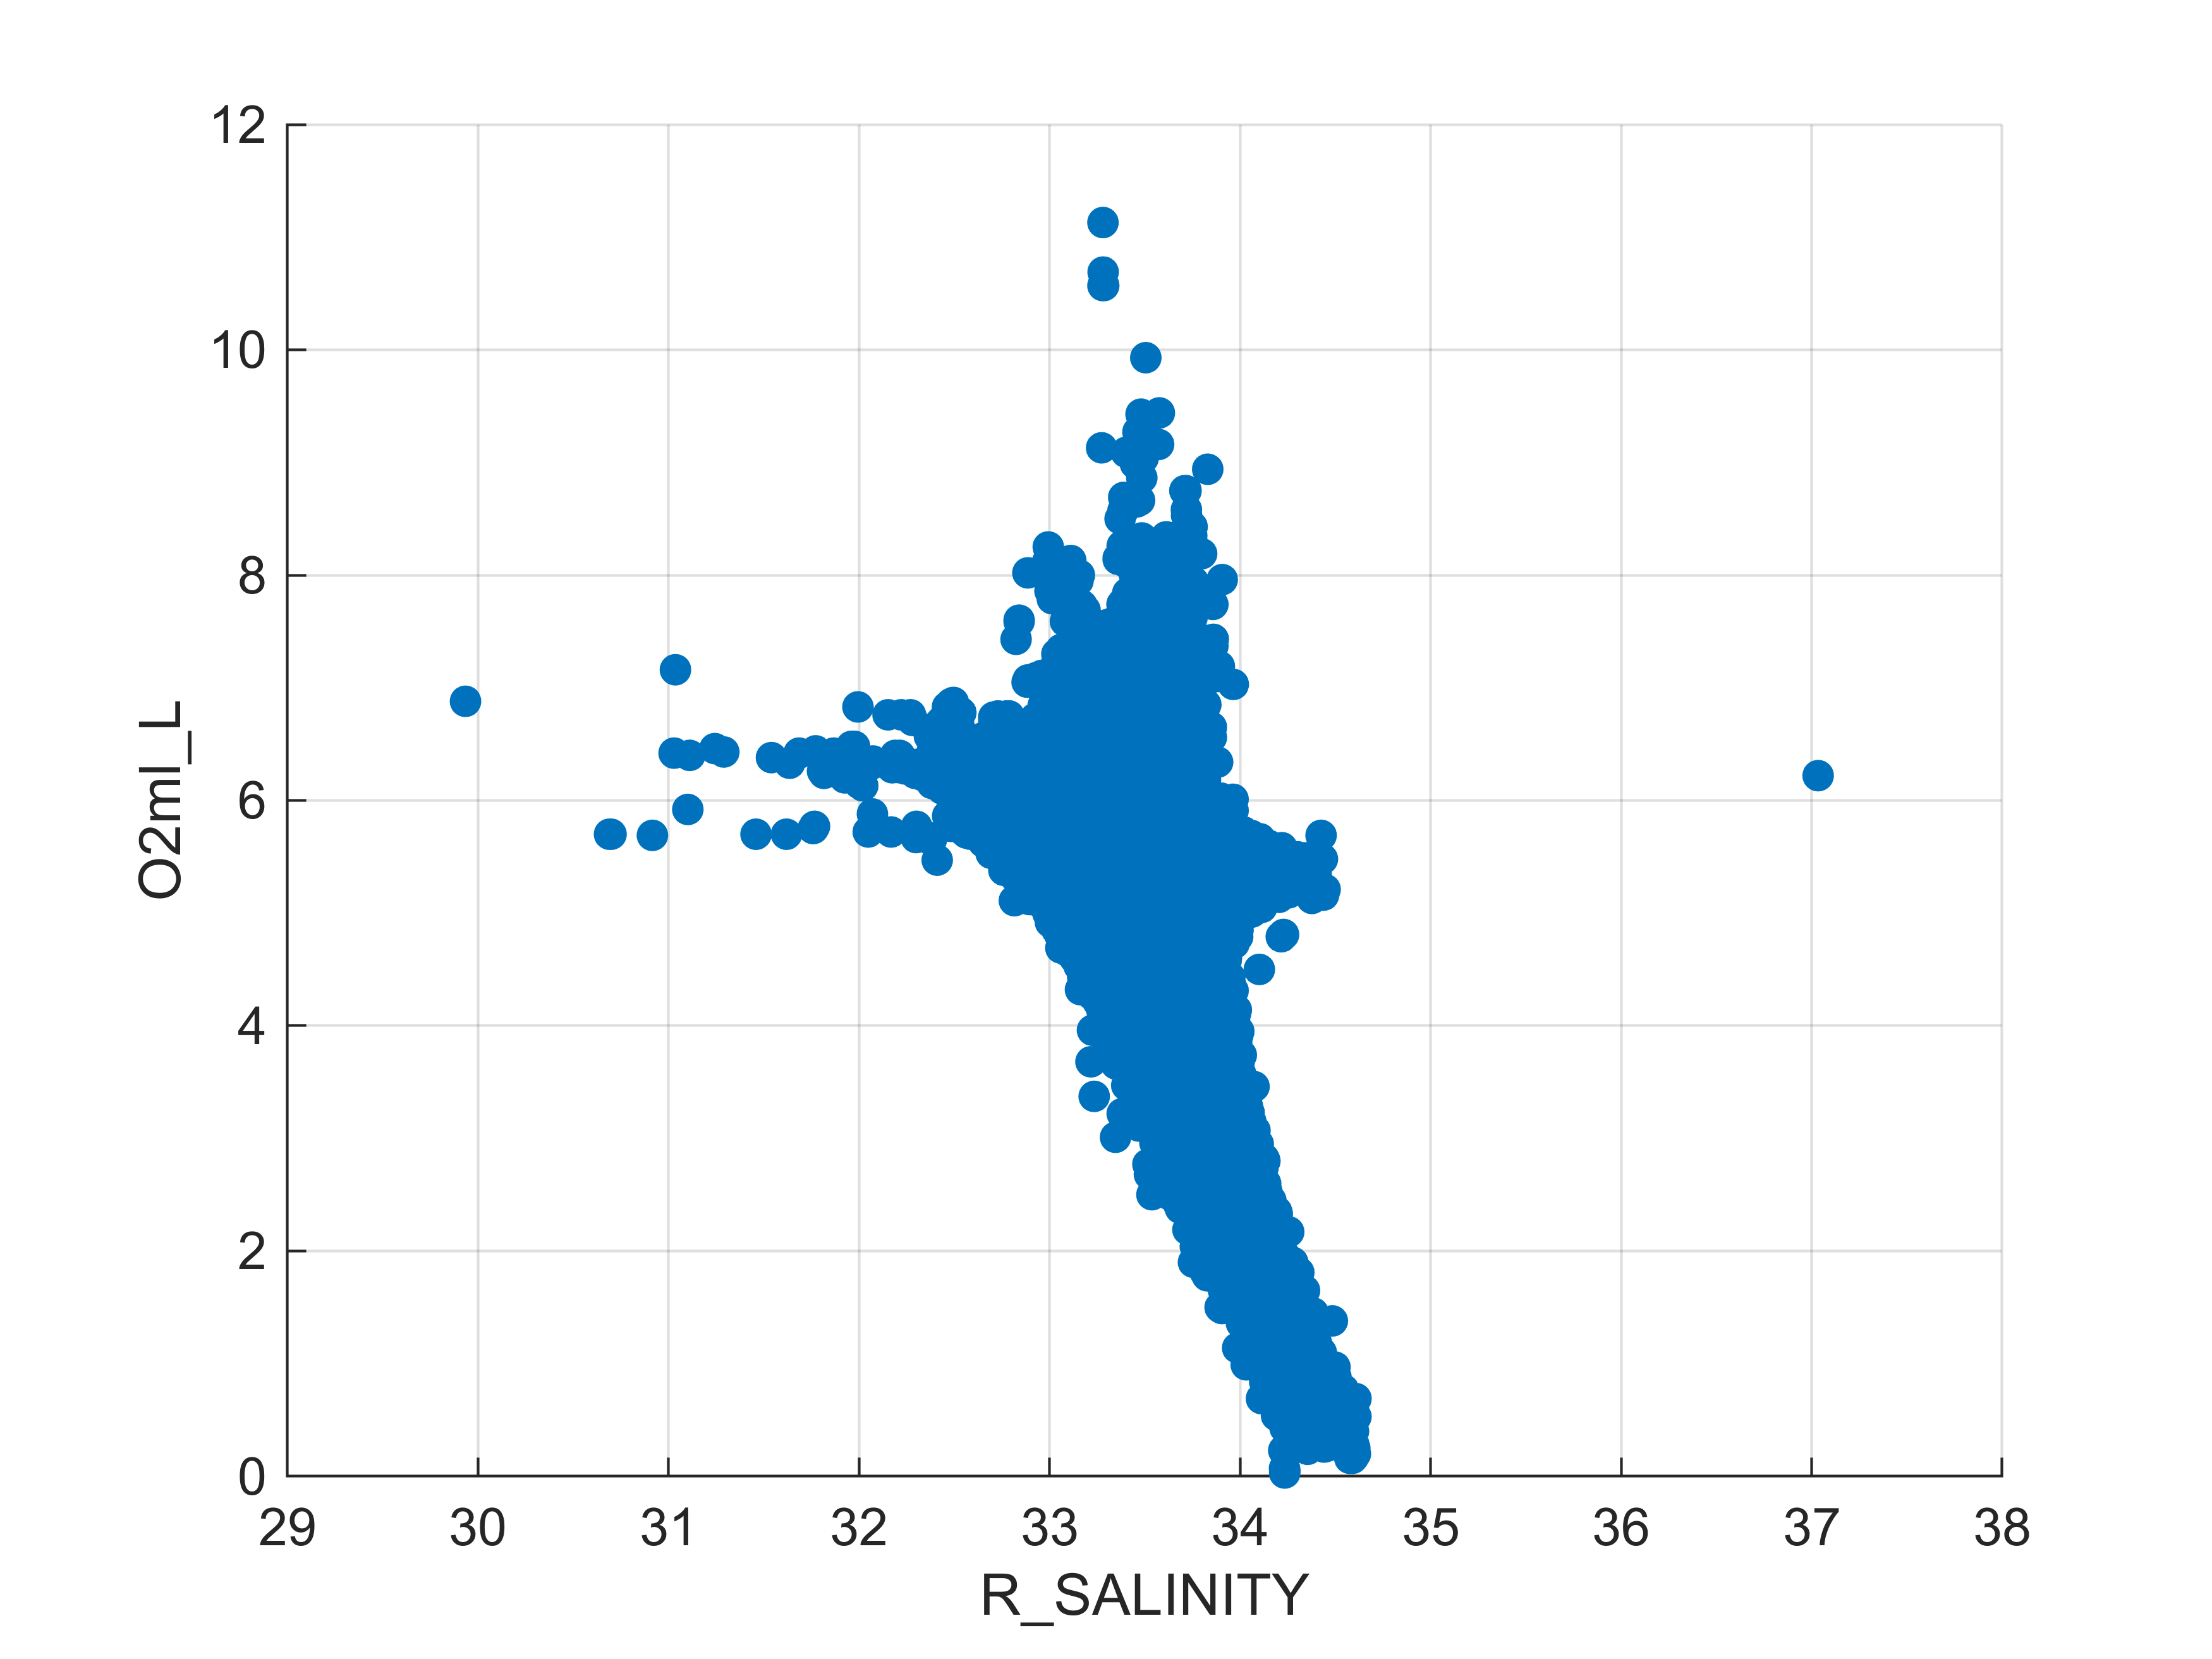

In [47]:
x_var_index = 7;
y_var_index = 4;
ax = get_next_ax();
scatter(ax,data_table,x_var_index,y_var_index,"filled","AlphaData",0.5)
grid(ax,"on")


Формирование обучающей выборки и выборки для тестирования модели


In [48]:
dependent_variable = all_data_names(10) % выбираем зависимую переменную, которую будем предсказывать

dependent_variable = "T_degC"

In [49]:
train_data_fraction=0.78;% доля исходных данных, которые идут на обучение
row_number = size(data_mat,1);
train_indices = 1:floor(row_number*train_data_fraction);% индексы тех строк, которые идут на обучение
test_indices = train_indices(end):row_number;% строки текстовой выборки
Y = data_table.(dependent_variable); % массив всех данных для выбранной переменной
flag = all_data_names~=dependent_variable;flag(1)=false;
X = table2array(data_table(:,flag)); % в предикторы идут все столбцы кроме столбца зависимой переменной и первого столбца (с индексами)
% формируем матриы выборок
YTrain = Y(train_indices);YTest = Y(test_indices);
XTrain = X(train_indices,:);XTest = X(test_indices,:);


Главные компоненты для матрицы предикторов обучающей выборки находим SVD разложением:

<a name="M_4D87815A"></a>

$$X_{train} =U\Sigma V^T =\Sigma_{i=1}^r \sigma_i \vec{u_i } {\vec{v_i } }^T$$

Напомню, что марица U \- это ортонормированный базис пространства  столбцов, а $V$ \- ортонормированный базис пространства строк. Значения $\sigma_i$ \- это сингулярные значения, отсортированные в порядке убывания, $r$ \- ранг матрицы. Последняя форма записи сингулярного разложения \- представляет исходную матрицу в виде суммы одноранговых матриц отсортированных в порядке их "вклада" в общую матрицу.


In [50]:
mu_svd = mean(XTrain) % средние значения по каждому из столбцов

mu_svd = 1x8    
   72.5192    0.0541    4.8447   72.5192    0.1878   33.5034   25.1933   33.5034

In [51]:
[U,S,V] = svd(XTrain -mu_svd,'econ'); % X = U*S*V'


Когда функция svd вызывается с признаком <samp>econ</samp> это означает, что она возвращает матрицы уменьшенной размерности, если $X_{train}$ \- матрица размером mxn, то для m > n рассчитываются только первые n столбцов матрицы $U$ , а  S  \- это матрица nxn. Таким образом из матрицы сингулярных векторов выкидываются все нулевые сингулярные вектора и она становится диагональной.


In [52]:
US = U*S; % дальше эти матрицы будут нужны в виде произведения (отдельные матрицы не нужны)
100*diag(S.^2)/sum(diag(S.^2)) % отношение квадратов сингулярных значений показывает долю вариации

ans = 8x1    
   99.9832
    0.0126
    0.0023
    0.0010
    0.0008
    0.0001
    0.0000
    0.0000

In [53]:
% исходных данных, окторую объясняет каждая из компонент
norm((XTrain-mu_svd) - US*V') % убеждаемся, что формула сингулярного разложения работает

ans = 1.5524e-11


Операция умножения исходной матрицы на левые сингулярные вектора приводит ее к нормированному базису:


$$X_{train} V=U\Sigma$$

Матрица, которая стоит в равенстве справа \- это ортогональная матрица (так как $(U\Sigma )^T U\Sigma =\Sigma^T UU^T \Sigma =\Sigma^2$ \- диагональная), но не ортонормированная, то есть, столбцы этой матрицы ортогональны, но их модули не равны единице. Далее в соответствии с методом анализа главных компонент и теоремой Экхарта\-Янга, мы уменьшаем размерность задачи, то есть, оставляем от исходной матрицы предикторов только матрицу ранга $r^{\prime } <r$ . То есть, в сумме, стоящей вы [выражении](#M_4D87815A) для сингулярного разложения справа, оставляем только первые $r^{\prime }$ членов:


In [54]:
dimentionality = 5; % количество сингулярных значений (оно же размерность матрицы после
% того как мы выкинем часть базисных векторов)
US_reduced = US(:,1:dimentionality);% уменьшаем размерность U*S
I = ones(size(US,1),1);


Решаем задачу регрессии \- находим параметры модели (для линейной регрессии обучение состоит из одной итерации):


In [55]:
b =  [I,US_reduced]\YTrain

b = 6x1    
   12.9935
   -0.0280
1.1569
    3.5669
    3.5002
   -0.8896


Раскладываем тестовые данные по базису правых сингулярных векторов


In [56]:
US_test = (XTest-mean(XTest))*V(:,1:dimentionality);


Рассчитываем предсказание модели



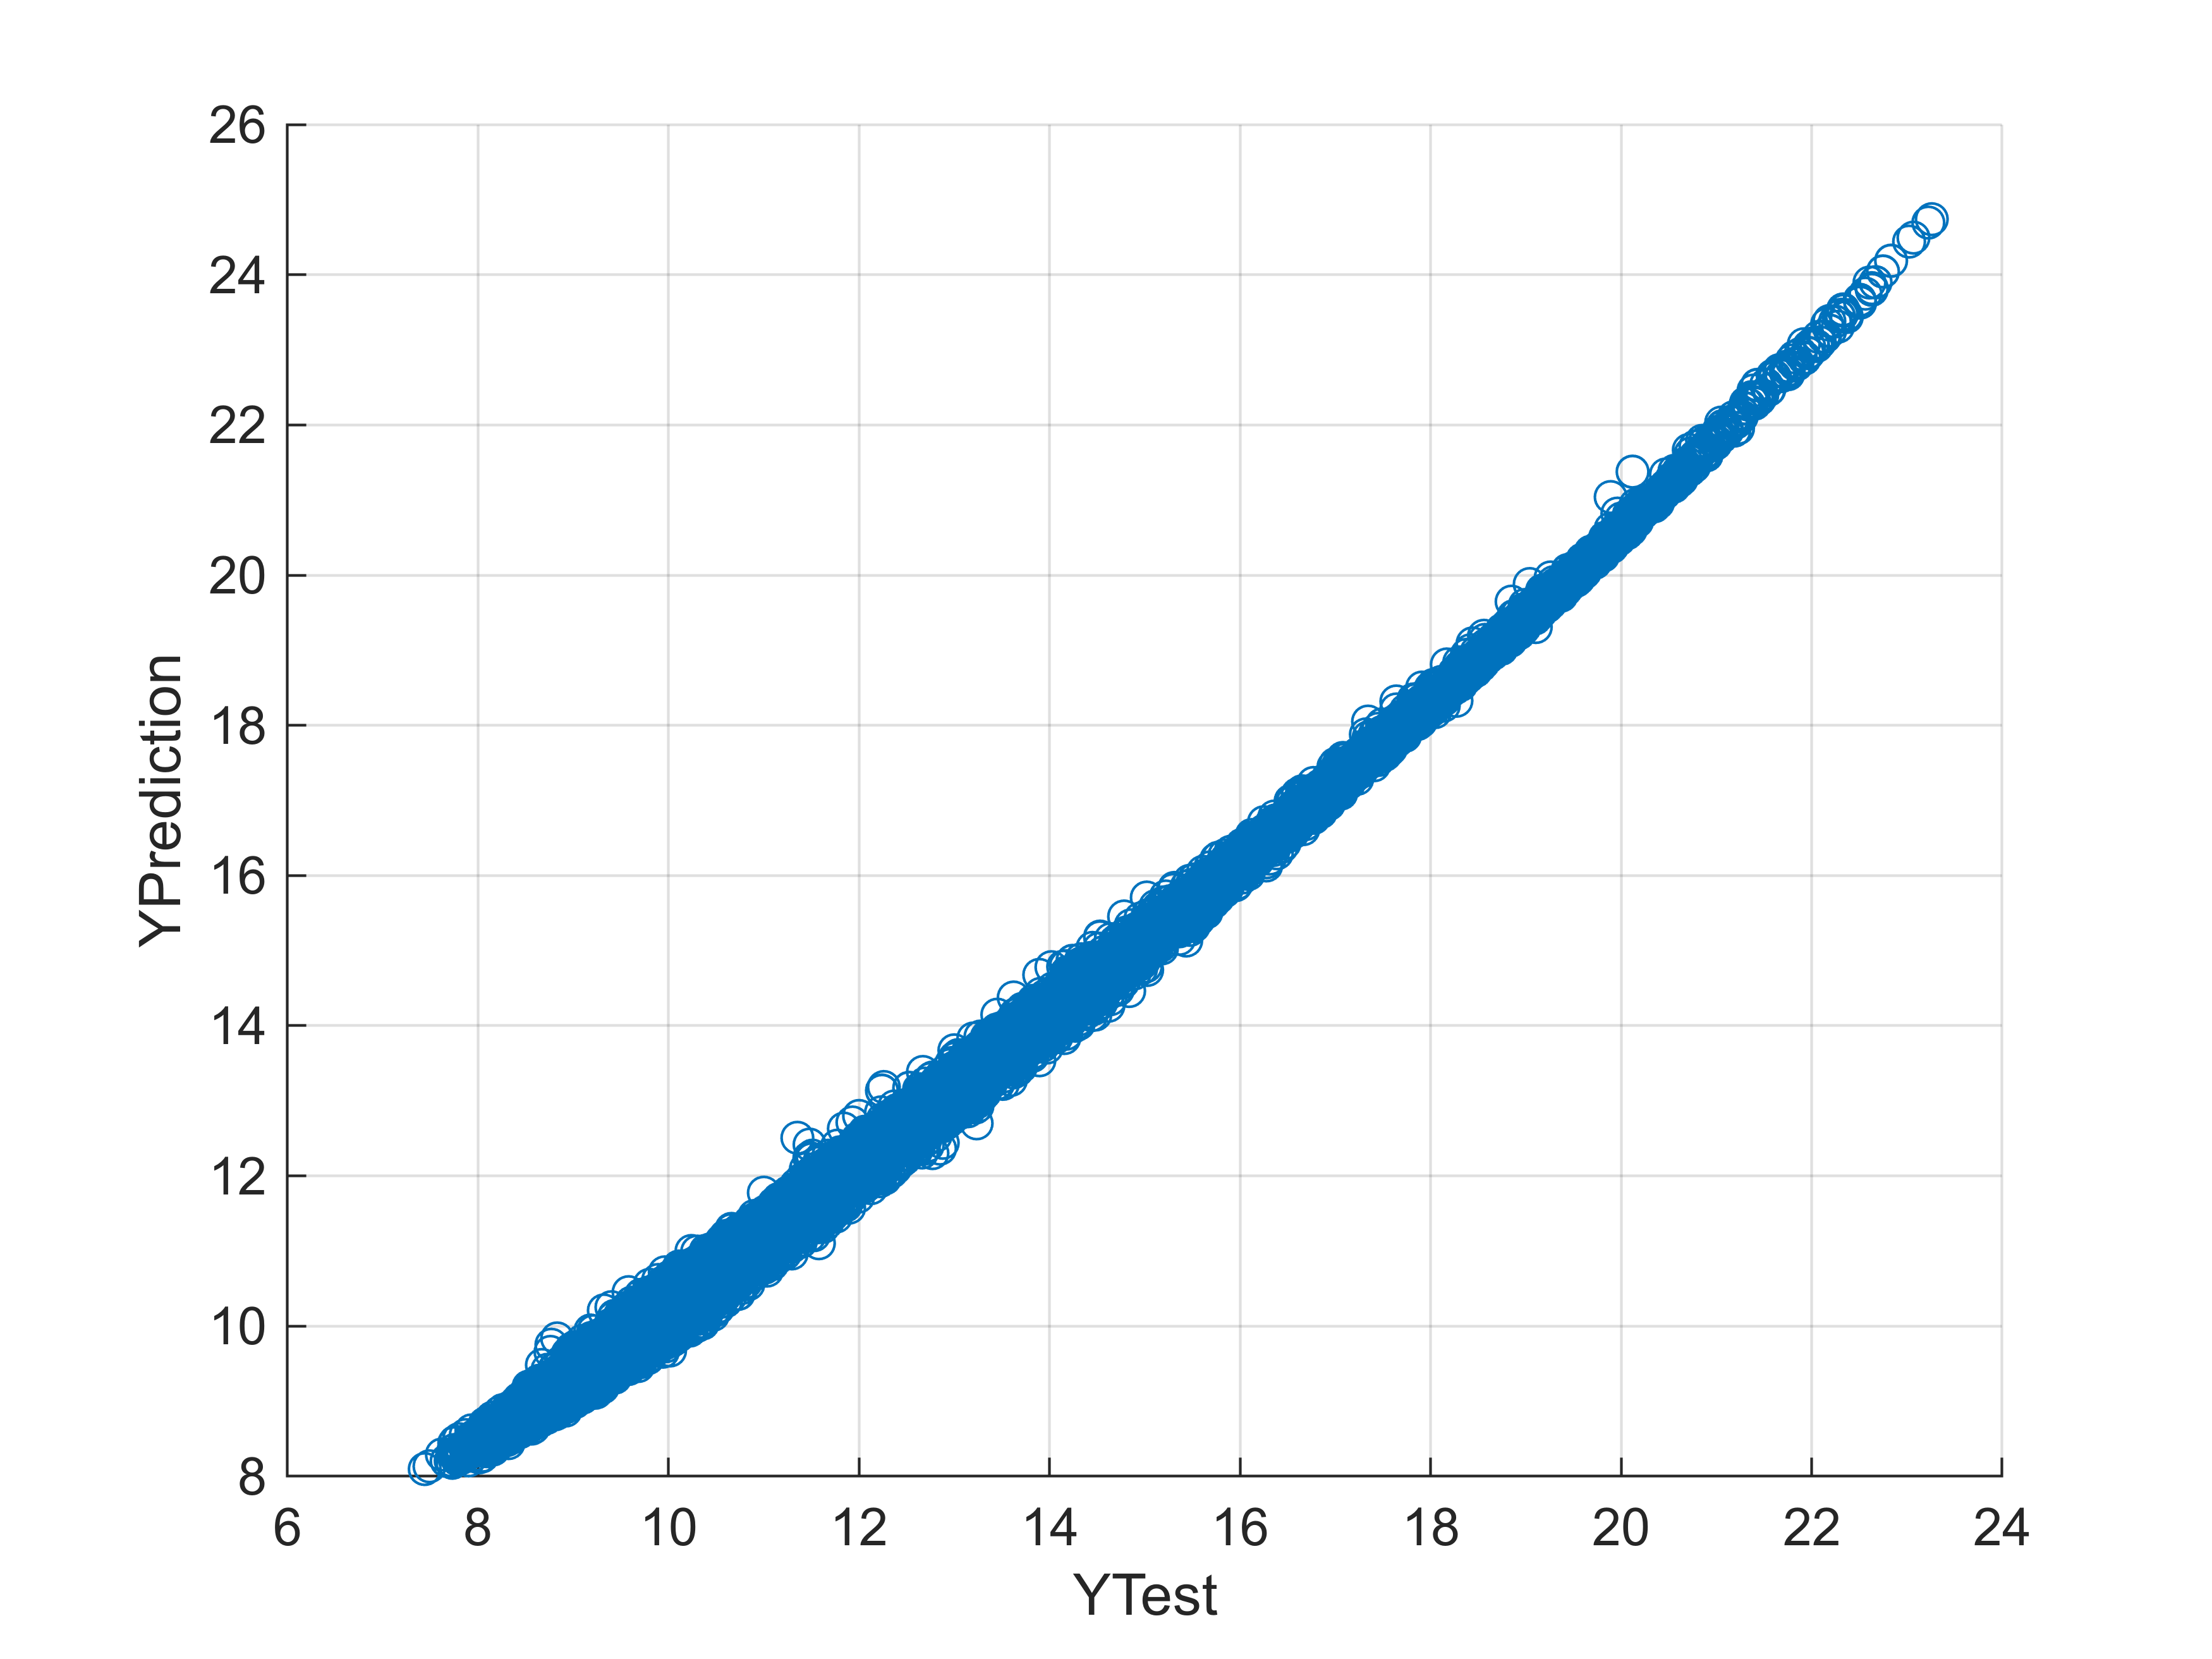

In [57]:
I = ones(size(US_test,1),1);
Yprediction = [I,US_test]*b;
YTest - Yprediction;
ax = get_next_ax();
scatter(ax,YTest,Yprediction)
xlabel("YTest")
ylabel("YPrediction")
grid on


Посчитаем корреляцию предсказания и тестовых данных:


$$Cor(X,Y)=\frac{Cov(X,Y)}{\sigma_A \sigma_B }$$

где $\sigma$ \- стандартное отклонение ( $\sigma_X =\sqrt{Cov(X)}$ ), соотвественно когда мы смотрим матрицу корреляции между


векторами сэмплов двух случаных величин, мы имеем симметричную матрицу, на диагонале которой стоят единицы, а офф\-диагональные элементы дают коэффициенты корреляции, чем ближе коэффициент корреляции двух величин к единице, тем более они коррелированы.


In [58]:
corrcoef(YTest,Yprediction) %

ans = 2x2    
1.0000    0.9989
    0.9989    1.0000


Это был, относительно низкоуровневый подход, мы применяли базовые функции линейной алгебры \- сингулярное разложение и mldivide (которое, как мы обсуждали, работает по методу QR\-факторизации), сейчас попробуем сделать тоже самое, но при помощи более высокоуровневых функций.


Далее будем использовать statistical toolbox, в котором есть большой арсенал функций для машинного обучения, в том числе для регрессионного анализа.


Мы будем пользоваться двумя функциями:


**<samp>pca(Xtrain)</samp>** \- функция для анализа данных методом главных компонент, Xtrain \- это, соотвественно, матрица предикторов для обучающей выборки


**<samp>fitlm(scoreTrain,Ytrain)</samp>** \- эта функция проводит обучение регрессионной модели на  обучащей выборке из матрицы предикторов **<samp>scoreTrain</samp>** и зависимой переменной **<samp>Ytrain</samp>** (это одна из колонок матрицы данных)


In [59]:
[coeff,scoreTrain,latent,tsquared,explained,mu] = pca(XTrain,"Centered",true);% coeff - это матрица V,

Using only the first 7 components to compute TSQUARED.


В качестве входного аргумента фугкции **pca** \- матрица предикторов, опционально можно передавать алгоритм (по умолчанию используется <samp>'svd'</samp> , но может быть использован и алгоритм, основанный на спектральном разложении матрицы ковариации <samp>'eig'</samp>,  а также <samp>'als'</samp>, про последний написано, что он лучше работает с пропущенными значениями (например, <samp>NaN</samp>) ; <samp>'centered'</samp>, <samp>true</samp> \- пара аргументов, которая показывает надо ли центрировать данные (вычитать средние)


Функция **<samp>pca</samp>** возвращает следующие переменные: <samp>coeff,scoreTrain,latent,tsquared,explained,mu</samp>.


<samp>coeff</samp> \- это матрица $V$ сингулярного разложения


Выходной аргумент <samp>scoreTrain</samp> \- это произведение $U\Sigma$ .


<samp>latent</samp> \- это вектор квадратов сингулярных значений (он же вектор собственных значений матрицы ковариации)


<samp>tsquared</samp> \- Hotelling’s T\-squared statistic is a statistical measure of the multivariate distance of each observation from the center of the data set.


<samp>explained</samp>  \- показывает какую долю вариации (выражается в процентах) обясняет данная спектральная компонета. Как показано выше, по сути доля вариации \- это квадрат сингулярного значения номированный на сумму квадратов всех сингулярных значений.


In [60]:
mean(coeff./V)

ans = 1x8    
     1     1    -1     1    -1     1     1    -1

In [61]:
mean(US./scoreTrain)

ans = 1x8    
     1     1    -1     1    -1     1     1    -1

In [62]:
transpose(sort(eig((XTrain-mu)'*(XTrain-mu)),"descend")/size(US,1)) % считаем через собственные значения матрицы ковариации

ans = 1x8    
1.0e+03 *
    6.7423    0.0008    0.0002    0.0001    0.0001    0.0000    0.0000   -0.0000

In [63]:
transpose(diag(S*S)./latent/(size(US,1)))

ans = 1x8    
1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000

In [64]:
transpose(100*(diag(S.*S)./sum(diag(S.*S)))./explained) % показывает в процентах объясняемую данной матрицей долю вариации

ans = 1x8    
1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000


Смотрим какое число сингулярных значений объясняет 95 процентов вариации:


In [65]:
idx = find(cumsum(explained)>99,1)

idx = 1


Обучаем регрессионную модель на тренировочных данных, в которых была уменьшена размерность.


In [66]:
scoreTrain95 = scoreTrain(:,1:idx);
mdl = fitlm(scoreTrain95,YTrain)

mdl = 
Linear regression model:
    y ~ 1 + x1
Estimated Coefficients:
                   Estimate        SE         tStat     pValue
                   _________    _________    _______    ______
    (Intercept)       12.994    0.0049595     2619.9      0   
    x1             -0.028005     6.04e-05    -463.66      0   
Number of observations: 162840, Error degrees of freedom: 162838
Root Mean Squared Error: 2
R-squared: 0.569,  Adjusted R-Squared: 0.569
F-statistic vs. constant model: 2.15e+05, p-value = 0

In [67]:
scoreTest95 = (XTest-mu)*coeff(:,1:idx);


Дальше мы испльзуем обученную модель  <samp>mdl для того, чтобы предсказать значения в текстовой выборке, для этого используется функция predict, в которую в качестве первого аргумента передается обучнная модель, а в качестве второго - новая матрица предикторов:</samp>


In [68]:
YTest_predicted = predict(mdl,scoreTest95);
norm(YTest_predicted - Yprediction)

ans = 409.1237

In [69]:
% расхождение между предсказаниями statistics toolbox и расчету
% при помощи базовых функций линейной алгебры

#### Пример использования метода анализа главных компонент с картинками

Мы любим примеры с картинками, поэтому попробуем, применить линейную регрессию для предсказания куска картинки. Теперь наше регрессионное уравнение будет иметь вид:


$$Y=XB+E$$

Сверху над $Y,B,E$ пропали стрелочки, так как теперь это матрицы


Столбцы матрицы $B$ \- это вектора коэффициентов линейной регрессии, i\-й столбец, соответственно, описывает нам i\-й столбец матрицы Y. Для каждого столбца матрицы отклика мы находим вектор\-столбец параметров линейной регрессии.


Будем рассматривать задачу следующим образом. Разделим картинку на четыре части


левая верхняя \- будет матрица предикторов обучающей выборки (матрица $X$ )


правая верхняя \- матрица откликов (матрица $Y$ )


левая  нижняя часть \- матрица предикторов тестовой выборки ( $X_{test}$ )


правая нижняя часть \- матрица отклика тестовой выборки


Наша задача состоит в том, чтобы не значая правую нижнюю часть картинки ее пресказать при помощи линейной регрессионной модели, которую мы обучем на обучающей выборке (то есть на верхней картинке)


In [70]:
clearvars
% Import image
folder =  get_folder();
selected_image= "test1.jpg"; %
figs_folder =folder + "\figs";
full_file = fullfile(figs_folder,selected_image);
figs = imread(full_file);
M = size(figs,1)-2;N = size(figs,2)-2;


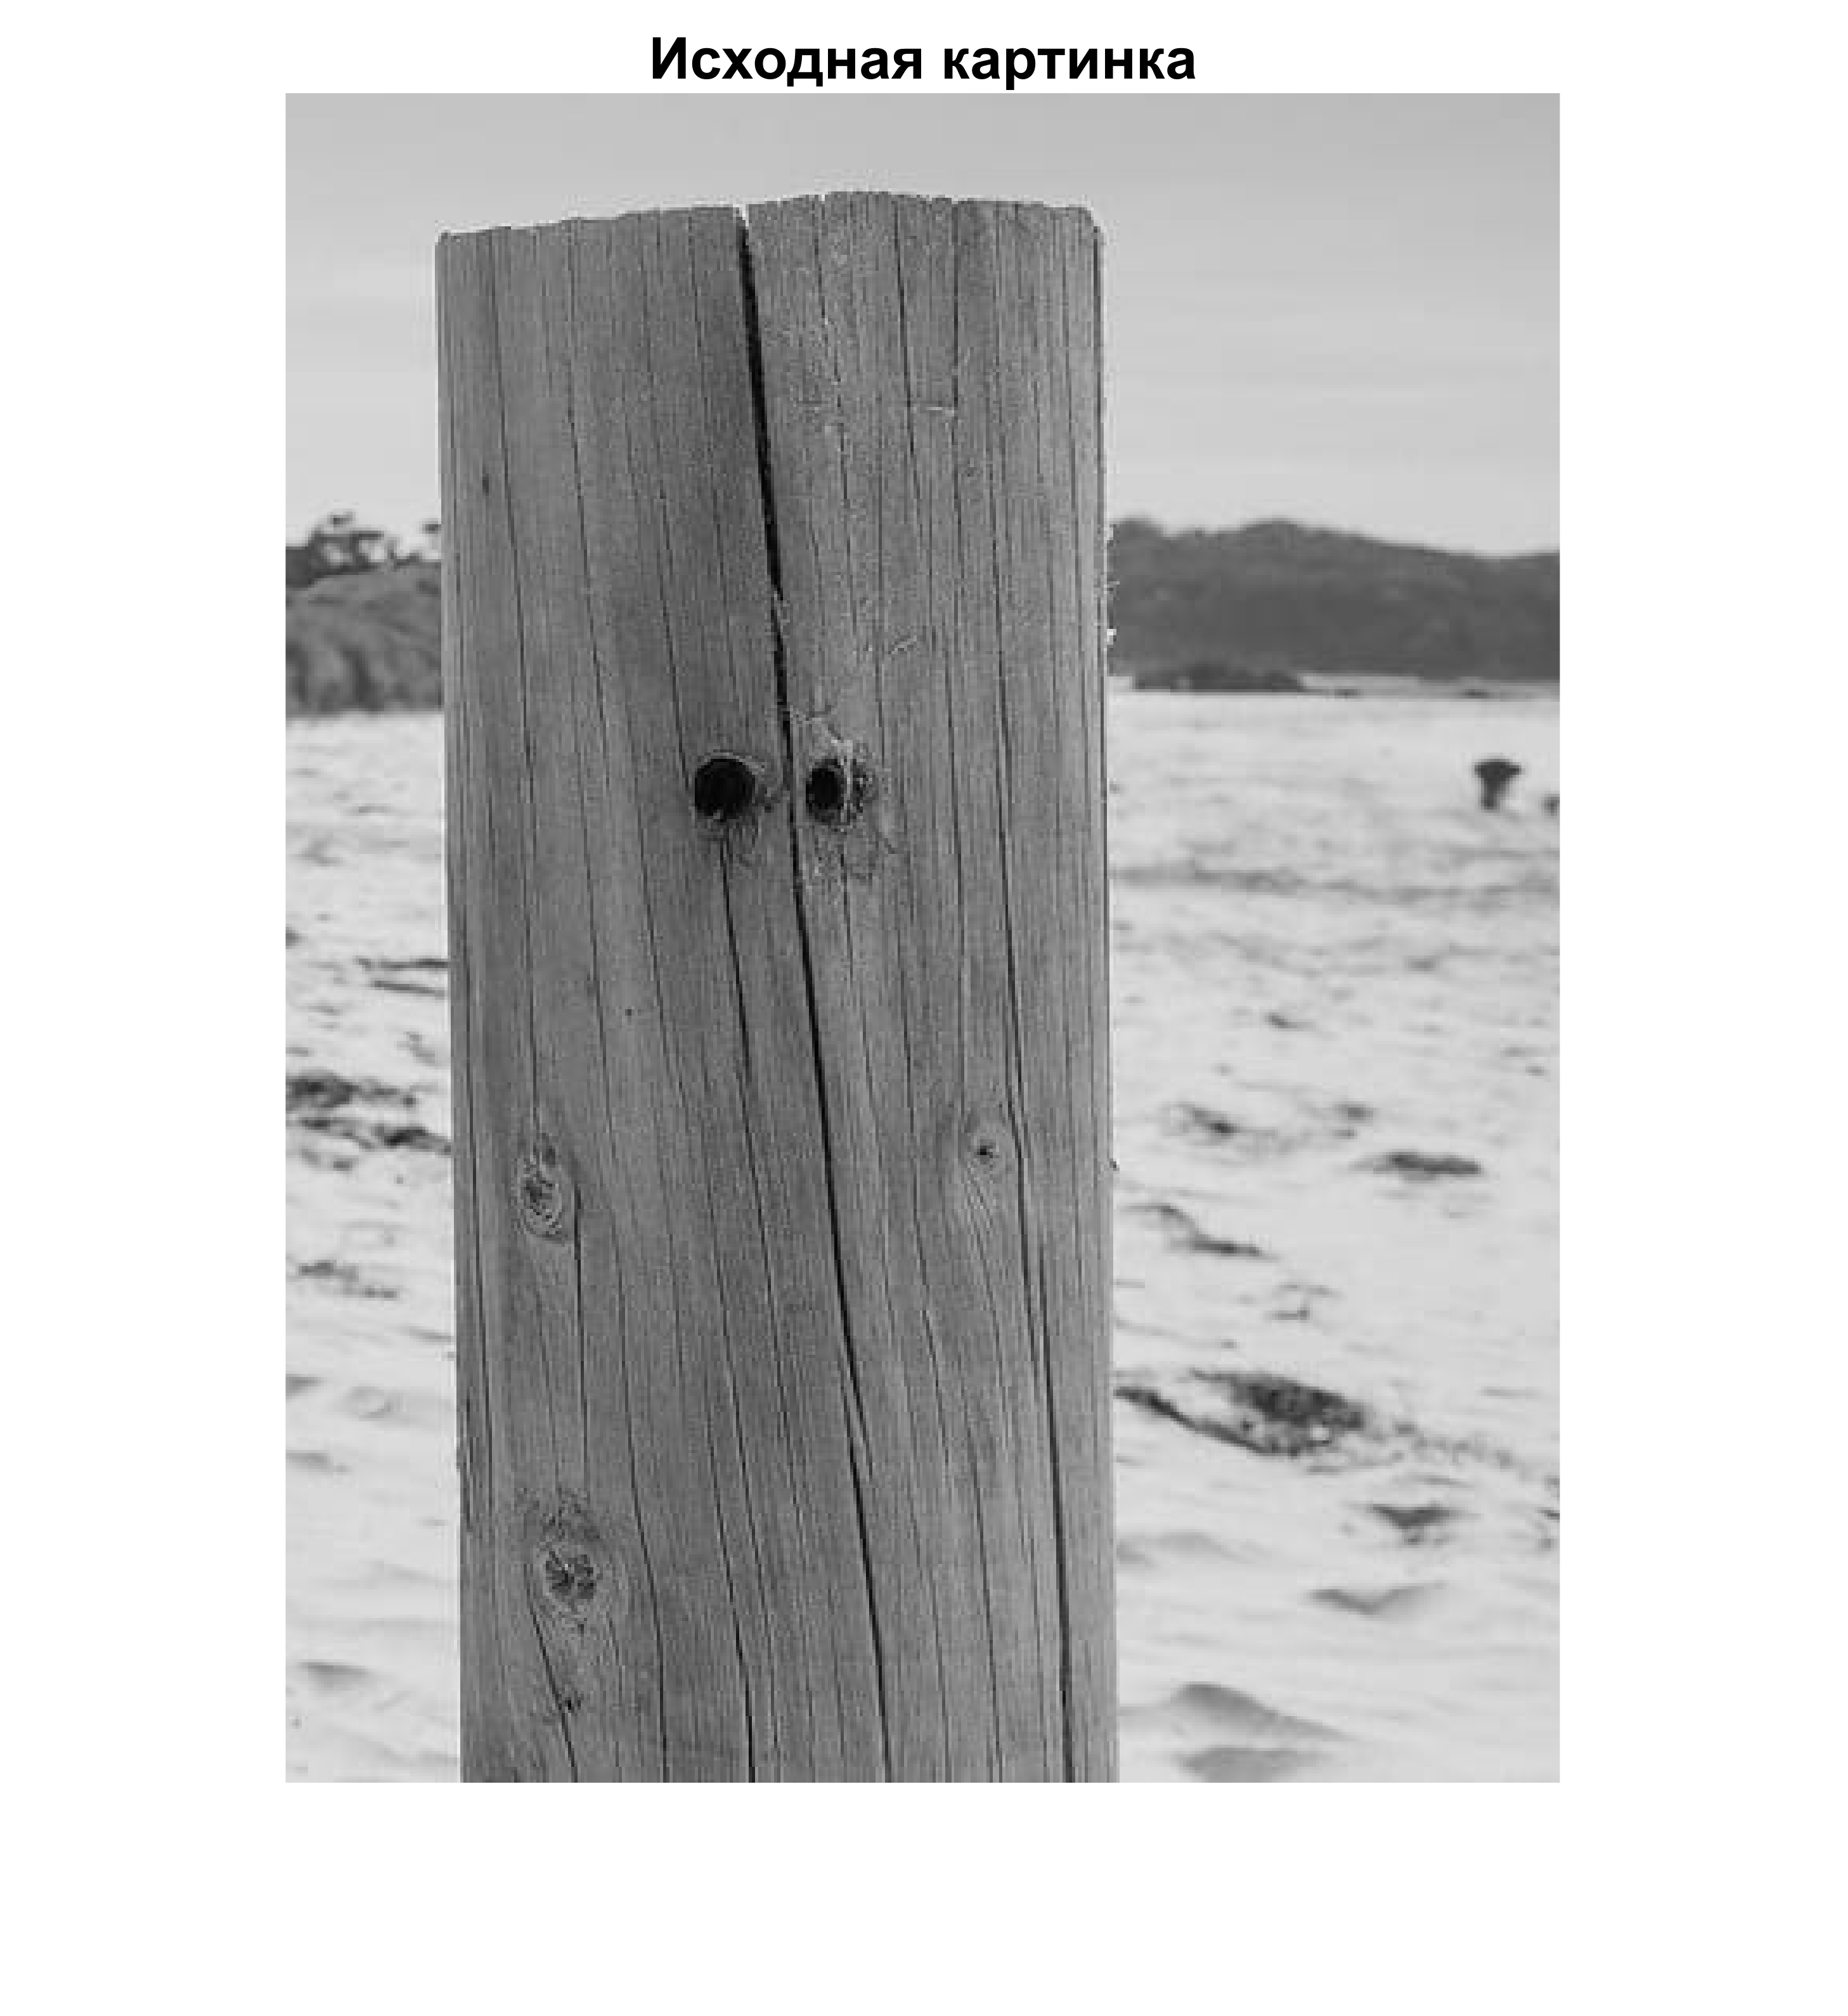

In [71]:
data= double((im2gray(figs)));
cut_size = [1,354,755];
data = data(cut_size(1):end,cut_size(2):cut_size(3));
imshow(uint8(data))
ax =gca;
title(ax,"Исходная картинка")


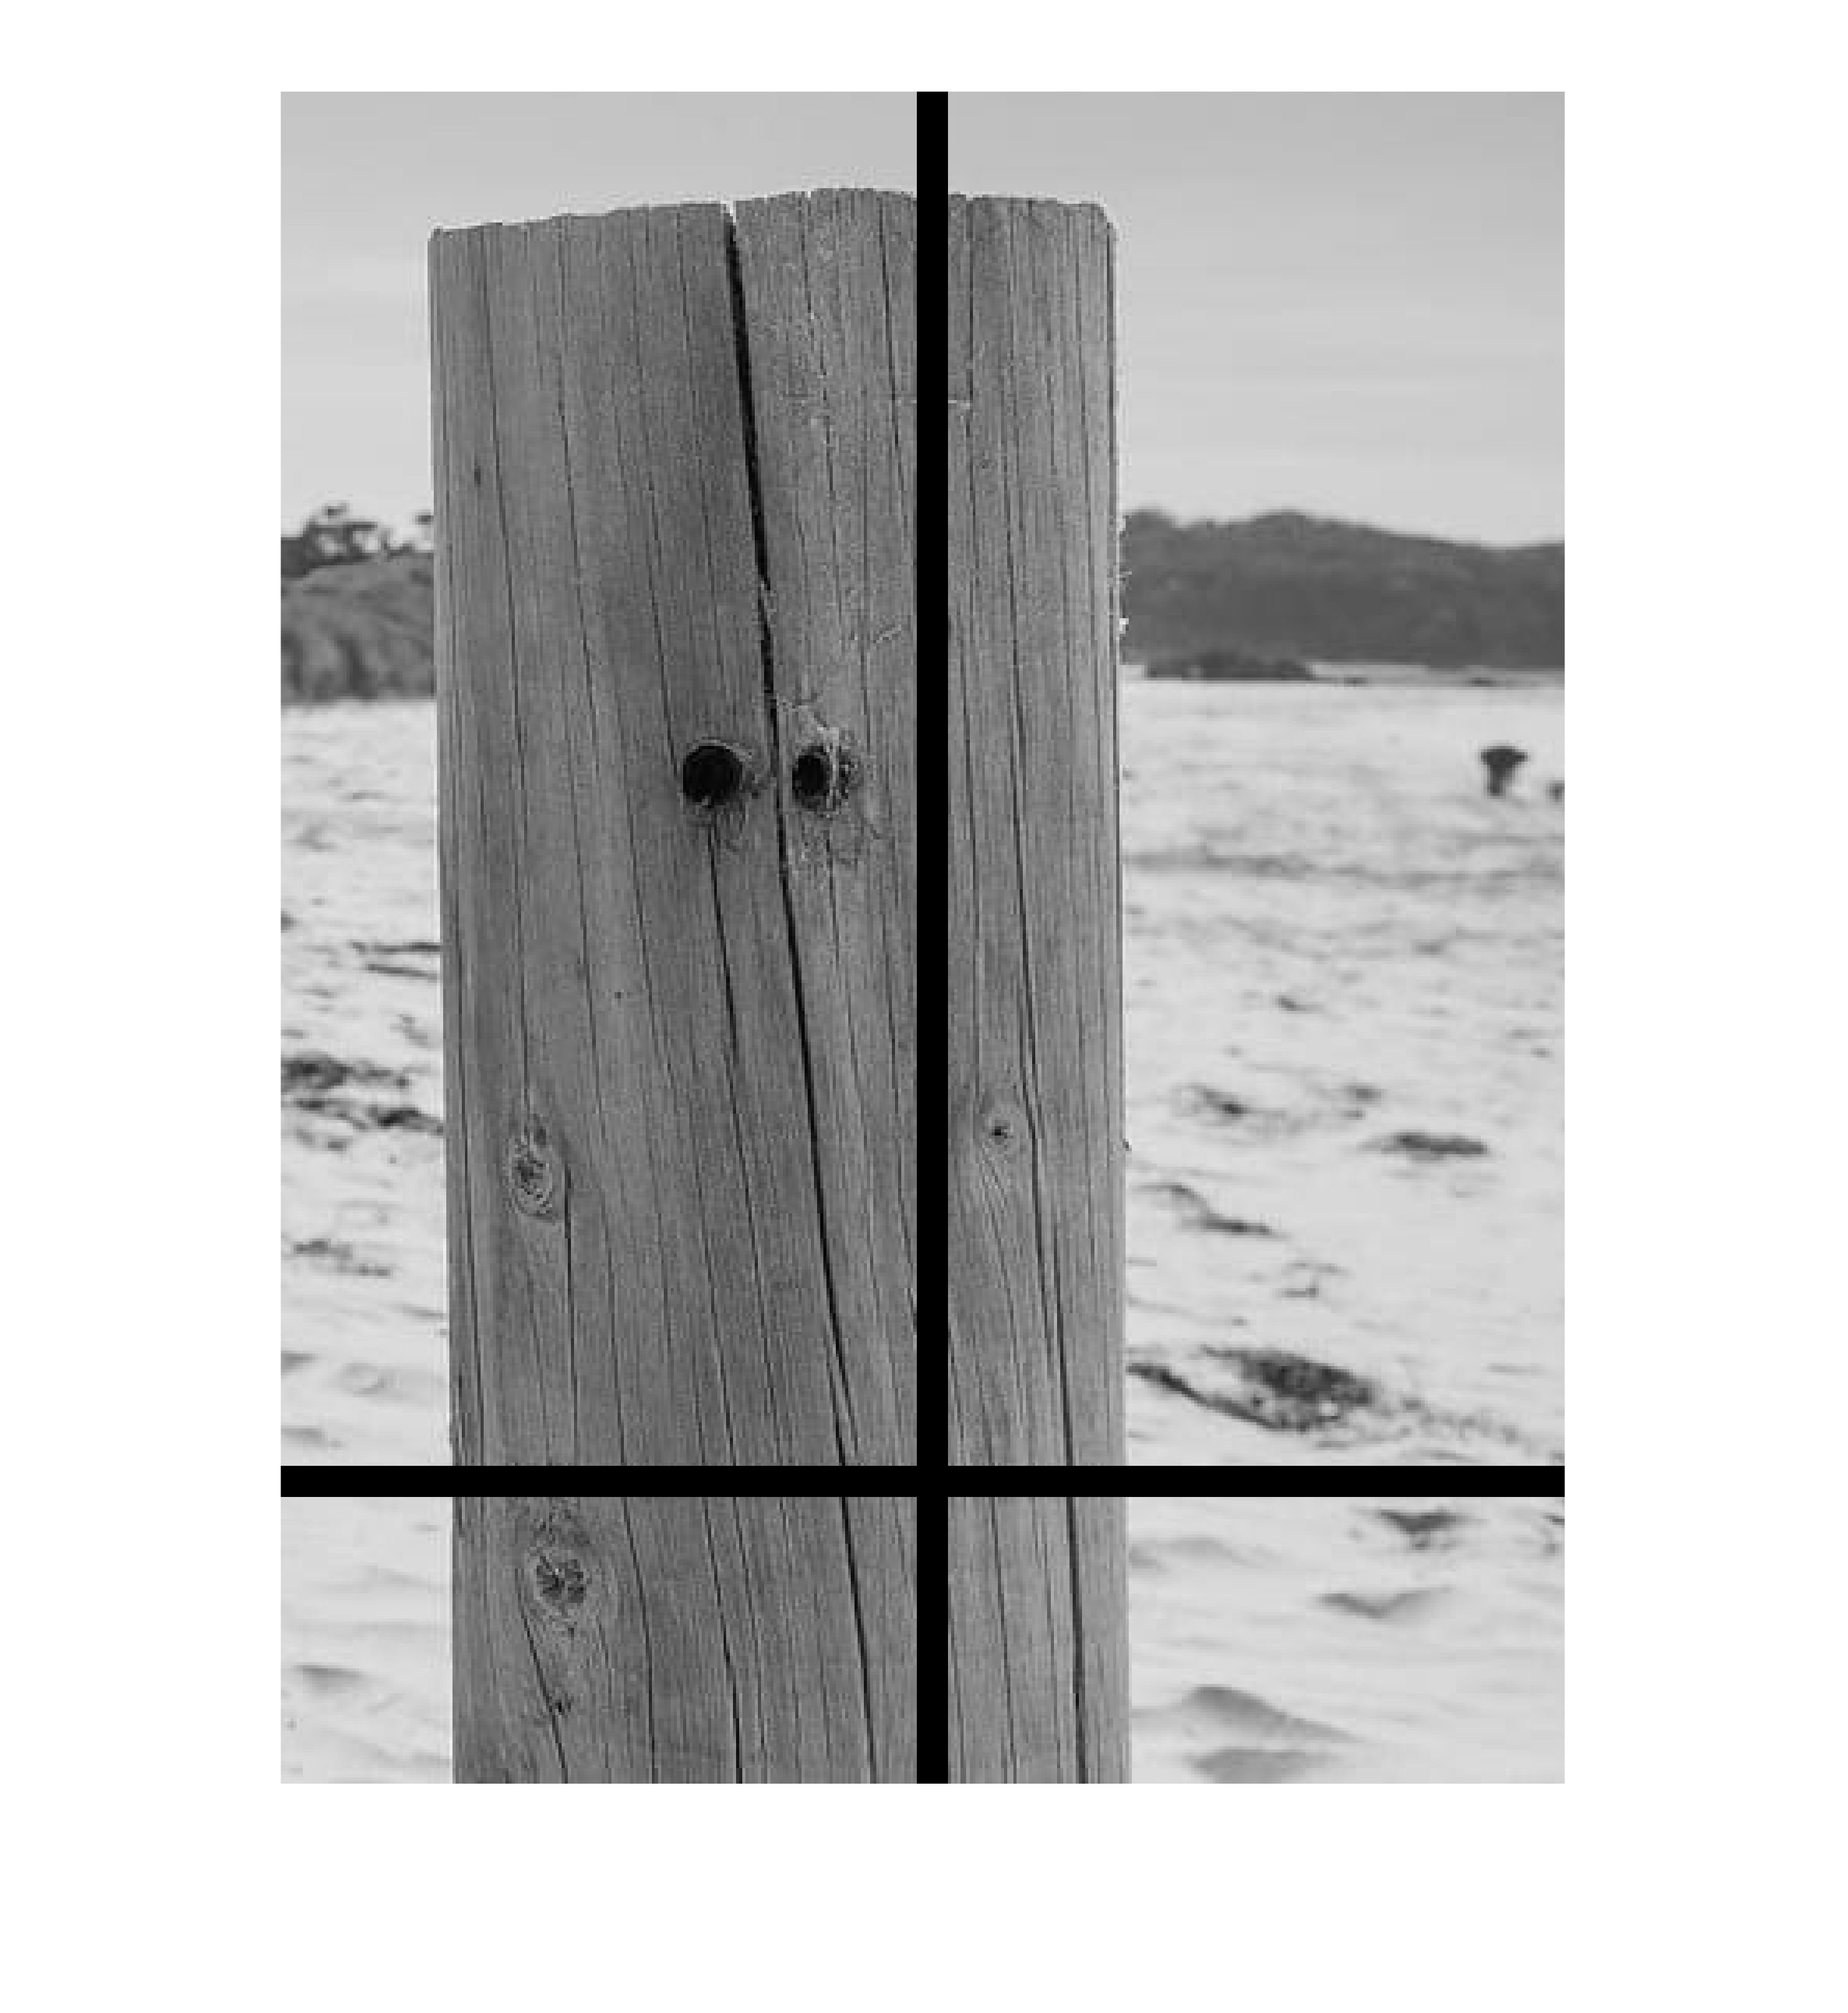

In [72]:
M = size(data,1);
N = size(data,2);
t_dims = [91,197]; % размер тестовой картинки

% test_image_dimentions
Mlast = M-t_dims(1)-1; % число строк в обучающйе выборке
Nlast = N-t_dims(2)-1;% число столбцов предикторов в обучающей выборке
XTrain =data(1:Mlast,1:Nlast); % формируем матрицу предикторов
YTrain =data(1:Mlast,(Nlast+1):end); % формируем матрицу зависимой переменной
XTest = data((Mlast+1):end,1:Nlast);
YTest = data((Mlast+1):end,(Nlast+1):end);

imshow(uint8(join_matrix(XTrain,YTrain,XTest,YTest,10,0)))

In [73]:
Itrain = ones(size(XTrain,1),1);
B1 = [Itrain,XTrain]\YTrain;
Ipred = ones(size(XTest,1),1);
Ypredicted1 =[Ipred, XTest]*B1;
disp("Линейная регрессия без уменьшения размерности матрицы предикторов:")

Линейная регрессия без уменьшения размерности матрицы предикторов:


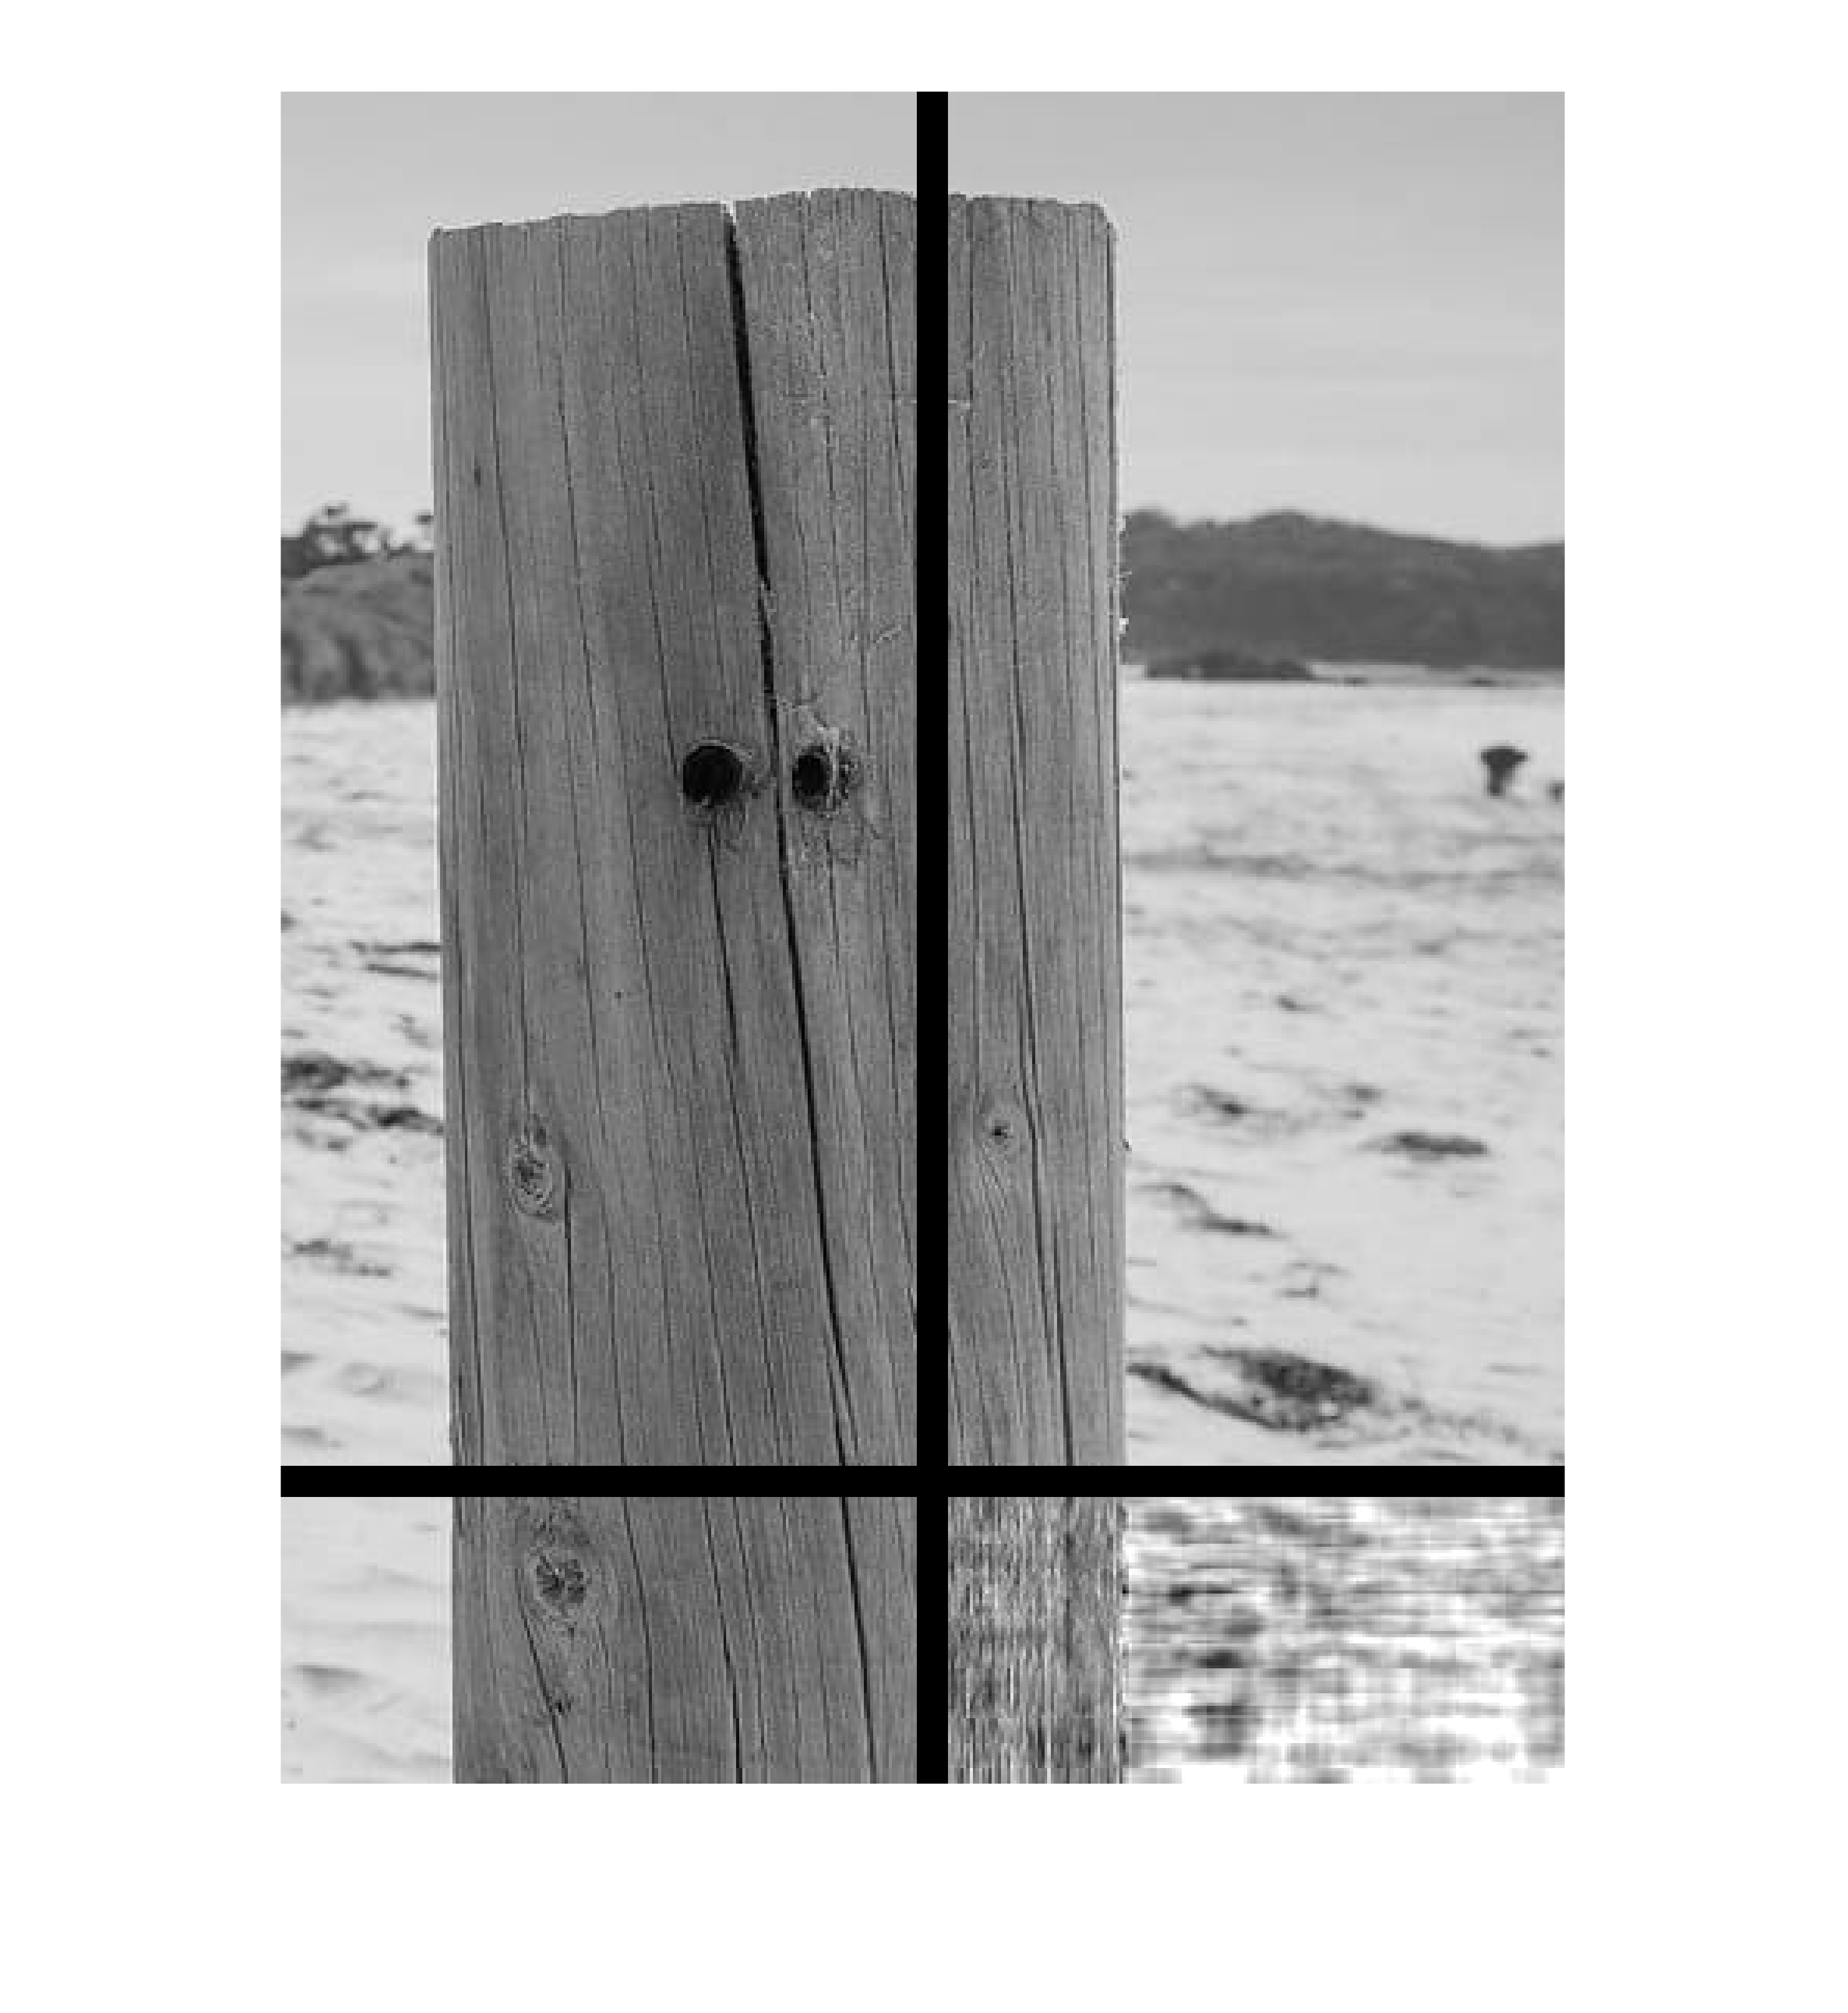

In [74]:
imshow(uint8(join_matrix(XTrain,YTrain,XTest,Ypredicted1,10,0)))


Добавляем метод главных компонент, чтобы понизить размерность матрицы предикторов обучающей выборки


In [75]:
% combined with pca
[coeff,scoreTrain,~,~,explained,mu] = pca(XTrain);% coeff - это матрица V,
mu_svd = mean(XTrain);% средние значения по каждому из столбцов
%M= size(XTrain,1);
%N = size(XTrain,2);
[U,S,V] = svd(XTrain -mu_svd,'econ'); % X = U*S*V'
US = U*S;
MAX_S = size(S,1);

dimentionality = 4; % количество сингулярных значений
US_reduced = US(:,1:dimentionality);% уменьшаем размерность U*S
I = ones(size(US,1),1);
b =  [I,US_reduced]\YTrain;


Раскладываем тестовые данные по базису правых сингулярных векторов


In [76]:
US_test = (XTest-mu_svd)*V(:,1:dimentionality);


Рассчитываем предсказание модели


In [77]:
I = ones(size(US_test,1),1);
Yprediction = [I,US_test]*b;
disp("Линейная регрессия без уменьшения размерности матрицы предикторов:")

Линейная регрессия без уменьшения размерности матрицы предикторов:


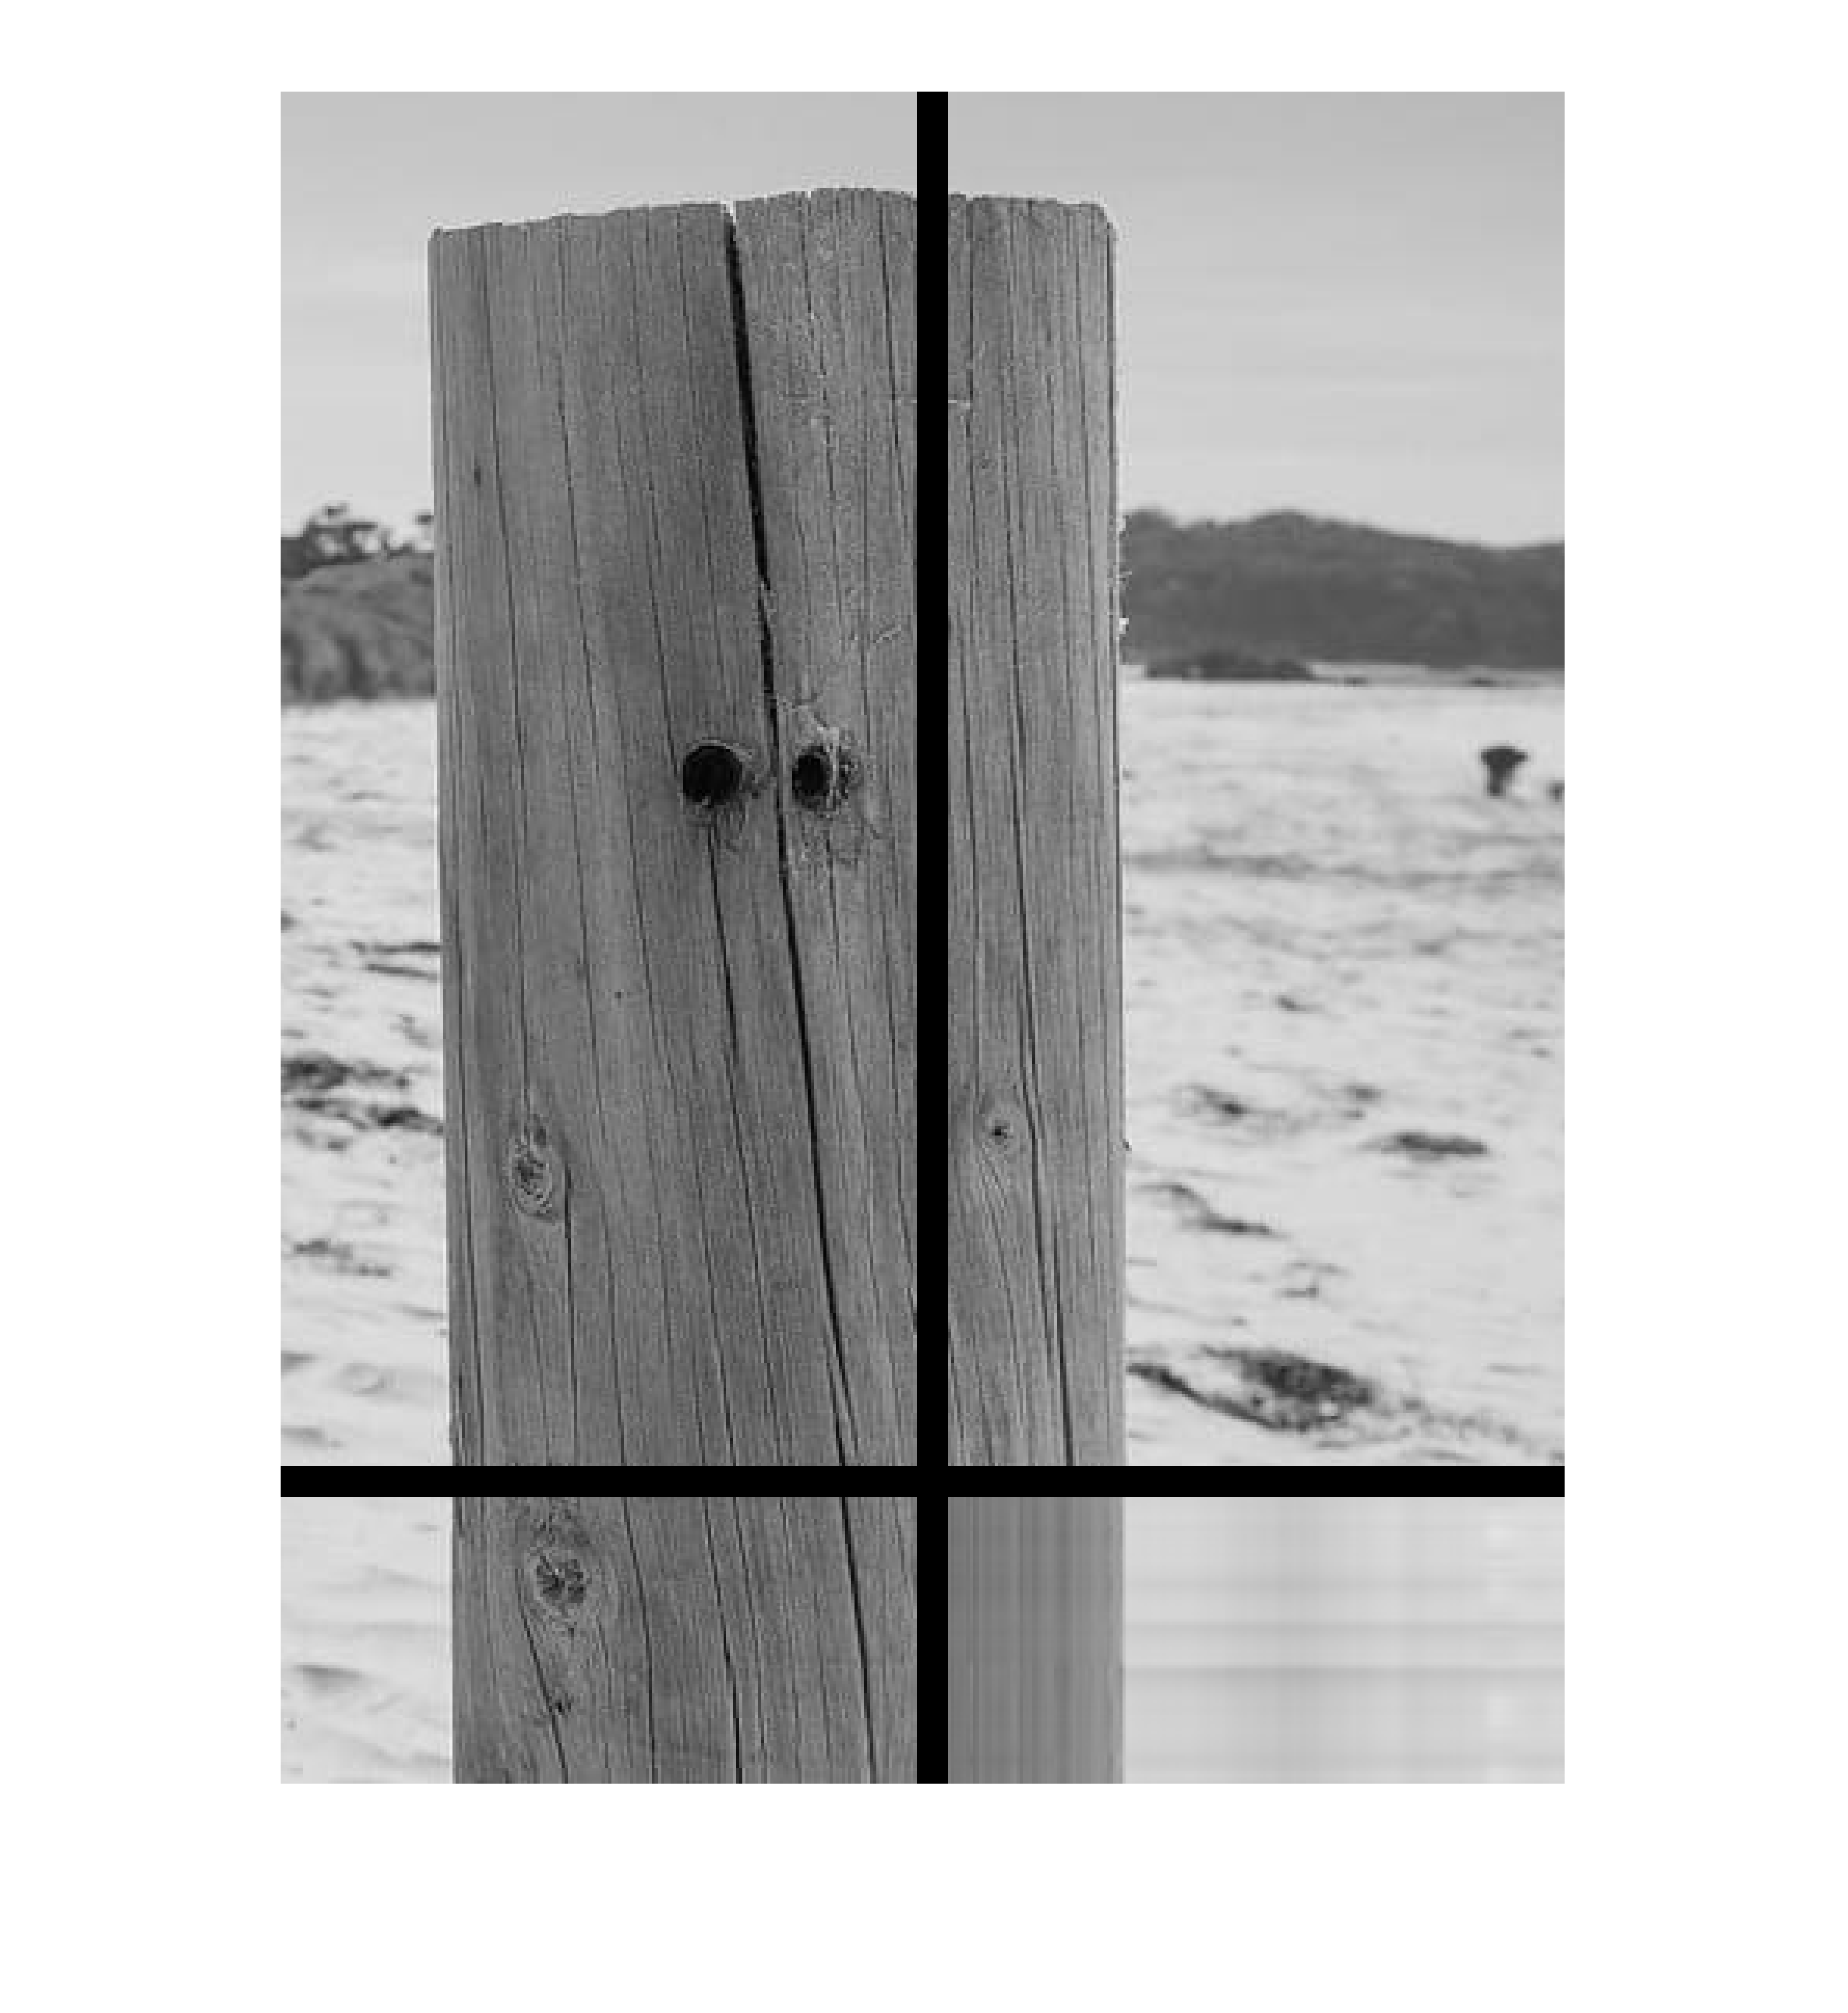

In [78]:
imshow(uint8(join_matrix(XTrain,YTrain,XTest,Yprediction,10,0)))


ЛИТЕРАТУРА


1. N.Draper, H.Smith . Applied regression analysis. Third edition. Wiley Series in Probability and Statistics.


2.  Gilbert Strang \- Introduction to Linear Algebra (2016, Wellesley\-Cambridge Press)


3. John D'Errico (2025). Optimization Tips and Tricks (https://www.mathworks.com/matlabcentral/fileexchange/8553\-optimization\-tips\-and\-tricks), MATLAB Central File Exchange. Retrieved January 30, 2025.

### Выводы.
1.  Рассмотрели задачу линейной регрессии с точки зрения статистики. Основный аспекты терминологии: зависимая переменная ( $Y$ ), матрица предикторов ( $X$ ), тестовая и обучающая выборки, регрессионная модель.
2. Путем анализа серии регрессий убедились, что средние значения параметров линейной регрессии $\vec{b}$ стремится к истинным значениям модели $\vec{\beta}$ при условии, что матожидание ошибки равно нулю. Также установили, что вариация ошибки  приводит к вариации параметров регрессионной модели, причем, вариация  параметров оказывается прямо пропорциональной вариации ошибки.
3. Сформулировали задачу линейной регрессии и получили выражения для коэффициентов модели через матрицу ковариации.
4. Получили выражения для матрицы ковариации параметров регрессионной модели, которая может быть использована для расчета доверительного интервала параметров регрессионной модели.
5. На двух примерах посмотрели последовательность операций при применении метода анализа главных компонент в задаче линейной регресии для задач с одной выходной переменной и несколькими (multioutput linear regression).
#### Вывод формулы для коэффициентов линейной регрессии через статистические параметры

 **Дополнение Шура (Schur complement) и инвертирование блочных матриц**


Если у нас есть блочная матрица вида:


 $M=[\begin{array}{cc} A~ & ~B\newline C~ & ~D \end{array}]$ ( то есть, матрица, у которой элементы \- матрицы соотвествующего размера)


дополнение Шура  $Sh=D-CA^{-1} B$


$$[\begin{array}{cc} A~ & ~B\newline C~ & ~D \end{array}]^{-1} =[\begin{array}{cc} A^{-1} +A^{-1} BSh^{-1} CA^{-1}  & -A^{-1} BSh^{-1} \newline -Sh^{-1} CA^{-1}  & Sh^{-1}  \end{array}]$$

Формула справедлива когда матрицы $Sh$ и $A$ \- обратимы


[https://www.cis.upenn.edu/~jean/schur\-comp.pdf](https://www.cis.upenn.edu/~jean/schur-comp.pdf)

<a name="H_F18401D0"></a>

#### Матричная форма линейной регрессии в статистической терминологии

Матрица модели: $X_M =[\vec{I} ,X]$ , теперь $X$ \- матрица предикторов (размером *NxP*)

<a name="M_CB8D4BD5"></a>

 $\vec{b} =[\begin{array}{c} b_0 \newline \vec{b_1 }  \end{array}]=X_M^{\dagger} \vec{Y} =([\begin{array}{c} {\vec{I} }^T \newline X^T  \end{array}][\vec{I} ,X])^{-1} [\begin{array}{c} {\vec{I} }^T \newline X^T  \end{array}]\vec{Y} =([\begin{array}{cc} N~ & {\vec{I} }^T X~\newline X^T \vec{I}  & X^T X \end{array}])^{-1} [\begin{array}{c} {\vec{I} }^T \newline X^T  \end{array}]\vec{Y}$ (\*)


Вначале обратим внимание на кросс\-диагональные


элементы блочной матрицы:


$${\vec{I} }^T X\frac{1}{N}=[\sum_{i=1}^N X_{i1} ,...,\sum_{i=1}^N X_{ij} ,...,\sum_{i=1}^N X_{i,P} ]/N=[{\overline{X} }_1 ,...,{\overline{X} }_P ]={\vec{\overline{X} } }^T$$

То есть, $\vec{\overline{X} }$ \- это вектор размером *Px1*, элементами которого являются средние значения столбцов матрицы $X$ . С учетом этого, выражение ([\*](#M_CB8D4BD5)) удобней переписать в виде:


$$[\begin{array}{c} b_0 \newline \vec{b_1 }  \end{array}]=X_M^{\dagger} \vec{Y} =[X_M^T X_M ]^{-1} X_M^T \vec{Y} =([\begin{array}{cc} N~ & N{\vec{\overline{X} } }^T ~\newline N\vec{\overline{X} }  & X^T X \end{array}])^{-1} [\begin{array}{c} N\overline{Y} \newline X^T \vec{Y}  \end{array}]$$

Вначале рассмотрим блочную матрицу $X_M^T X_M =[\begin{array}{cc} N~ & N{\vec{\overline{X} } }^T ~\newline N\vec{\overline{X} }  & X^T X \end{array}]$ .


Согласно формуле Шура, блочная матрица  $M=[\begin{array}{cc} A & B\newline С & D \end{array}]$ может быть инвертирована через  дополнение Шура: $Sh=D-СA^{-1} B$ , $M^{-1} =[\begin{array}{cc} A^{-1} +A^{-1} BSh^{-1} CA^{-1}  & -A^{-1} BSh^{-1} \newline -Sh^{-1} CA^{-1}  & Sh^{-1}  \end{array}]$


Для нашей конкретной матрицы:


 $A^{-1} =\frac{1}{N}$ (просто скаляр), $B=N{\vec{\overline{X} } }^T$ (вектор\-строка), $C=N\vec{\overline{X} }$ (вектор\-столбец), $D=X^T X$ (матрица PxP)


$$[X_M^T X_M ]^{-1} =[\begin{array}{cc} N^{-1} +N^{-1} N{\vec{\overline{X} } }^T Sh^{-1} N\vec{\overline{X} } N^{-1} ~ & -N^{-1} N{\vec{\overline{X} } }^T Sh^{-1} \newline -Sh^{-1} N\vec{\overline{X} } N^{-1}  & Sh^{-1}  \end{array}]=[\begin{array}{cc} N^{-1} +{\vec{\overline{X} } }^T Sh^{-1} \vec{\overline{X} } ~ & {\vec{\overline{X} } }^T Sh^{-1} \newline -Sh^{-1} \vec{\overline{X} }  & Sh^{-1}  \end{array}]$$

$$[\begin{array}{c} b_0 \newline \vec{b_1 }  \end{array}]=[X_M^T X_M ]^{-1} X_M^T \vec{Y} =[\begin{array}{cc} N^{-1} +{\vec{\overline{X} } }^T Sh^{-1} \vec{\overline{X} } ~ & {\vec{\overline{X} } }^T Sh^{-1} \newline -Sh^{-1} \vec{\overline{X} }  & Sh^{-1}  \end{array}][\begin{array}{c} N\overline{Y} \newline X^T \vec{Y}  \end{array}]$$

Посмотрим внимательно на выражение для вектора параметров $\vec{b_1 }$ :


$$\vec{b_1 } =Sh^{-1} [X^T \vec{Y} -N\vec{\overline{X} } \overline{Y} ]$$

Оно  напоминает выражение для $b_1$ из формулы [для прямой линии](#M_CB7732DF), только там $b_1$ \- это был скаляр. Выражение в квадратных скобках имеет похожий смысл, как и выражение для [Sxy](#M_A7E494A1), там $\vec{X}$ и $\vec{Y}$ были векторами, а их средние значения \- скалярами, теперь $X$ \- это матрица,  $\vec{\overline{X} }$ \- вектор\-столбец средних значений матрицы $X$ в каждом из столбцов. $X^T \vec{Y}$ \- вектор, каждый элемент которого \- скалярное произведение столбца матрицы $X$ на вектор $\vec{Y}$ , вектор $\vec{\overline{X} } \overline{Y}$ \- вектор, каждый элемент которого \- произведение среднего значения столбца на $\overline{Y}$ , то есть, среднее значения  зависимой переменной $\vec{Y}$ .


Теперь рассмотрим подробнее на дополнение Шура:


 $Sh=X^T X-X^T \vec{I} \frac{1}{N}{\vec{I} }^T X$ \- это матрица размером *PxP*.


С учетом определения вектор\-столбца средних, его можно переписать в виде:


$$Sh=X^T X-N\vec{\overline{X} } {\vec{\overline{X} } }^T$$

Данное выражение практически полностью совпадает с выражением для [ $S_{XX}$ ](#M_8A50E831), когда рассматрицалась одномерная задача.


Обозначим $\overline{X} =\vec{\overline{X} } {\vec{\overline{X} } }^T$ матрицу размером *PxP*, элемент этой матрицы, стоящий на i\-й строке j\-го столбца равен произведению средних значений этих столбцов:


$${\overline{X} }_{ij} =\overline{X_i } ~\overline{X_j }$$

In [79]:
% убедимся в том, что выражения действительно совпадают
clearvars
N=3

N = 3

In [80]:
X=sym("X",[N 2],"real");
I = sym(ones(N,1))

In [81]:
Xmean = simplify(X'*I*I'*X)/N

In [82]:
XmeanV = mean(X)'% функция mean автоматически считает среднее в каждой колонке

In [83]:
simplify(N*XmeanV*XmeanV' - Xmean)


Теперь, что такое $X^T X$ , это матрица, в которой на i\-й строке j\-го столбца стоит скалярное произведение i\-го столбца на j\-й столбец матрицы X


$$[X^T X]_{ij} ={\vec{X_i } }^T \vec{X_j }$$

Таким образом, дополнение Шура \- это матрица, в которой на i\-й строке j\-го столбца стоит:


$$[Sh]_{ij} ={\vec{X_i } }^T \vec{X_j } -N\overline{X_i } ~\overline{X_j }$$

In [84]:
% убедимся в том, что выражения действительно совпадают
clearvars
N=3

N = 3

In [85]:
X=sym("X",[N 2],"real");
I = sym(ones(N,1))

In [86]:
Xmean = simplify(X'*I*I'*X)/N

In [87]:
XmeanV = mean(X)'% функция mean автоматически считает среднее в каждой колонке

In [88]:
simplify(N*XmeanV*XmeanV' - Xmean)


Видно, что это матрица [ковариации](#M_27351791) (умноженная на число измерений) матрицы, в которой столбцы  \- это сэмлы случайной величины:


$$Sh=(N-1)Cov(X)$$

In [89]:
% убедимся в том, что выражения действительно совпадают
clearvars
N=3

N = 3

In [90]:
X=sym("X",[N 2],"real");
XmeanV = mean(X)'% функция mean автоматически считает среднее в каждой колонке

In [91]:
Sh = simplify(X'*X - N*XmeanV*XmeanV')

In [92]:
Sigma= cov(X)*(N-1)

In [93]:
simplify(Sh-Sigma) % убеждаемся, что это матрица ковариации



Таким образом, окончательное выражение для вектора параметров линейной регрессии:


$$\vec{b_1 } =[X^T X-N\vec{\overline{X} } {\vec{\overline{X} } }^T ]^{-1} [X^T \vec{Y} -N\vec{\overline{X} } \overline{Y} ]$$

In [94]:
function M = join_matrix(UL,UR,DL,DR,w,val)
% функция скледивает четыре матрицы в одну, вставляя между ними нул, так,
% чтобы была рамка на картинке
    arguments
        UL
        UR
        DL
        DR
        w = 10
        val = 0;
    end
    r1 = size(UL,1);r2 = size(DL,1);
    c1 = size(DL,2);c2 = size(DR,2);
    M = ones(r1+r2+w,c1+c2+w)*val;
    M(1:r1,1:c1) = UL;
    M(1:r1,(c1+w+1):end)=UR;
    M((r1+w+1):end,1:c1) = DL;
    M((r1+w+1):end,(c1+w+1):end) = DR;
end
function rus_name = rus(type)
    possible_types =  ["stand" "legA" "trig" "legP" "custom"];
    possible_rus_names = ["Стандартный базис" "Присоединенные полиномы Лежандра" "Тригонометрический базис" "Полиномы лежандра" "Кастомный"];
    flag = possible_types==type;
    if any(flag)
        rus_name = possible_rus_names(flag);
    else
        rus_name = type;
    end

end
function val = convert_rating_to_number(rating)
    %rating = string(rating);
    switch rating(1)
        case "A"
            val = 7+count(rating,"A");
        case "B"
            val = 8-count(rating,"B");
        case "C"
            val = 4-count(rating,"C");
    end
end
function f = norm_distribution_function(mu,sig)
% возвращает анонимную функцию для нормального распределения
    f =@(x) exp(-(x-mu).^2./(2*sig^2))./(sig*sqrt(2*pi));
end
function [V,s] = vandermatrix(t,P,type,polyprod_function)
arguments
    t double
    P (1,1) double {mustBeInteger,mustBePositive} = 2
    type (1,1) string {mustBeMember(type,["stand" "legA" "trig" "legP" "custom"])} = "stand"
    polyprod_function =[]
end
% создаем матрицу Вандермонда
% type - тип полинома (стандартный базис, полиномы лежандра,
% тригонометрические полиномы)
    t = t(:);
    N = numel(t);
    V = zeros(N,P);
    if ~(type=="custom")
        [Pfun,s] = producing_function(type,t); % возвращаем производящую функцию для колонки матрицы вандермонда
    else
        assert(~isempty(polyprod_function)||~isa(polyprod_function,"function_handle"),"Если выбрана кастомная производящая функция, то нужно ее предоставить")
        s = normalize(t);
        Pfun = @(i)polyprod_function(i,s.x);
    end
    for jj = P:-1:1
        V(:,jj) = Pfun(jj);
    end
end
function dist= make_dist(type,options)
% возращает генератор N случайных чисел, распределенных в соответствии
% с двух параметрическими распределениями: нормальным, дельта-равномерным,
% Вейбулла и Хи-квадрат
    arguments
        type (1,1) string {mustBeMember(type,["Normal" "Uniform" "Weibull" "Chi2"])}
        options.mu (1,1) =0
        options.sig (1,1)=0
    end
    mu=options.mu;
    sig2=options.sig^2;
    switch type
        case "Normal"
            dist = @(N) mu + sig2*randn([N 1]);
        case "Uniform"
            dist  = @(N)   sqrt(sig2)*(rand([N 1])  -0.5)+ mu;
        case "Weibull"
            dist  = @(N) wblrnd(mu,sqrt(sig2),N,1);
        case "Chi2"
            dist = @(N) (mu + sig2*randn([N 1]).^2);
    end

end
function norm_struct = normalize2(t)
% функция возвращает стурктуру, в которой хранятся данные для нормировки
    if ~issorted(t)
        t = sort(t,"ascend");
    end
    tmin = t(1);
    tmax = t(end);
    x = 2.0*((t - tmin) / (tmax - tmin))- 1;
    norm_struct = struct("tmin",tmin,"tmax",tmax,"x",x); %t,(max(t) - min(t))
end
function t = denormalize2(s)
    t = 0.5*(s.x + 1.0)*(s.tmax - s.tmin) + s.tmin;
end
function Pn = leg_polyA(i,t) % производящая функция для присоединенных полиномов Лежандра
    persistent P
    persistent tleg
    leg_type = 'norm';
    if isempty(tleg)||isempty(P)||(~isequal(t,tleg))
        P = transpose(legendre(i-1,t,leg_type)); % встроенная функция по сути возвращает уже матрицу Вандермонда
        tleg = t;
    end
    if i<=size(P,2)
        Pn = P(:,i);
        return
    end
    P = transpose(legendre(i,t,leg_type));
    tleg = t;
    Pn = P(:,end);
end
function Pn = trig_poly(i,t) % производящая функция для тригонометрических полиномов
    if i==1
        Pn  = ones(size(t));
        return
    end
    if mod(i,2)==0
        Pn = cos(i*t*pi);
    else
        Pn = sin(i*t*pi);
    end
end
function [P,s] = producing_function(type,t)
% функция возвращает производящую функцию для полинома
    s = normalize2(t);
    switch type
        case "stand" % стандартный базис полинома
          P = @(i) s.x.^(i-1);
        case "legA" % присоединенные полиномы Лежандра
          P = @(i) leg_polyA(i,s.x);
        case "legP" % полиномы Лежандра
          P = @(i) legendreP(i-1,s.x) ; % стандартная фукнция для полиномов лежандра
        case "trig" % тригонометрический базис
          P = @(i) trig_poly(i,s.x);

    end

end
function [new_ax,fig_handle] = get_next_ax(index, axes_name_value_pairs)
% функция, которая возвращает новые оси на новой фигуре (нужна чтобы
% кратинки в ливскрипте нормально строились)
    arguments
        index = []
        axes_name_value_pairs cell = {}
    end
    persistent N;
    if isempty(index)
        if isempty(N)
            N=1;
        else
            N  = N+1;
        end
        fig_handle = figure(N);
        clf(fig_handle);
        new_ax = axes(fig_handle,axes_name_value_pairs{:});
        %disp("fig"+ N)
    else
        fig_handle = figure(index);
        clf(fig_handle);
        new_ax = axes(fig_handle,axes_name_value_pairs{:});
    end
end
function ax = get_named_ax(title_string)
    ax = get_next_ax();
    title(title_string);
end
function ax = draw_vector(ax,ttl,names,type,varargin)
% функция строит двух- и трех-мерные вектора, а также рассеянные данные из
% матрицы
% ax - оси (если пустые, то создаются новые)
% ttl - заголовок картинки
% names - имена векторов
% type:
%       "vector" - аргументы, которые передаются после интерпретируются
%                   как отдельные вектора
%       "point"  - в этом случае передается матрица в качестве аргумента и
%       столбцы матрицы строятся при помощи функций scatter и scatter3 d
%       в зависимости от размерности массива
    arguments
        ax =[]
        ttl string =strings(0,1)
        names string =strings(0,1)
        type string {mustBeMember(type,["vector" "point"])}="vector"
    end
    arguments (Repeating)
        varargin double
    end
    was_empty = isempty(ax); % это признак того, что все строится на новых осях
    if was_empty
        ax = get_next_ax();
    else
        hold(ax,"on");
        % if ~isempty(ax.Legend)
        %     leg_before = ax.Legend.String;
        % else
        %     leg_before = strings(0,1);
        % end
    end

    if strcmp(type,"vector")
        is_3D = numel(varargin{1})==3;
            if is_3D
                [x,y,z]  = make_xy(varargin{1});
                plot3(ax,x,y,z,'LineWidth',2,'Marker','o');
                hold on
                for iii = 2:numel(varargin)
                        [x,y,z] = make_xy(varargin{iii});
                        plot3(ax,x,y,z,'LineWidth',2,'Marker','o');
                end
                grid on
                hold off
            else
                [x,y]  = make_xy(varargin{1});
                plot(ax,x,y,'LineWidth',2,'Marker','o');
                hold on
                for iii = 2:numel(varargin)
                        [x,y]  = make_xy(varargin{iii});
                        plot(ax,x,y,'LineWidth',2,'Marker','o');
                end
                grid on
                hold off
            end
            if isempty(names)||(numel(names)~=numel(varargin))
                legend(ax,string(1:numel(varargin)));

            else
                % if ~was_empty
                %      names= [names(:);leg_before(:)];
                % end
                legend(ax,names);
            end
            xlim(ax,[-1 1]);
            ylim(ax,[-1 1]);
            if ~isempty(ttl)
                title(ax,ttl);
            end
    else
        %data_number = numel(varargin); % число массивов данных
        is_3D = numel(varargin)==3;
        data = varargin{1};
        if size(data,2)>1
            data = transpose(data);
            is_transpose = true;
        else
            is_transpose = false;
        end
        if ~is_transpose
            for iii = 2:numel(varargin)
                data = [data,varargin{iii}];
            end
        else
            for iii = 2:numel(varargin)
                data = [data,transpose(varargin{iii})];
            end
        end

        if is_3D
            scatter3(ax,data(:,1),data(:,2),data(:,3));
        else
            scatter(ax,data(:,1),data(:,2));
        end

    end
    if ~was_empty
            hold(ax,"off");
    end
end
function [x,y,z]  = make_xy(col)
% добавляет к координатам вектора нули так, чтобы при помощи функции plot
% строилась линия
    switch numel(col)
        case 1
            x = [col(1)];
            y = 0;
            z = 0;
        case 2
            x = [0 col(1)];
            y = [0 col(2)];
            z = zeros(1,2);
        case 3
            x = [0 col(1)];
            y = [0 col(2)];
            z = [0 col(3)];
    end
end
function folder = get_folder()
% текущая папка
folder = fileparts(matlab.desktop.editor.getActiveFilename);
end
function [sampling_volume,tests_number,beta_mat] = sampling_surf_plot(beta,Nmax,Mmax,delta)
        % N
        P = numel(beta);
        sampling_volume = 2:Nmax;
        tests_number = 2:Mmax;
        beta_mat = zeros([Nmax-1,Mmax-1,P]);
        for N=sampling_volume % первый индекс - объем выборки
            x = transpose(linspace(-1,1,N));% столбец координат
            X = vandermatrix(x,P); % матрица вандермонда
            Yo = X*beta;% истинное значение
            for ii = tests_number% второй индекс - номер теста
                Y = Yo + delta*randn(N,1);
                b_values = X\Y;
                beta_mat(N-1,ii-1,:) = b_values;
            end
        end
end